### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [37]:
!pip install sweetviz
import os

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None, 'display.max_rows', 100)


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

from sklearn.preprocessing import scale,StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats


import random
import time
from datetime import datetime

import warnings
# warnings.filterwarnings('ignore')

     |████████████████████████████████| 15.1 MB 10.2 MB/s            


In [11]:
data= pd.read_csv('clean_data.csv')

In [12]:
df = data.copy()
print(df.shape)
df.describe()

(2598053, 49)


M_GAME_MINOR_VERSION  M_SESSION_UID  M_SESSION_TIME  \
count          2.598053e+06   2.598053e+06    2.598053e+06   
mean           1.410704e+01   8.239390e+18    1.019926e+03   
std            3.091644e-01   5.119263e+18    1.682488e+03   
min            1.400000e+01   2.106082e+16    4.000000e-03   
25%            1.400000e+01   3.591802e+18    1.138000e+02   
50%            1.400000e+01   7.802116e+18    4.319240e+02   
75%            1.400000e+01   1.279207e+19    1.024212e+03   
max            1.500000e+01   1.826297e+19    9.686959e+03   

       M_FRAME_IDENTIFIER  M_PLAYER_CAR_INDEX  M_BRAKING_ASSIST  \
count        2.598053e+06        2.598053e+06      2.598053e+06   
mean         2.857428e+04        9.212304e+00      6.926787e-01   
std          5.428777e+04        9.217497e+00      1.178056e+00   
min          0.000000e+00        0.000000e+00      0.000000e+00   
25%          3.007000e+03        0.000000e+00      0.000000e+00   
50%          1.174900e+04        2.000000e+00      0.000000e+00   
75%          2.972400e+04        1.900000e+01      2.000000e+00   
max          3.339170e+05        1.900000e+01      3.000000e+00   

       M_SESSION_LINK_IDENTIFIER  M_PIT_RELEASE_ASSIST     TIMESTAMP  \
count               2.598053e+06          2.598053e+06  2.598053e+06   
mean                1.894528e+09          3.153869e-01  1.642326e+09   
std                 1.345201e+09          4.646699e-01  5.468150e+05   
min                 0.000000e+00          0.000000e+00  1.641391e+09   
25%                 8.613347e+08          0.000000e+00  1.641823e+09   
50%                 2.184232e+09          0.000000e+00  1.642287e+09   
75%                 3.271241e+09          1.000000e+00  1.642445e+09   
max                 4.264309e+09          1.000000e+00  1.644020e+09   

       M_PIT_STOP_WINDOW_IDEAL_LAP  M_TRACK_TEMPERATURE  M_TRACK_LENGTH  \
count                 2.598053e+06         2.598053e+06    2.598053e+06   
mean                  1.881846e+00         3.185621e+01    4.890589e+03   
std                   8.317275e+00         2.457041e+00    6.615085e+02   
min                   0.000000e+00         2.300000e+01    3.323000e+03   
25%                   0.000000e+00         3.100000e+01    4.650000e+03   
50%                   0.000000e+00         3.300000e+01    4.650000e+03   
75%                   0.000000e+00         3.300000e+01    5.408000e+03   
max                   4.700000e+01         3.600000e+01    5.896000e+03   

       M_GAME_PAUSED  M_FORECAST_ACCURACY  M_AIR_TEMPERATURE  \
count   2.598053e+06         2.598053e+06       2.598053e+06   
mean    1.366562e-02         5.711970e-02       2.407445e+01   
std     1.160986e-01         2.320712e-01       2.703749e+00   
min     0.000000e+00         0.000000e+00       1.700000e+01   
25%     0.000000e+00         0.000000e+00       2.300000e+01   
50%     0.000000e+00         0.000000e+00       2.500000e+01   
75%     0.000000e+00         0.000000e+00       2.500000e+01   
max     1.000000e+00         1.000000e+00       2.900000e+01   

       M_NUM_WEATHER_FORECAST_SAMPLES    M_TRACK_ID   M_ERSASSIST  \
count                    2.598053e+06  2.598053e+06  2.598053e+06   
mean                     1.388981e+01  1.588985e+01  3.153869e-01   
std                      1.642869e+01  1.238743e+01  4.646699e-01   
min                      0.000000e+00  1.000000e+00  0.000000e+00   
25%                      3.000000e+00  3.000000e+00  0.000000e+00   
50%                      1.000000e+01  2.700000e+01  0.000000e+00   
75%                      1.000000e+01  2.800000e+01  1.000000e+00   
max                      4.800000e+01  2.800000e+01  1.000000e+00   

          M_FORMULA  M_SEASON_LINK_IDENTIFIER  M_PIT_ASSIST  M_GEARBOX_ASSIST  \
count  2.598053e+06              2.598053e+06  2.598053e+06      2.598053e+06   
mean   8.147640e-03              1.894528e+09  3.153869e-01      1.630774e+00   
std    1.561299e-01              1.345201e+09  4.646699e-01      9.293398e-01

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598053 entries, 0 to 2598052
Data columns (total 49 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   M_GAME_MINOR_VERSION                            int64  
 1   M_SESSION_UID                                   float64
 2   M_SESSION_TIME                                  float64
 3   M_FRAME_IDENTIFIER                              int64  
 4   M_PLAYER_CAR_INDEX                              int64  
 5   M_BRAKING_ASSIST                                int64  
 6   M_SESSION_LINK_IDENTIFIER                       int64  
 7   M_PIT_RELEASE_ASSIST                            int64  
 8   TIMESTAMP                                       float64
 9   M_PIT_STOP_WINDOW_IDEAL_LAP                     int64  
 10  M_TRACK_TEMPERATURE                             int64  
 11  M_TRACK_LENGTH                                  int64  
 12  M_GAME_PAUSED               

In [14]:
df = pd.get_dummies(data, columns = ['GAMEHOST'])
df.drop('GAMEHOST_Unknown', axis=1, inplace=True) #To avoid dummy trap
df.head()

M_GAME_MINOR_VERSION  M_SESSION_UID  M_SESSION_TIME  M_FRAME_IDENTIFIER  \
0                    14   1.300210e+19        2803.836               82458   
1                    14   1.300210e+19        2803.836               82458   
2                    14   1.300210e+19        2803.836               82458   
3                    14   1.300210e+19        2803.836               82458   
4                    14   1.300210e+19        2803.836               82458   

   M_PLAYER_CAR_INDEX  M_BRAKING_ASSIST  M_SESSION_LINK_IDENTIFIER  \
0                   0                 0                          0   
1                   0                 0                          0   
2                   0                 0                          0   
3                   0                 0                          0   
4                   0                 0                          0   

   M_PIT_RELEASE_ASSIST     TIMESTAMP  M_PIT_STOP_WINDOW_IDEAL_LAP  \
0                     0  1.642362e+09                            0   
1                     0  1.642362e+09                            0   
2                     0  1.642362e+09                            0   
3                     0  1.642362e+09                            0   
4                     0  1.642362e+09                            0   

   M_TRACK_TEMPERATURE  M_TRACK_LENGTH  M_GAME_PAUSED  M_FORECAST_ACCURACY  \
0                   33            4650              0                    0   
1                   33            4650              0                    0   
2                   33            4650              0                    0   
3                   33            4650              0                    0   
4                   33            4650              0                    0   

   M_AIR_TEMPERATURE  M_NUM_WEATHER_FORECAST_SAMPLES  M_TRACK_ID  M_ERSASSIST  \
0                 25                               0          28            0   
1                 25                               0          28            0   
2                 25                               0          28            0   
3                 25                               0          28            0   
4                 25                               0          28            0   

   M_FORMULA  M_SEASON_LINK_IDENTIFIER  M_PIT_ASSIST  M_GEARBOX_ASSIST  \
0          0                         0             0                 1   
1          0                         0             0                 1   
2          0                         0             0                 1   
3          0                         0             0                 1   
4          0                         0             0                 1   

   M_SESSION_TYPE  M_SPECTATOR_CAR_INDEX  M_PIT_STOP_WINDOW_LATEST_LAP  \
0              13                    255                             0   
1              13                    255                             0   
2              13                    255                             0   
3              13                    255                             0   
4              13                    255                             0   

   M_WEEKEND_LINK_IDENTIFIER  M_DYNAMIC_RACING_LINE_TYPE  M_SESSION_TIME_LEFT  \
0                          0                           0                    0   
1                          0                           0                    0   
2                          0                           0                    0   
3                          0                           0                    0   
4                          0                           0                    0   

   M_SESSION_DURATION  M_PIT_STOP_REJOIN_POSITION  \
0                 600                           0   
1                 600                           0   
2                 600                           0   
3                 600                           0   
4                 600                           0   

   M_WEATHER_FORECAST_SAMPLES_M_SESSION_

In [15]:
# Let us convert the timestamp to a datetime format
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], format= '%Y-%m-%d %H:%M:%S', errors= 'coerce')
df.head(10)

M_GAME_MINOR_VERSION  M_SESSION_UID  M_SESSION_TIME  M_FRAME_IDENTIFIER  \
0                    14   1.300210e+19        2803.836               82458   
1                    14   1.300210e+19        2803.836               82458   
2                    14   1.300210e+19        2803.836               82458   
3                    14   1.300210e+19        2803.836               82458   
4                    14   1.300210e+19        2803.836               82458   
5                    14   1.300210e+19        2803.836               82458   
6                    14   1.300210e+19        2803.836               82458   
7                    14   1.300210e+19        2803.836               82458   
8                    14   1.300210e+19        2803.836               82458   
9                    14   1.300210e+19        2803.836               82458   

   M_PLAYER_CAR_INDEX  M_BRAKING_ASSIST  M_SESSION_LINK_IDENTIFIER  \
0                   0                 0                          0   
1                   0                 0                          0   
2                   0                 0                          0   
3                   0                 0                          0   
4                   0                 0                          0   
5                   0                 0                          0   
6                   0                 0                          0   
7                   0                 0                          0   
8                   0                 0                          0   
9                   0                 0                          0   

   M_PIT_RELEASE_ASSIST                     TIMESTAMP  \
0                     0 1970-01-01 00:00:01.642361520   
1                     0 1970-01-01 00:00:01.642361520   
2                     0 1970-01-01 00:00:01.642361520   
3                     0 1970-01-01 00:00:01.642361520   
4                     0 1970-01-01 00:00:01.642361520   
5                     0 1970-01-01 00:00:01.642361520   
6                     0 1970-01-01 00:00:01.642361520   
7                     0 1970-01-01 00:00:01.642361520   
8                     0 1970-01-01 00:00:01.642361520   
9                     0 1970-01-01 00:00:01.642361520   

   M_PIT_STOP_WINDOW_IDEAL_LAP  M_TRACK_TEMPERATURE  M_TRACK_LENGTH  \
0                            0                   33            4650   
1                            0                   33            4650   
2                            0                   33            4650   
3                            0                   33            4650   
4                            0                   33            4650   
5                            0                   33            4650   
6                            0                   33            4650   
7                            0                   33            4650   
8                            0                   33            4650   
9                            0                   33            4650   

   M_GAME_PAUSED  M_FORECAST_ACCURACY  M_AIR_TEMPERATURE  \
0              0                    0                 25   
1              0                    0                 25   
2              0                    0                 25   
3              0                    0                 25   
4              0                    0                 25   
5              0                    0                 25   
6              0                    0                 25   
7              0                    0                 25   
8              0                    0                 25   
9              0                    0                 25   

   M_NUM_WEATHER_FORECAST_SAMPLES  M_TRACK_ID  M_ERSASSIST  M_FORMULA  \
0                               0          28            0          0   
1                               0          28            0          0   
2                               0          28            0          0   
3         

In [ ]:
# df[Similar_col].tail(30)

Seems we are some similarities exists btw M_WEEKEND_LINK_IDENTIFIER, M_SEASON_LINK_IDENTIFIER and M_SESSION_LINK_IDENTIFIER, so lets quickly take a quick dive incol_4 = ['M_WEEKEND_LINK_IDENTIFIER', 'M_SEASON_LINK_IDENTIFIER', 'M_SESSION_LINK_IDENTIFIER', 'M_SESSION_UID']

In [16]:
Similar_col= ['M_WEEKEND_LINK_IDENTIFIER', 'M_SEASON_LINK_IDENTIFIER', 'M_SESSION_LINK_IDENTIFIER']

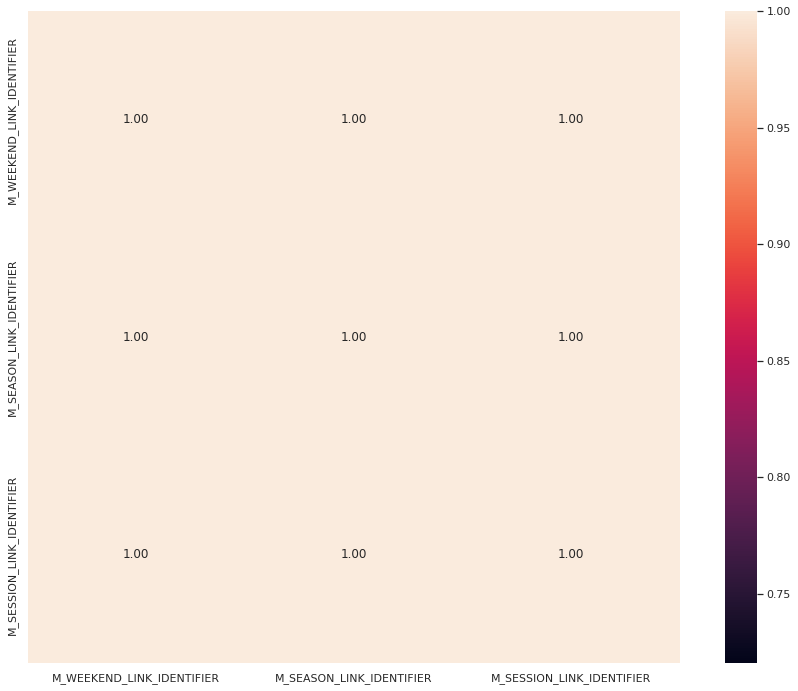

In [17]:
corrmat = df[Similar_col].corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');

Seems they are similar as expected, and we can simply drop all excluding 1

In [18]:
# Drop some part of Similar_col
df.drop(Similar_col[:-1], axis=1, inplace=True)
print(df.shape)
df.head()

(2598053, 48)


M_GAME_MINOR_VERSION  M_SESSION_UID  M_SESSION_TIME  M_FRAME_IDENTIFIER  \
0                    14   1.300210e+19        2803.836               82458   
1                    14   1.300210e+19        2803.836               82458   
2                    14   1.300210e+19        2803.836               82458   
3                    14   1.300210e+19        2803.836               82458   
4                    14   1.300210e+19        2803.836               82458   

   M_PLAYER_CAR_INDEX  M_BRAKING_ASSIST  M_SESSION_LINK_IDENTIFIER  \
0                   0                 0                          0   
1                   0                 0                          0   
2                   0                 0                          0   
3                   0                 0                          0   
4                   0                 0                          0   

   M_PIT_RELEASE_ASSIST                     TIMESTAMP  \
0                     0 1970-01-01 00:00:01.642361520   
1                     0 1970-01-01 00:00:01.642361520   
2                     0 1970-01-01 00:00:01.642361520   
3                     0 1970-01-01 00:00:01.642361520   
4                     0 1970-01-01 00:00:01.642361520   

   M_PIT_STOP_WINDOW_IDEAL_LAP  M_TRACK_TEMPERATURE  M_TRACK_LENGTH  \
0                            0                   33            4650   
1                            0                   33            4650   
2                            0                   33            4650   
3                            0                   33            4650   
4                            0                   33            4650   

   M_GAME_PAUSED  M_FORECAST_ACCURACY  M_AIR_TEMPERATURE  \
0              0                    0                 25   
1              0                    0                 25   
2              0                    0                 25   
3              0                    0                 25   
4              0                    0                 25   

   M_NUM_WEATHER_FORECAST_SAMPLES  M_TRACK_ID  M_ERSASSIST  M_FORMULA  \
0                               0          28            0          0   
1                               0          28            0          0   
2                               0          28            0          0   
3                               0          28            0          0   
4                               0          28            0          0   

   M_PIT_ASSIST  M_GEARBOX_ASSIST  M_SESSION_TYPE  M_SPECTATOR_CAR_INDEX  \
0             0                 1              13                    255   
1             0                 1              13                    255   
2             0                 1              13                    255   
3             0                 1              13                    255   
4             0                 1              13                    255   

   M_PIT_STOP_WINDOW_LATEST_LAP  M_DYNAMIC_RACING_LINE_TYPE  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   

   M_SESSION_TIME_LEFT  M_SESSION_DURATION  M_PIT_STOP_REJOIN_POSITION  \
0                    0                 600                           0   
1                    0                 600                           0   
2                    0                 600                           0   
3                    0                 600                           0   
4                    0                 600                           0   

   M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE  M_TIME_OFFSET  \
0                                        0.0            0.0   
1                                        0.0            0.0   
2                                        0.0            0.0   
3         

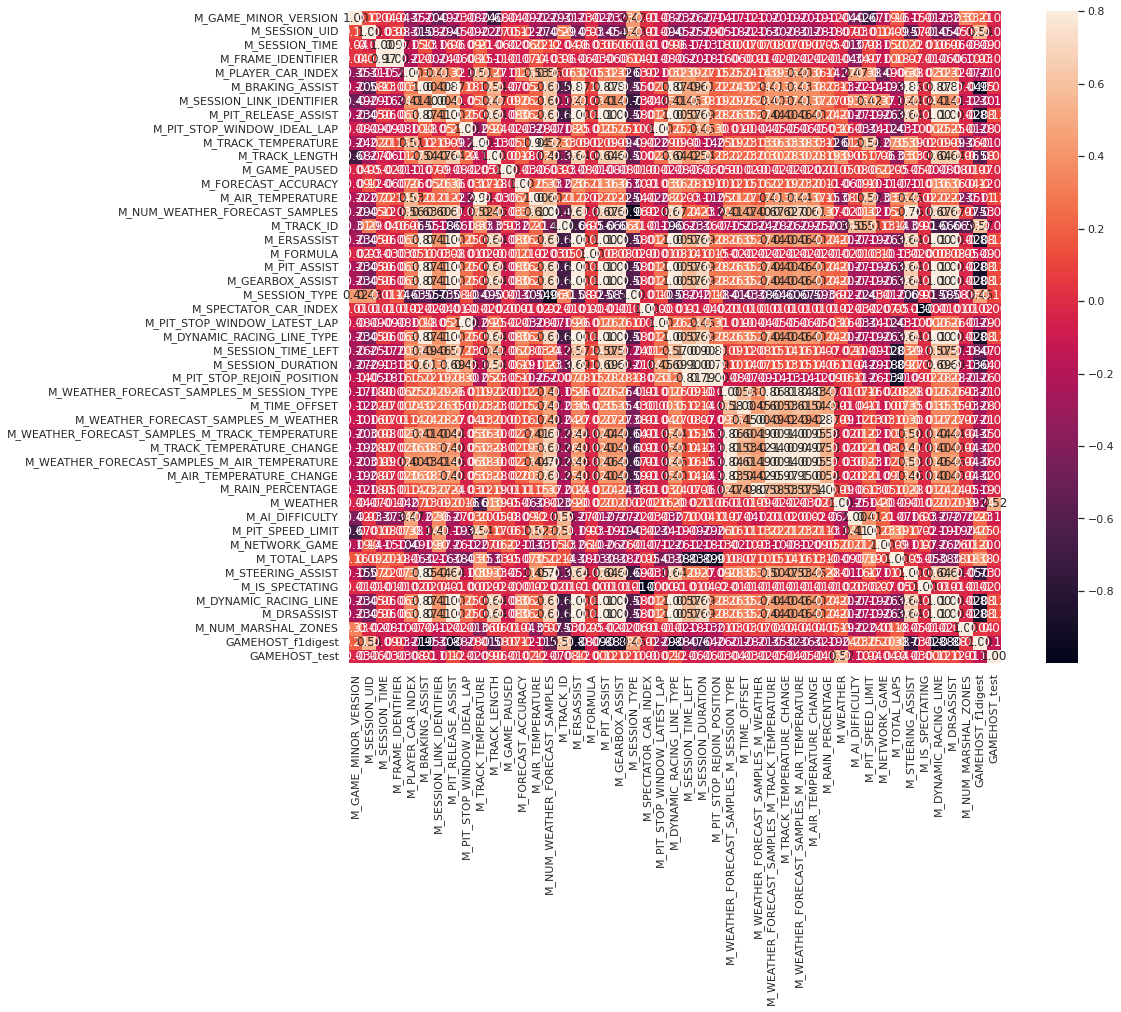

In [19]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');

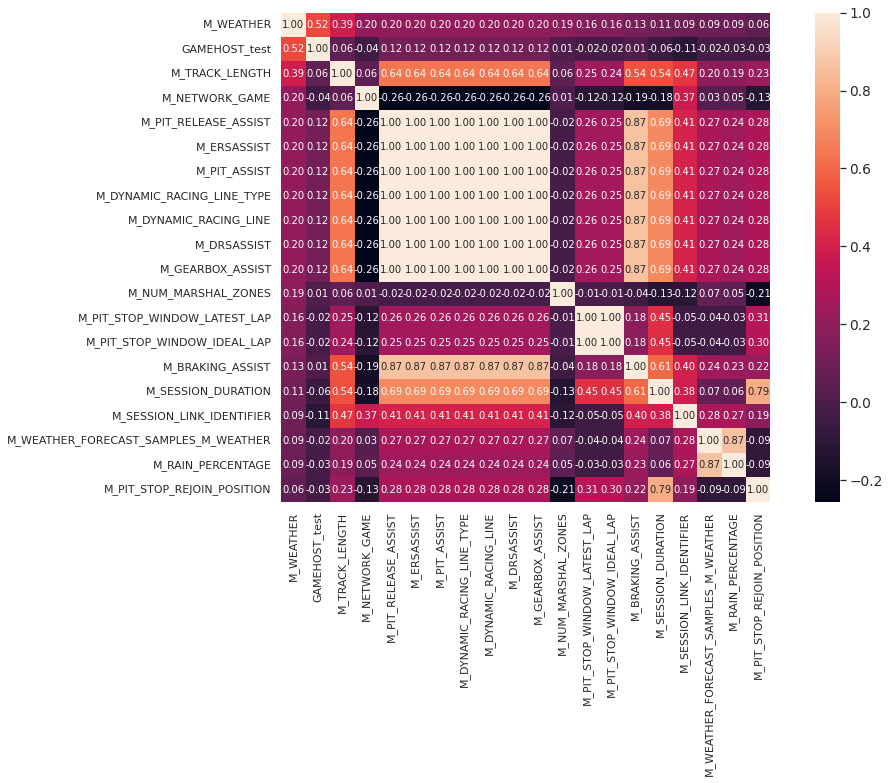

In [20]:
# top 20 most correlated features with Weather (correlation matrix) 

f, ax = plt.subplots(figsize=(16, 9))
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'M_WEATHER')['M_WEATHER'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [21]:
forcast = ['M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET', 'M_WEATHER_FORECAST_SAMPLES_M_WEATHER', 
         'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE', 'M_TRACK_TEMPERATURE_CHANGE', 
         'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE', 'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE']

col_2 = ['M_NETWORK_GAME', 'M_TOTAL_LAPS', 'M_STEERING_ASSIST', 'M_IS_SPECTATING', 'M_DYNAMIC_RACING_LINE', 'M_DRSASSIST', 'M_NUM_MARSHAL_ZONES']

target = ['M_WEATHER','M_RAIN_PERCENTAGE']

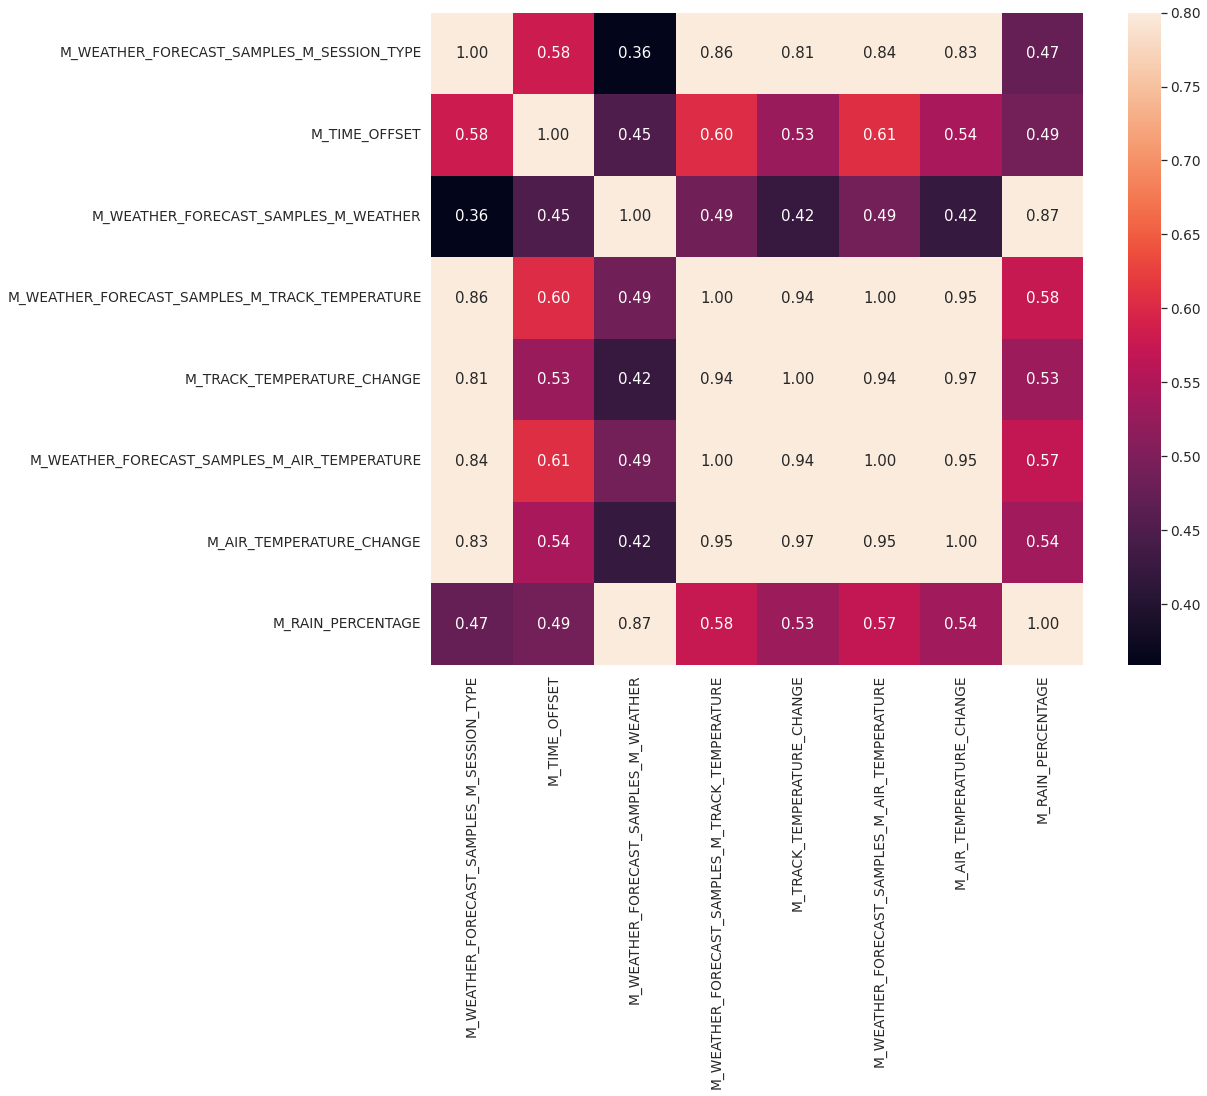

In [23]:
corrmat = df[forcast].corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');

A quick observation from the early forcast is the correlation of other forcasted feature with the weather and/or rain percent. And it seems features <b>such as;</b> <em>M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE, M_TRACK_TEMPERATURE_CHANGE, M_WEATHER_FORECAST_SAMPLES_M_AIR_
    TEMPERATURE, M_AIR_TEMPERATURE_CHANGE</em> <b>are very predictive</b>. Also <b>the two target feature to predict are very well corelated to one another</b>.

In [26]:
# interest = ['M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE', 'M_TRACK_TEMPERATURE_CHANGE', 
#          'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE', 'M_AIR_TEMPERATURE_CHANGE']
# pd.plotting.scatter_matrix(data[interest], diagonal="kde")
# plt.tight_layout()
# plt.show()

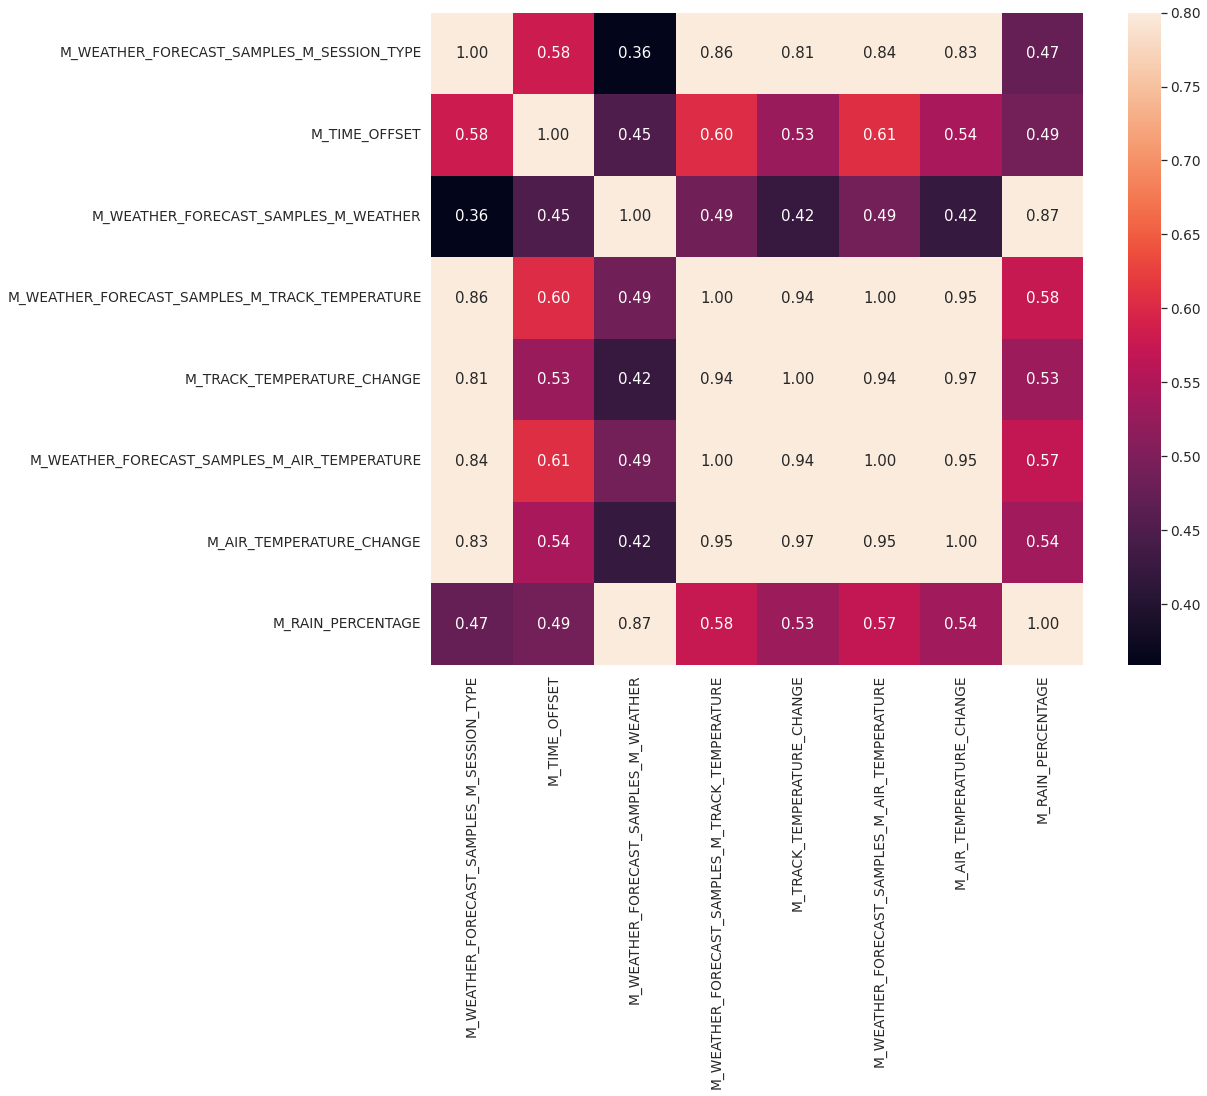

In [28]:
# Now let us look into the correlation btw our feature
corrmat = df[forcast].corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, fmt='.2f');

/home/datascience/conda/generalmachinelearningforcpusonpython3_7vyes/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


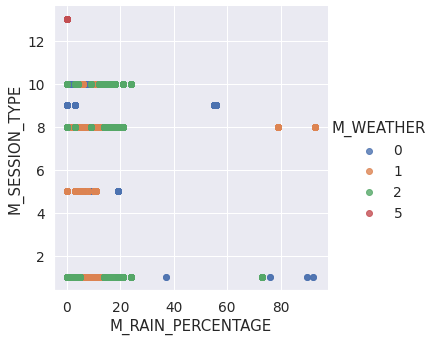

In [33]:
sns.lmplot('M_RAIN_PERCENTAGE', "M_SESSION_TYPE", data, hue='M_WEATHER', fit_reg=False);

In [35]:
colu = []
for name in df.columns:
    colu.append(name)
print(colu)

['M_GAME_MINOR_VERSION', 'M_SESSION_UID', 'M_SESSION_TIME', 'M_FRAME_IDENTIFIER', 'M_PLAYER_CAR_INDEX', 'M_BRAKING_ASSIST', 'M_SESSION_LINK_IDENTIFIER', 'M_PIT_RELEASE_ASSIST', 'TIMESTAMP', 'M_PIT_STOP_WINDOW_IDEAL_LAP', 'M_TRACK_TEMPERATURE', 'M_TRACK_LENGTH', 'M_GAME_PAUSED', 'M_FORECAST_ACCURACY', 'M_AIR_TEMPERATURE', 'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_TRACK_ID', 'M_ERSASSIST', 'M_FORMULA', 'M_PIT_ASSIST', 'M_GEARBOX_ASSIST', 'M_SESSION_TYPE', 'M_SPECTATOR_CAR_INDEX', 'M_PIT_STOP_WINDOW_LATEST_LAP', 'M_DYNAMIC_RACING_LINE_TYPE', 'M_SESSION_TIME_LEFT', 'M_SESSION_DURATION', 'M_PIT_STOP_REJOIN_POSITION', 'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET', 'M_WEATHER_FORECAST_SAMPLES_M_WEATHER', 'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE', 'M_TRACK_TEMPERATURE_CHANGE', 'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE', 'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE', 'M_WEATHER', 'M_AI_DIFFICULTY', 'M_PIT_SPEED_LIMIT', 'M_NETWORK_GAME', 'M_TOTAL_LAPS', 'M_STEERING_ASSIST'

In [40]:
import sweetviz as sv

feature_config = sv.FeatureConfig(force_num=['M_GAME_MINOR_VERSION', 'M_SESSION_UID', 'M_SESSION_TIME', 'M_FRAME_IDENTIFIER', 'M_PLAYER_CAR_INDEX', 
                                             'M_BRAKING_ASSIST', 'M_SESSION_LINK_IDENTIFIER', 'M_PIT_RELEASE_ASSIST', 'M_PIT_STOP_WINDOW_IDEAL_LAP', 
                                             'M_TRACK_TEMPERATURE', 'M_TRACK_LENGTH', 'M_GAME_PAUSED', 'M_FORECAST_ACCURACY', 'M_AIR_TEMPERATURE', 
                                             'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_TRACK_ID', 'M_ERSASSIST', 'M_FORMULA', 'M_PIT_ASSIST', 'M_GEARBOX_ASSIST', 
                                             'M_SESSION_TYPE', 'M_SPECTATOR_CAR_INDEX', 'M_PIT_STOP_WINDOW_LATEST_LAP', 'M_DYNAMIC_RACING_LINE_TYPE', 
                                             'M_SESSION_TIME_LEFT','M_SESSION_DURATION', 'M_PIT_STOP_REJOIN_POSITION', 'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE',
                                             'M_TIME_OFFSET', 'M_WEATHER_FORECAST_SAMPLES_M_WEATHER', 'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE', 
                                             'M_TRACK_TEMPERATURE_CHANGE', 'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE', 'M_AIR_TEMPERATURE_CHANGE', 
                                             'M_RAIN_PERCENTAGE', 'M_WEATHER', 'M_AI_DIFFICULTY', 'M_PIT_SPEED_LIMIT', 'M_NETWORK_GAME', 'M_TOTAL_LAPS',
                                             'M_STEERING_ASSIST', 'M_IS_SPECTATING', 'M_DYNAMIC_RACING_LINE', 'M_DRSASSIST', 'M_NUM_MARSHAL_ZONES'])

In [41]:
report = sv.analyze(df, target_feat='M_WEATHER', feat_cfg=feature_config)

                                             |          | [  0%]   00:00 -> (? left)


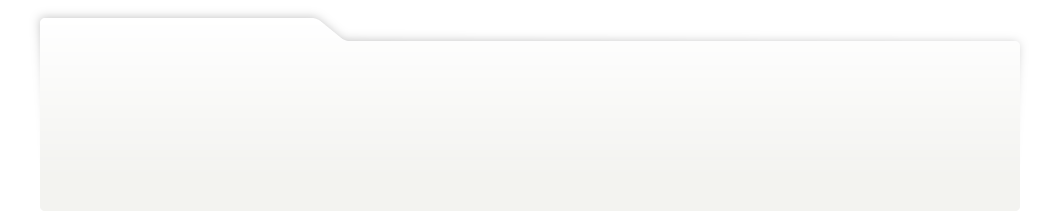
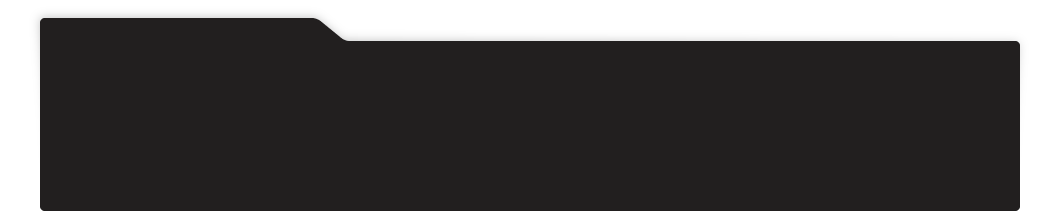
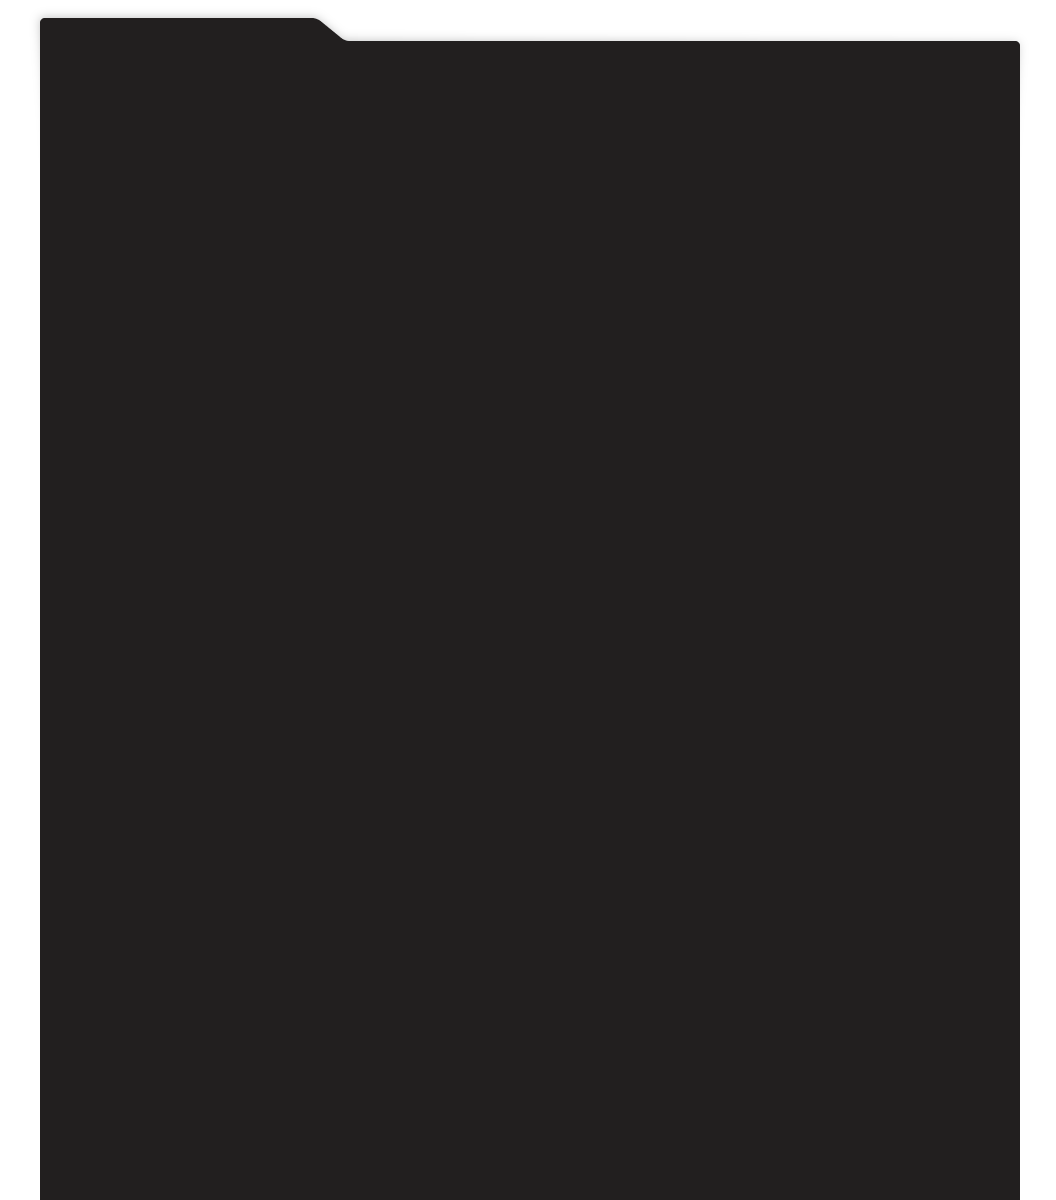
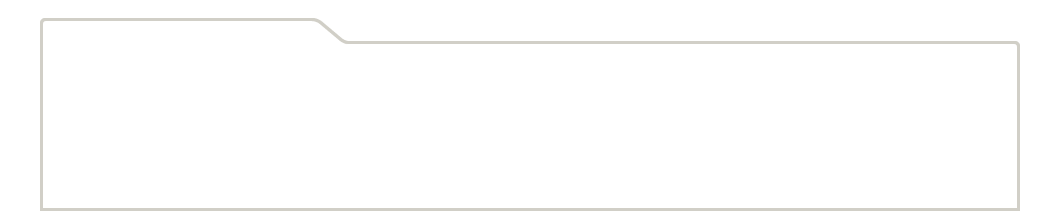
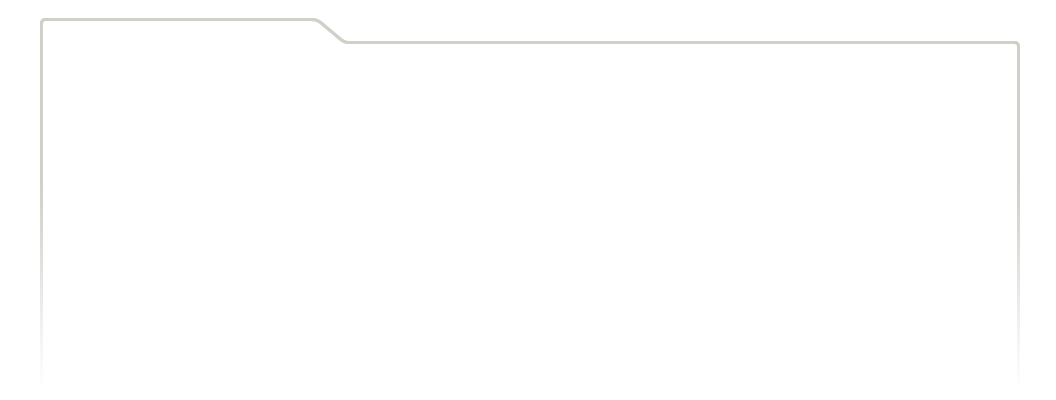
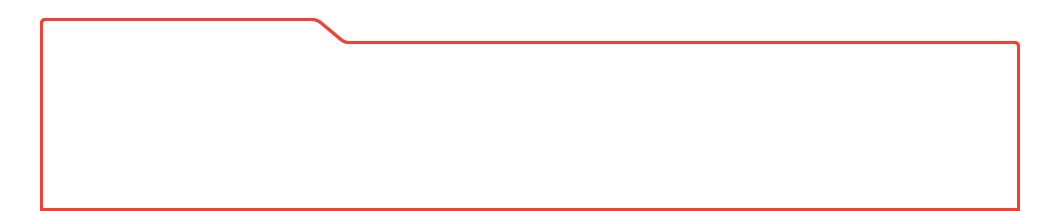
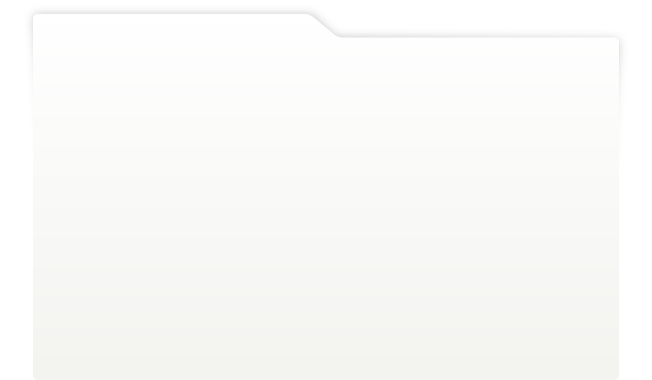
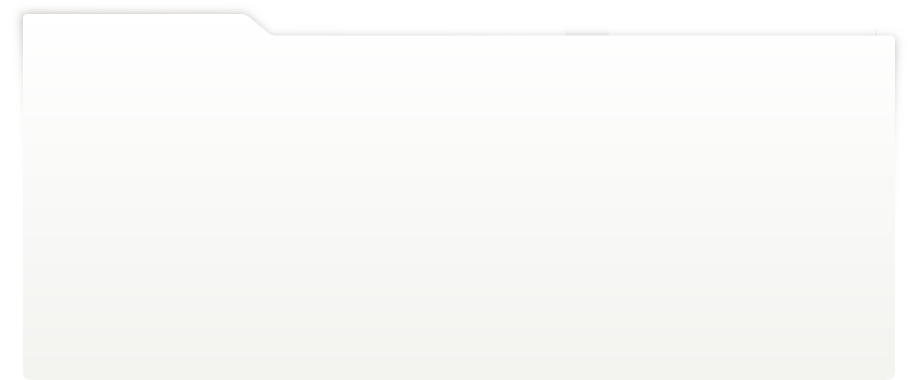
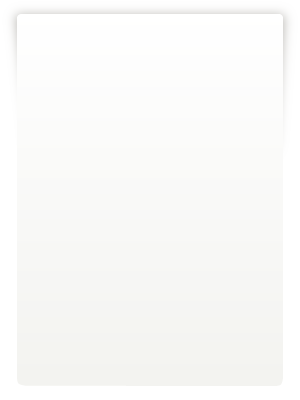
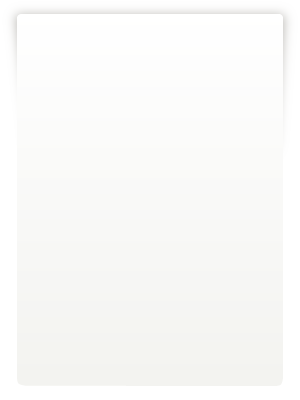
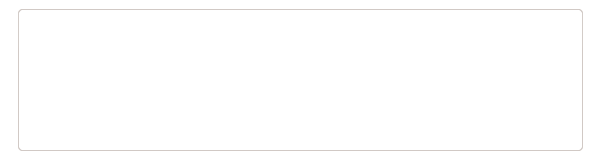
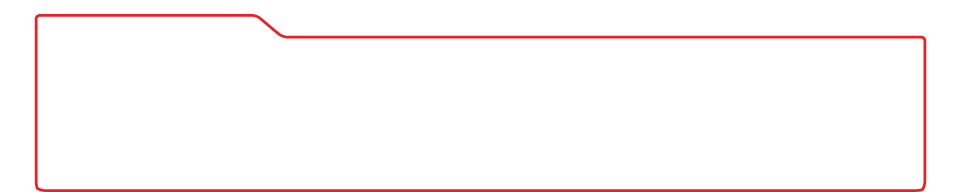
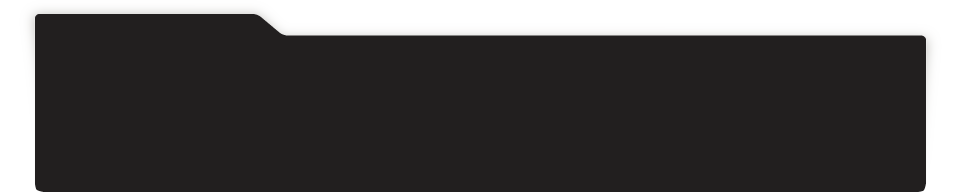
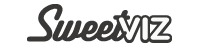
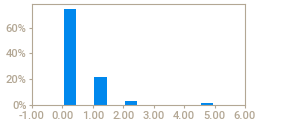
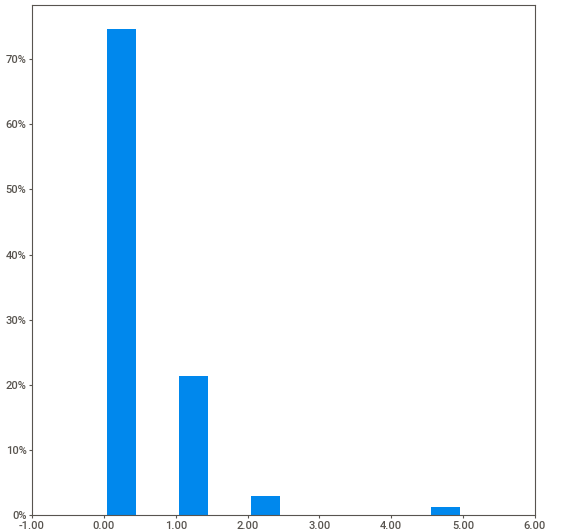
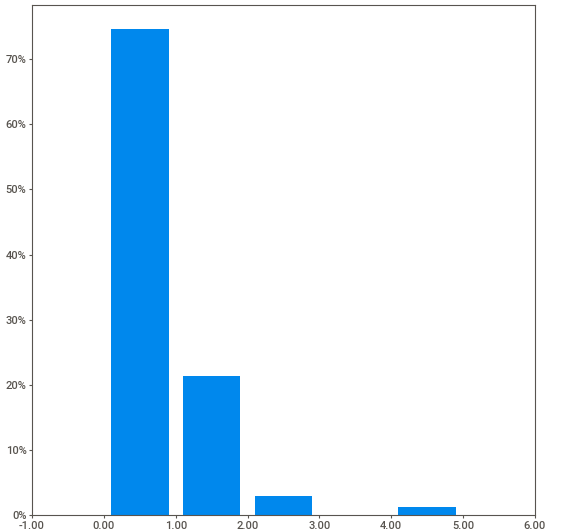
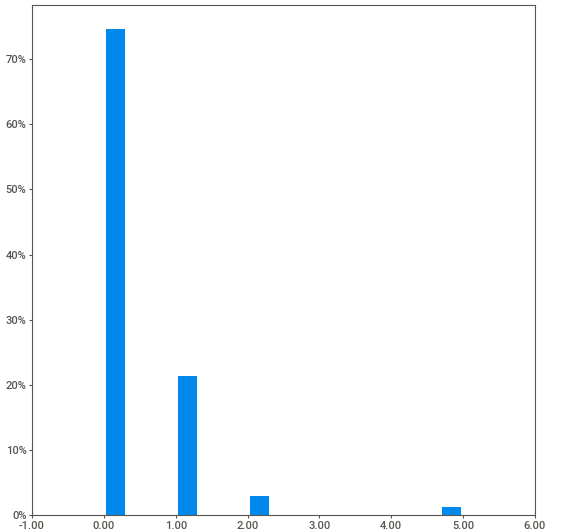
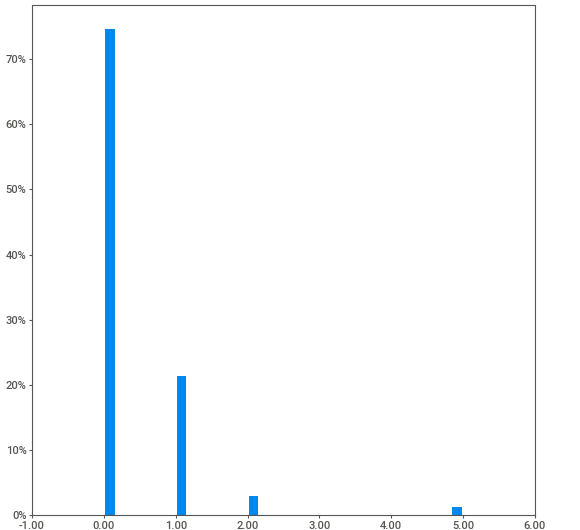
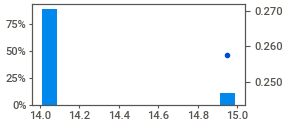
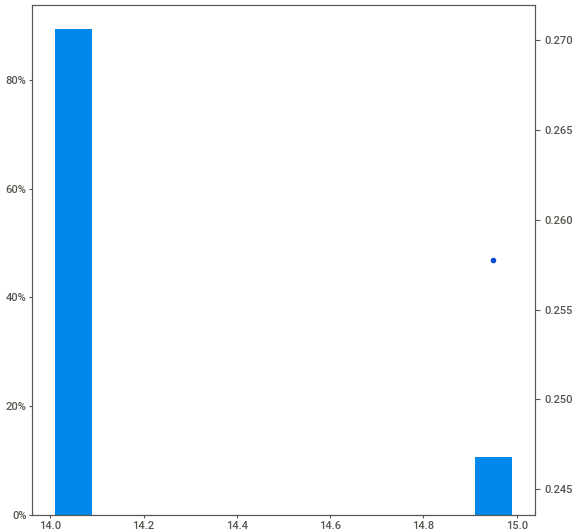
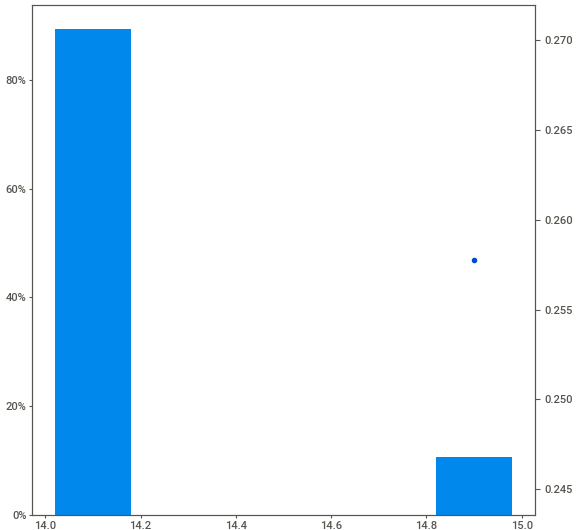
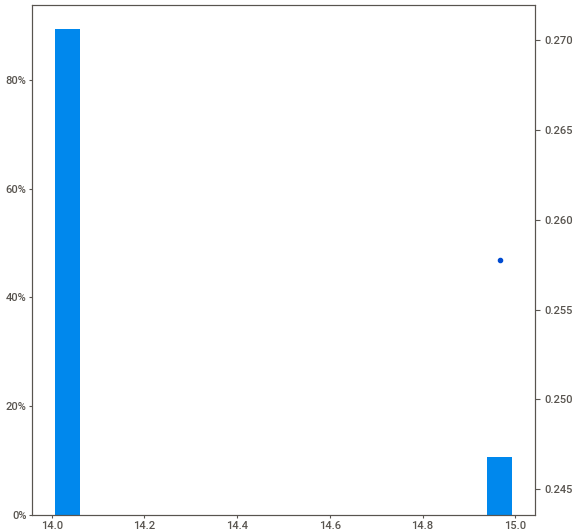
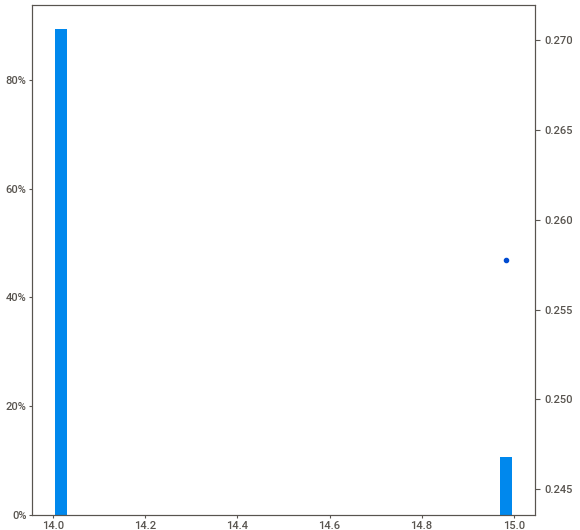
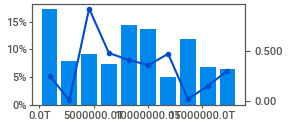
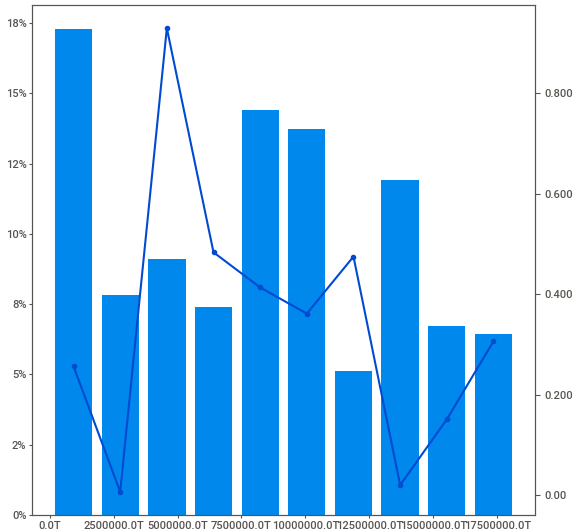
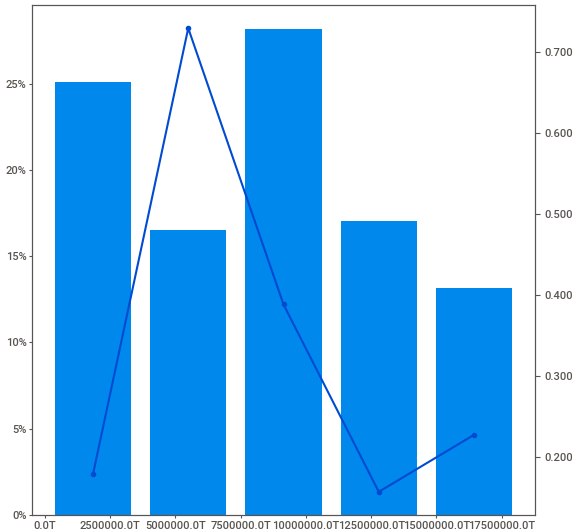
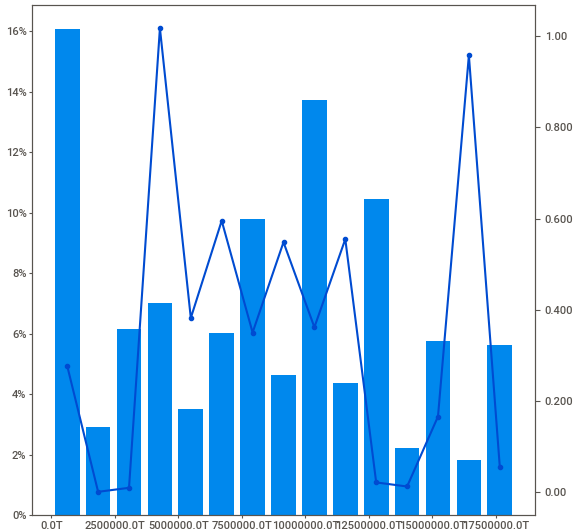
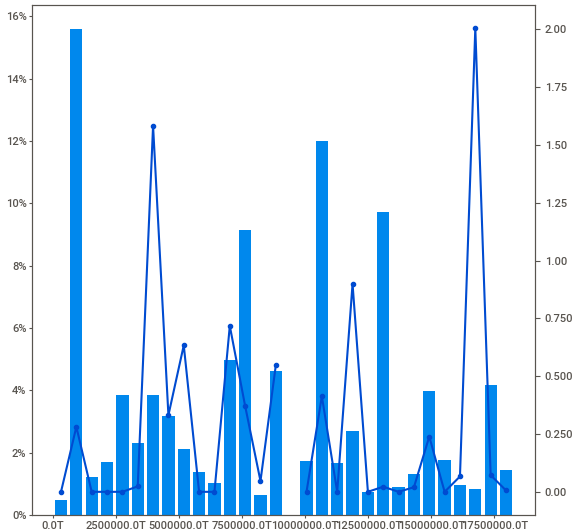
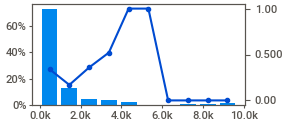
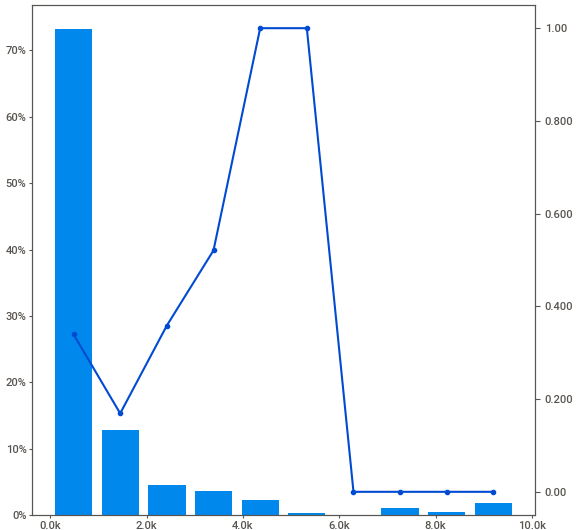
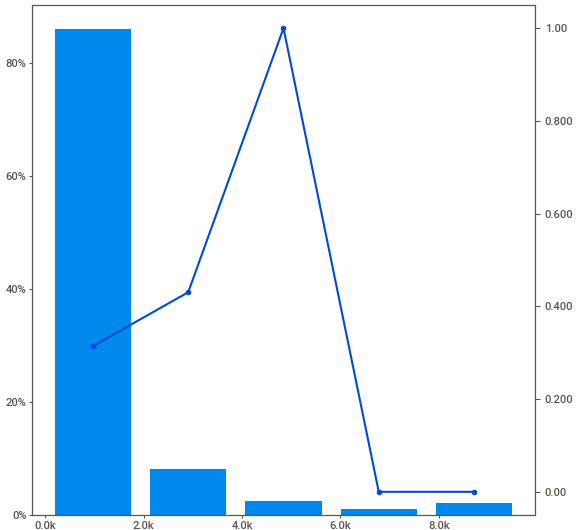
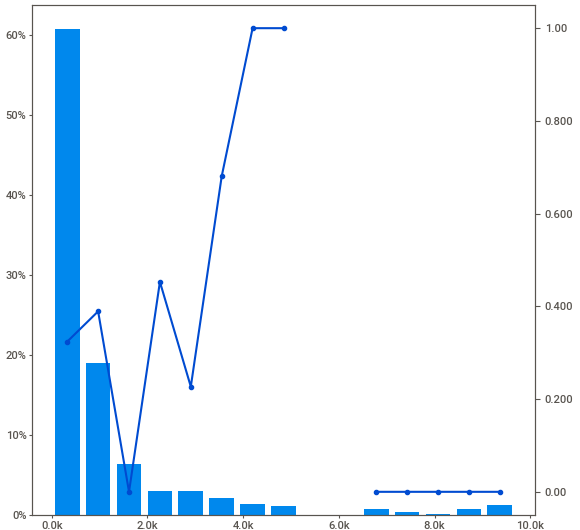
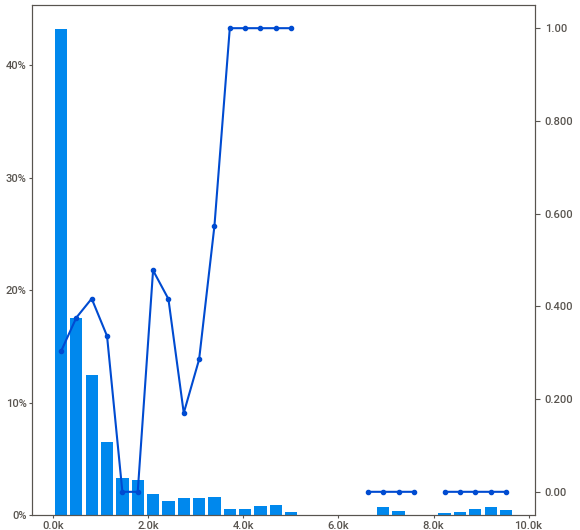
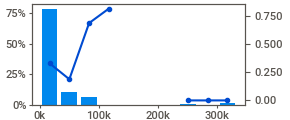
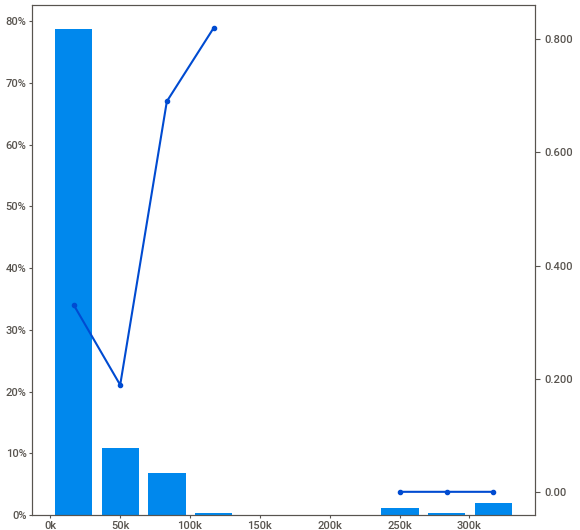
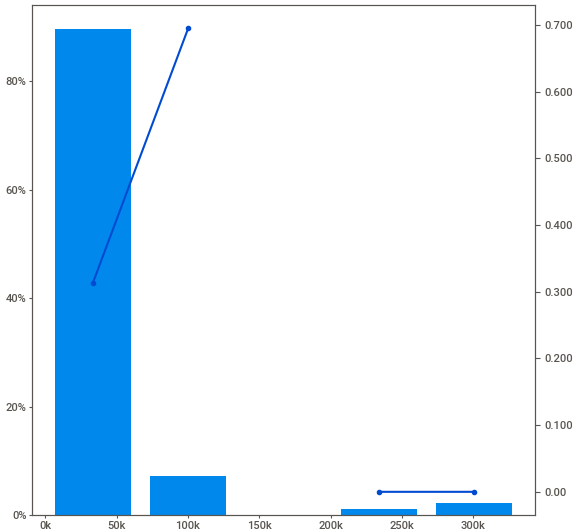
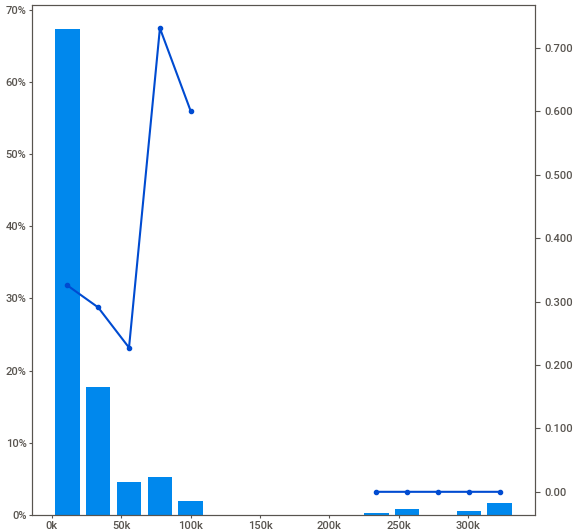
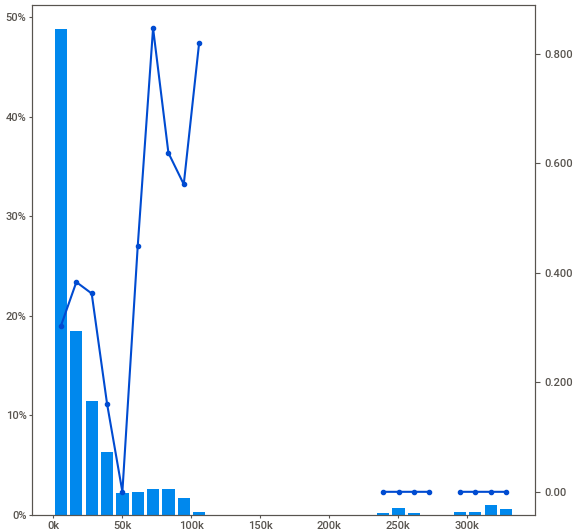
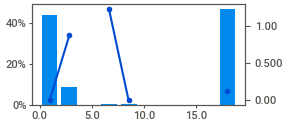
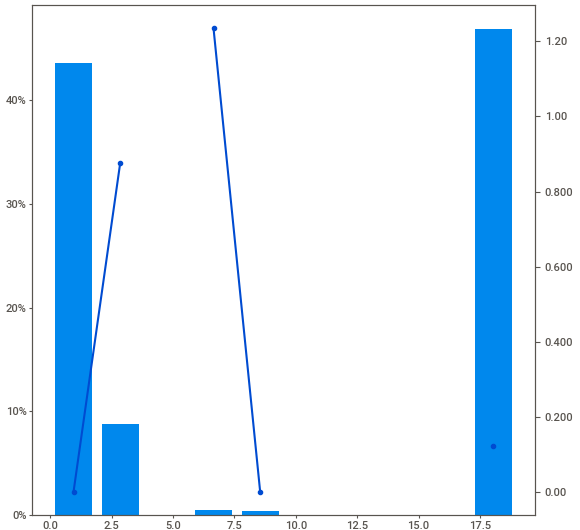
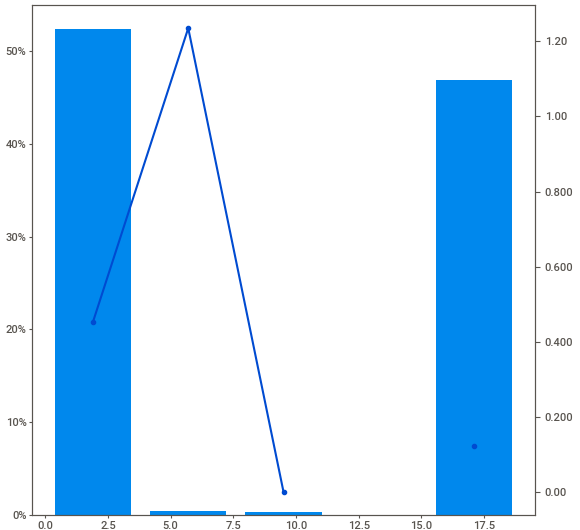
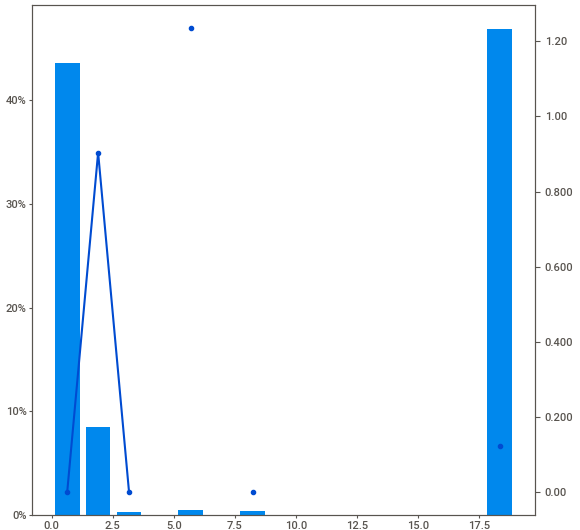
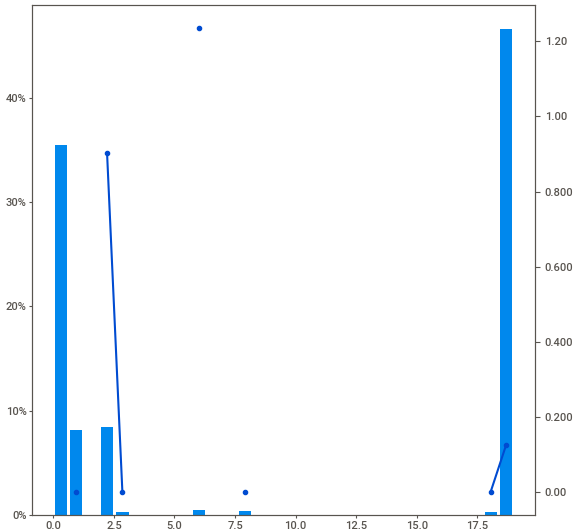
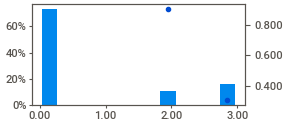
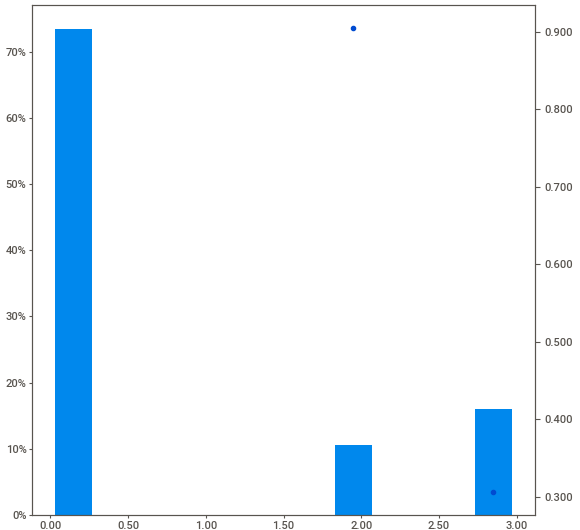
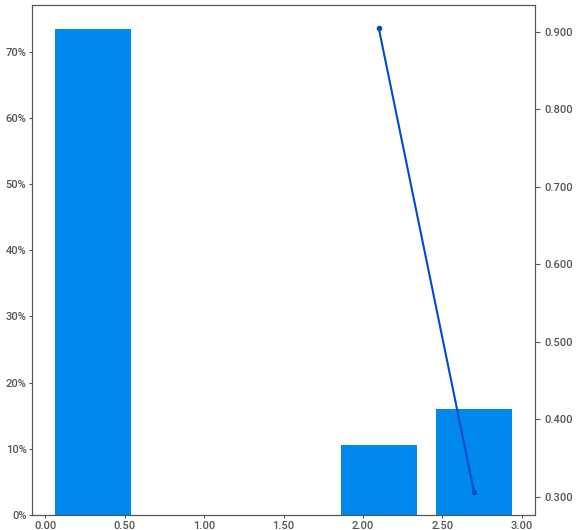
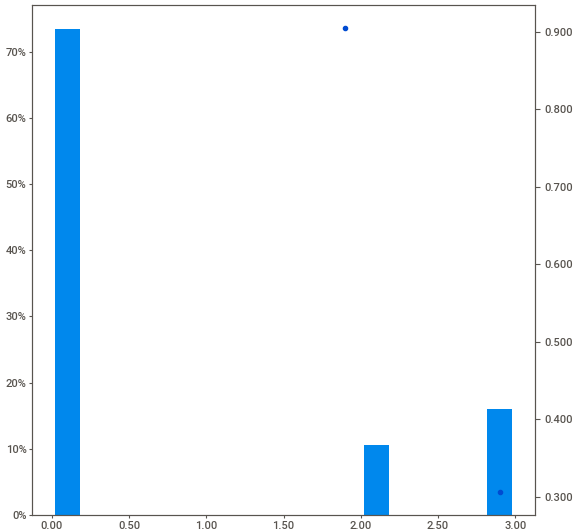
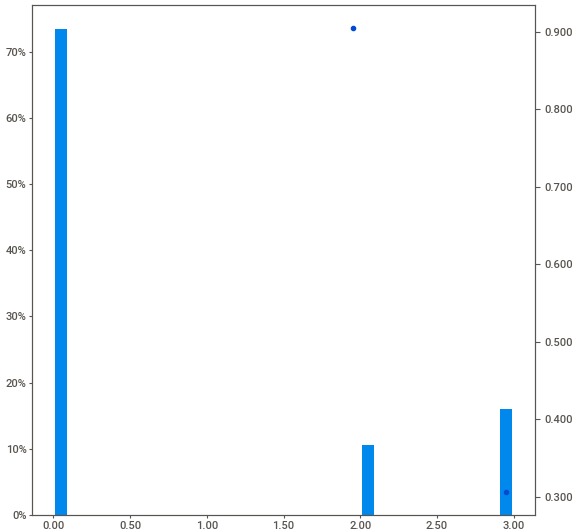
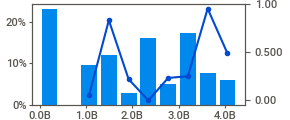
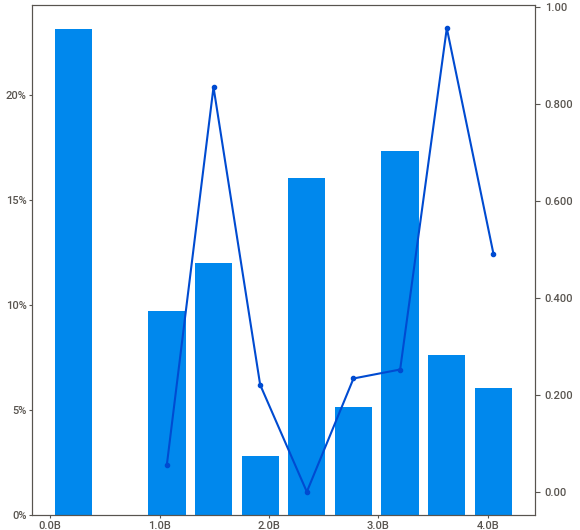
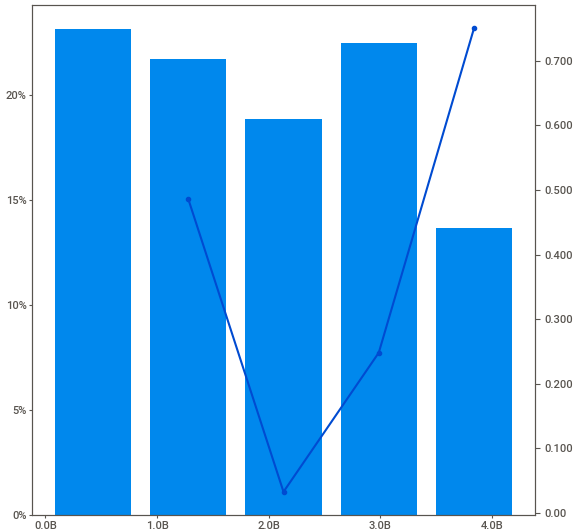
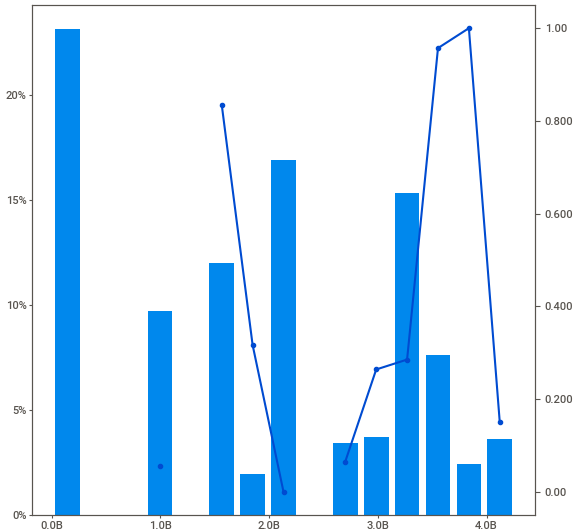
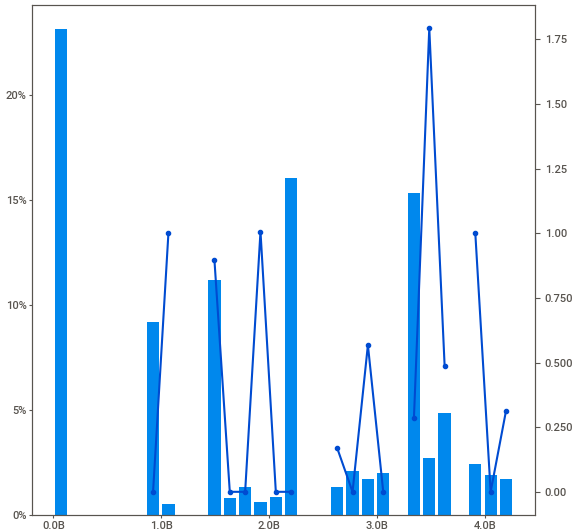
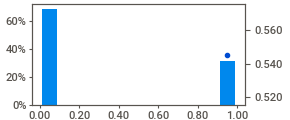
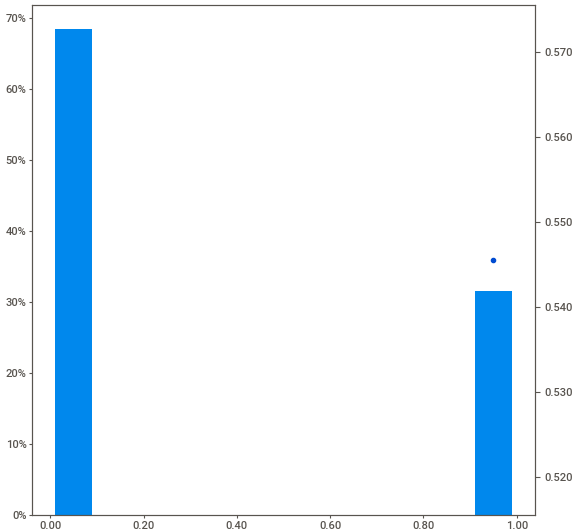
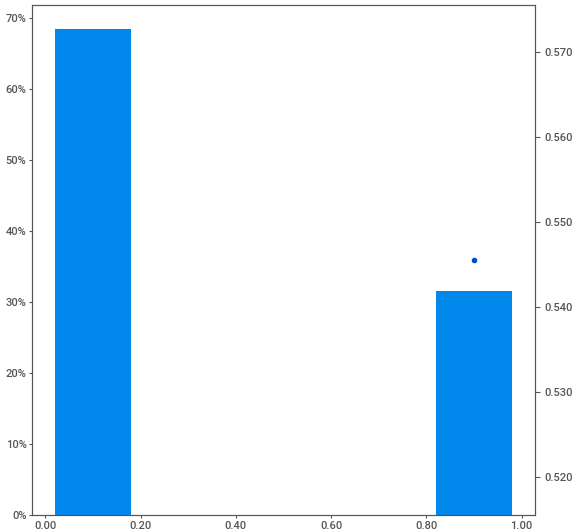
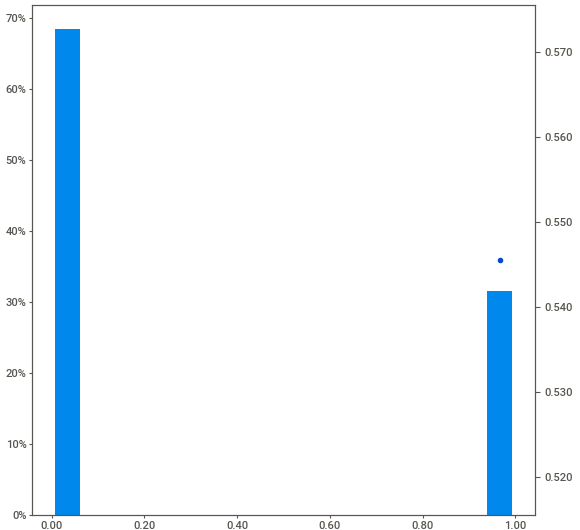
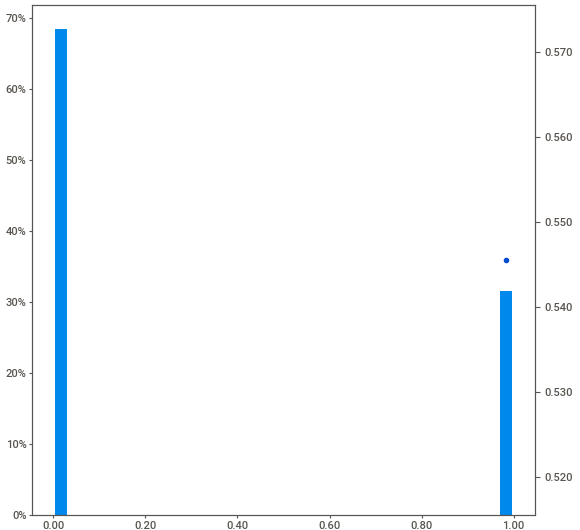
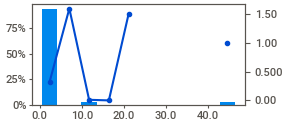
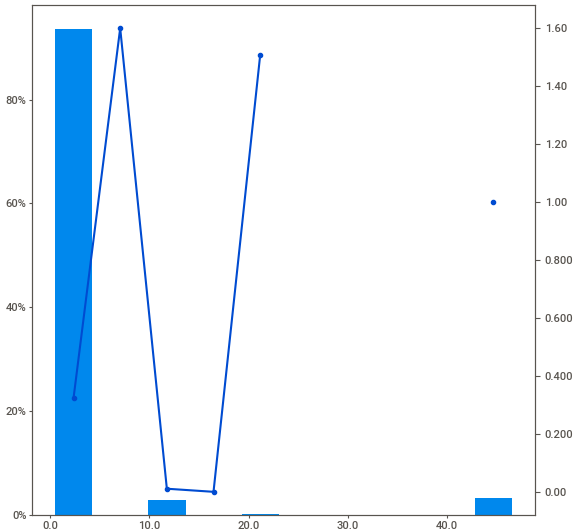
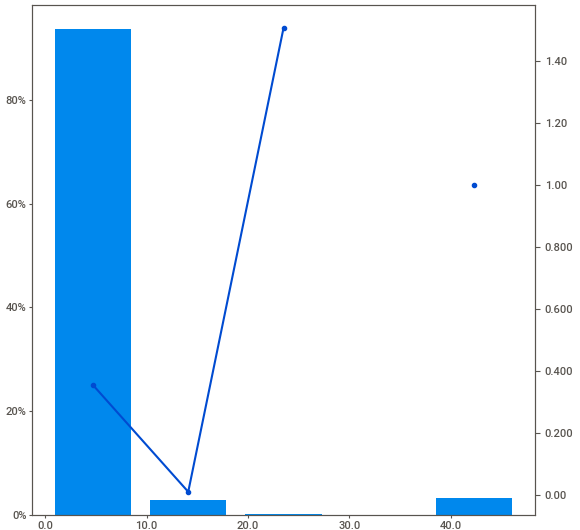
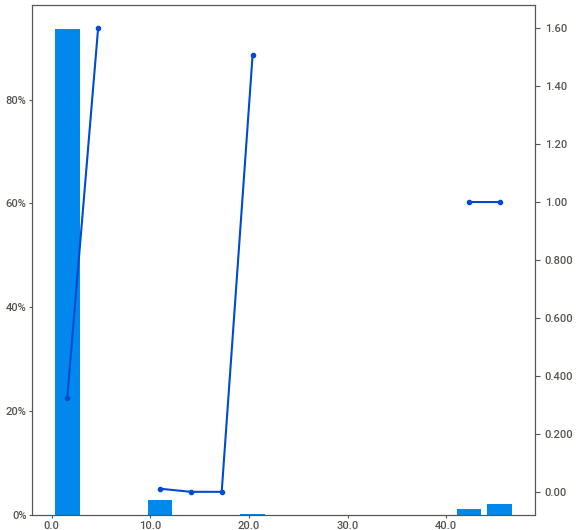
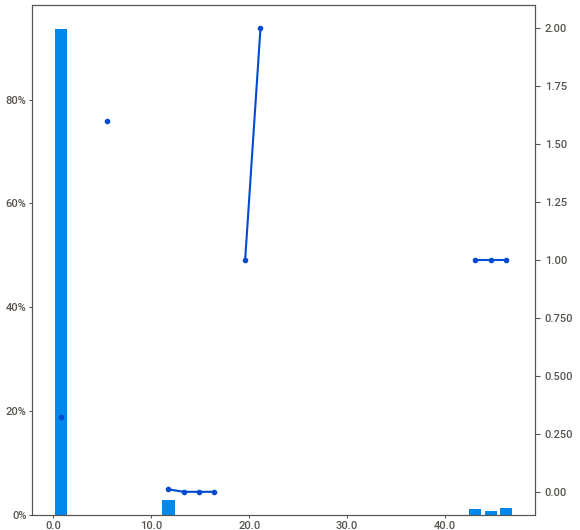
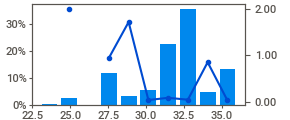
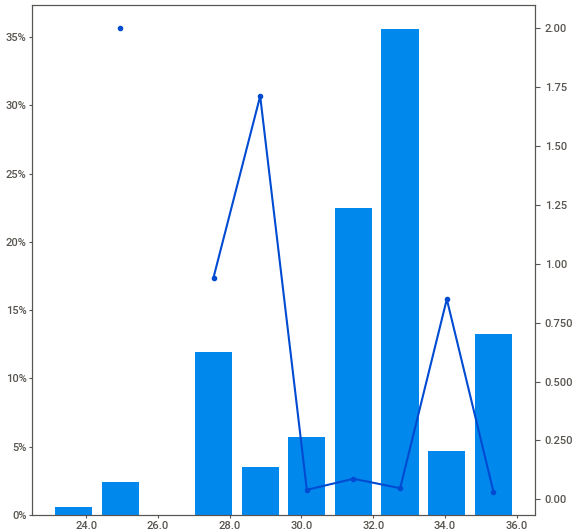
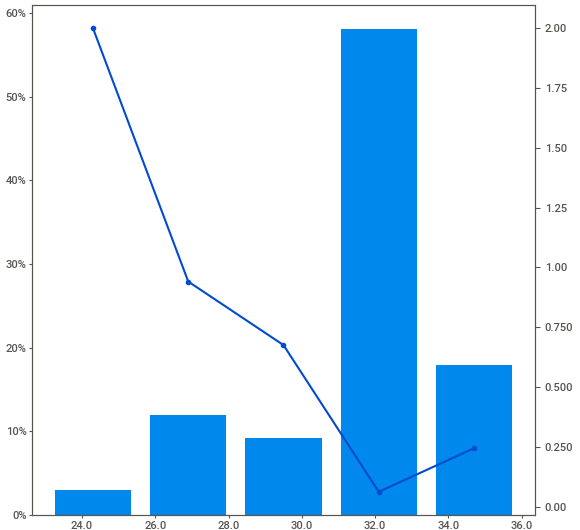
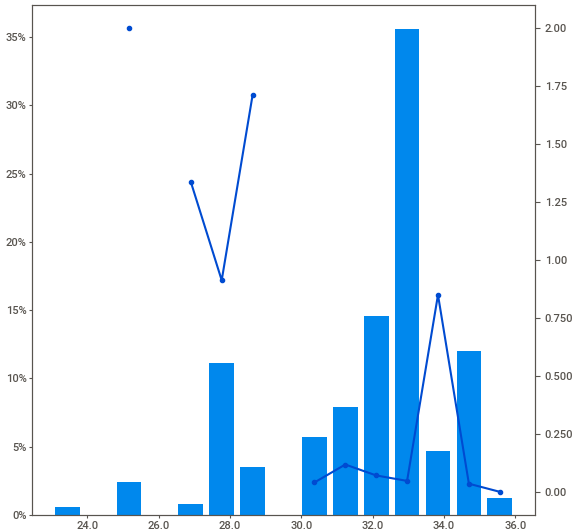
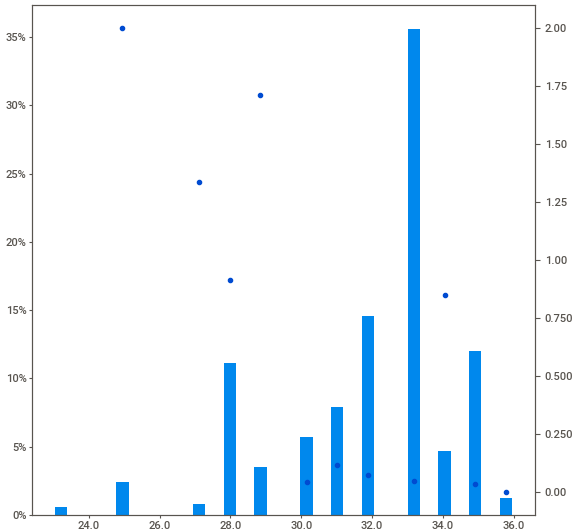
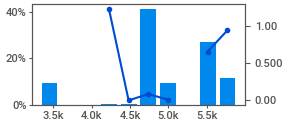
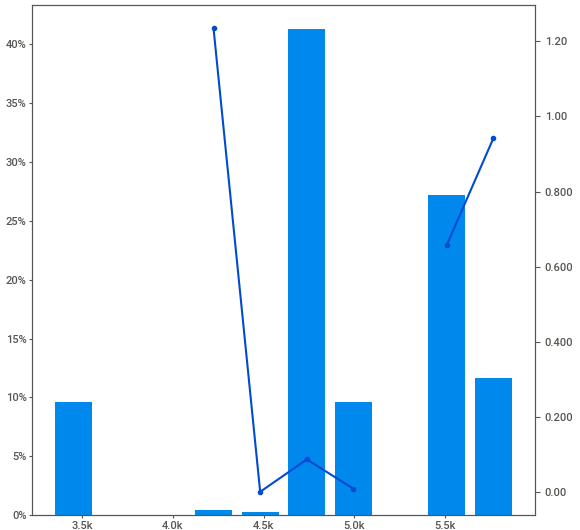
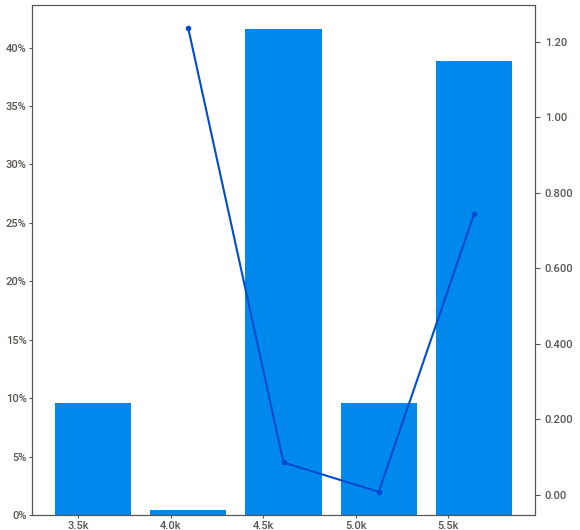
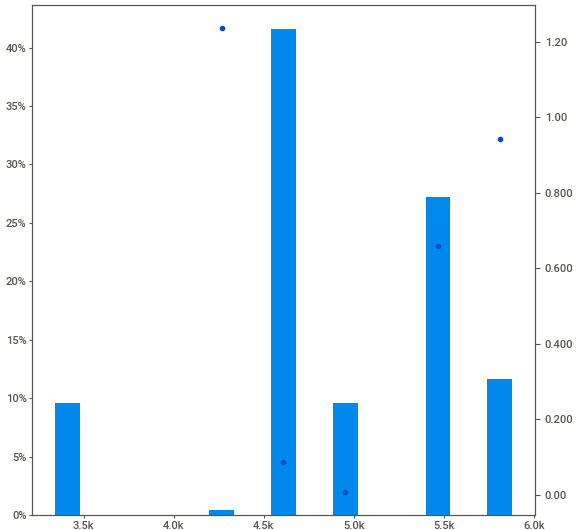
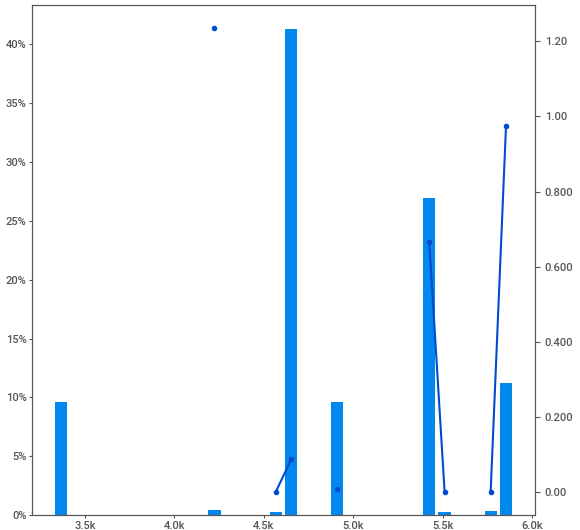
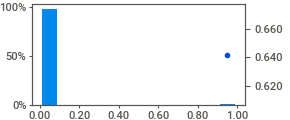
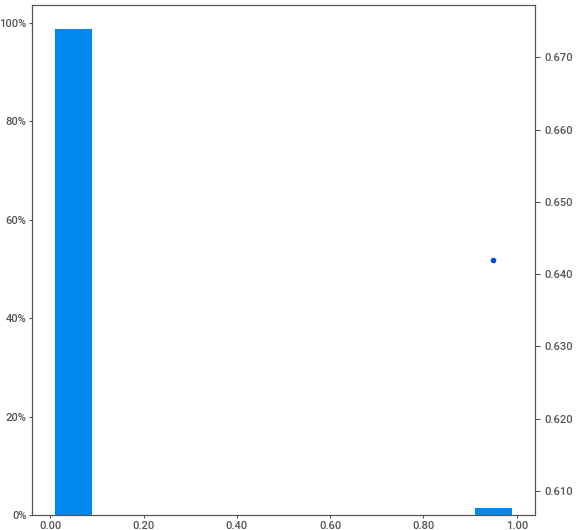
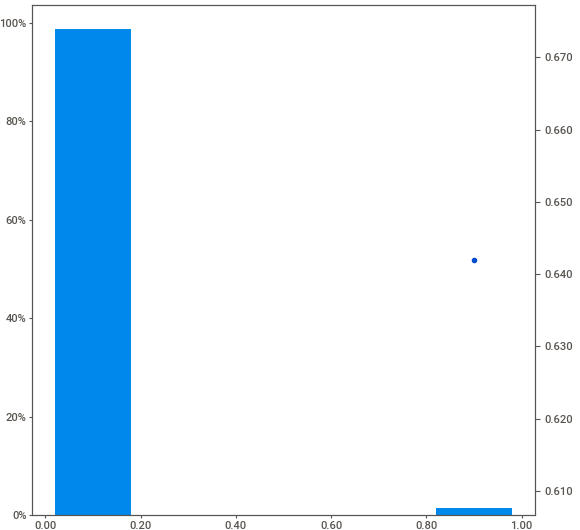
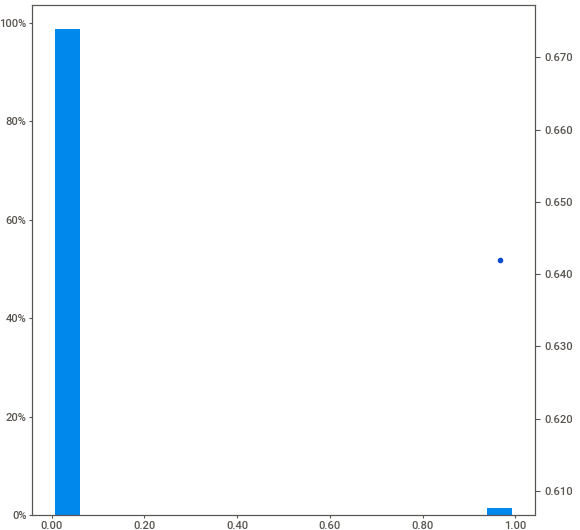
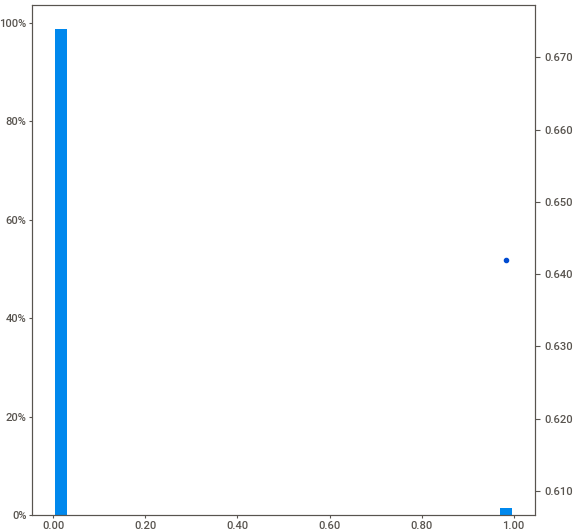
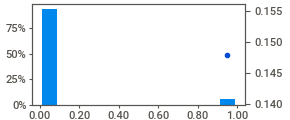
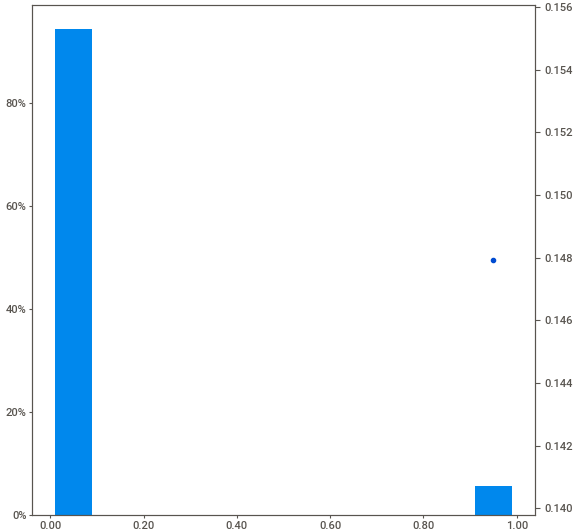
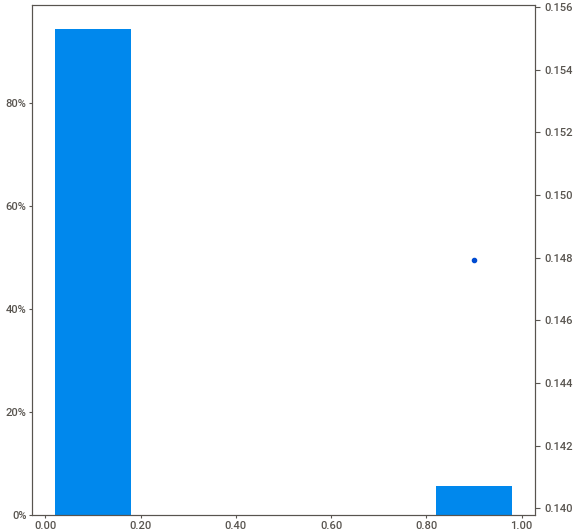
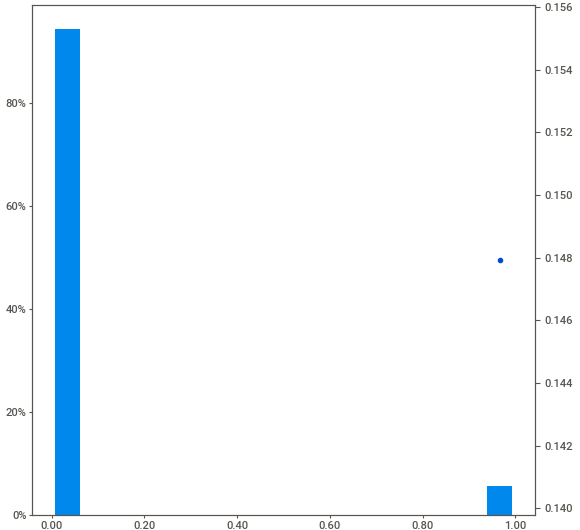
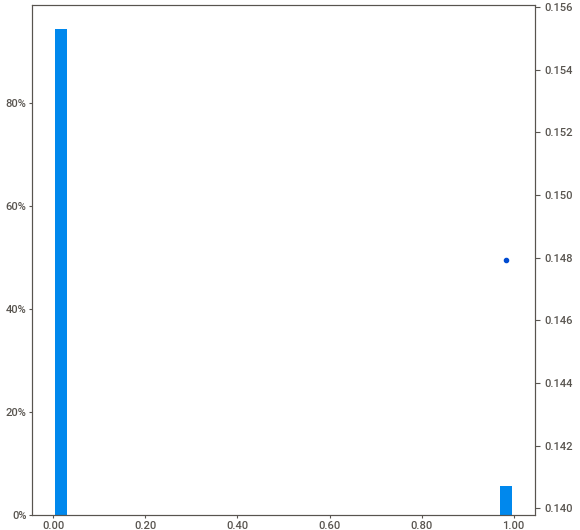
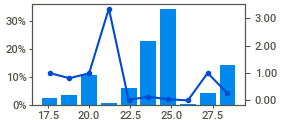
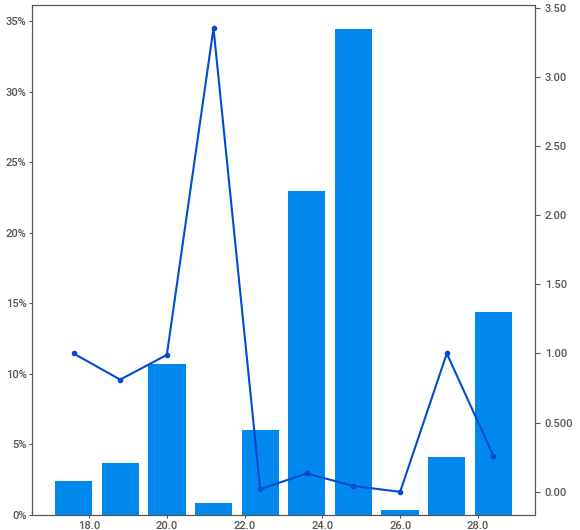
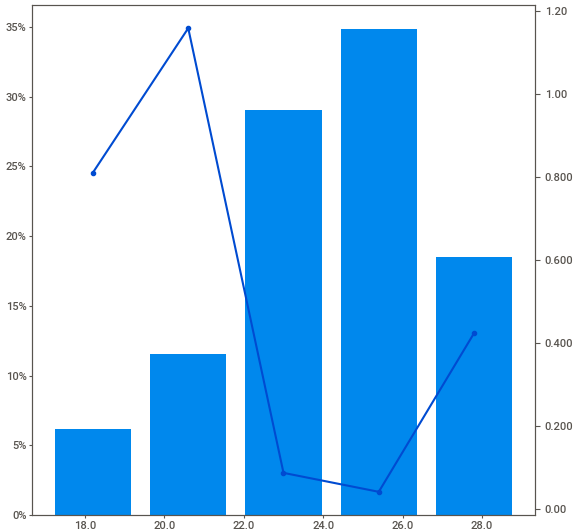
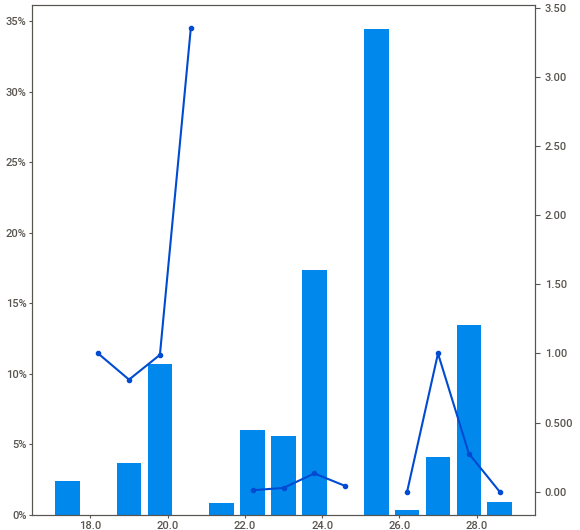
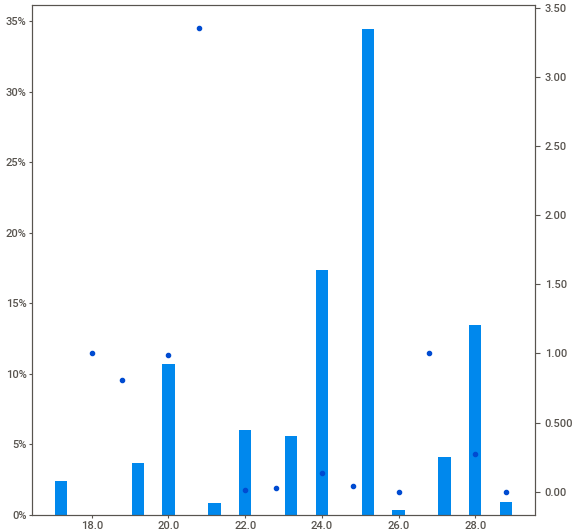
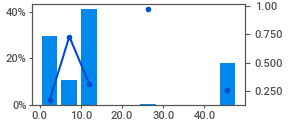
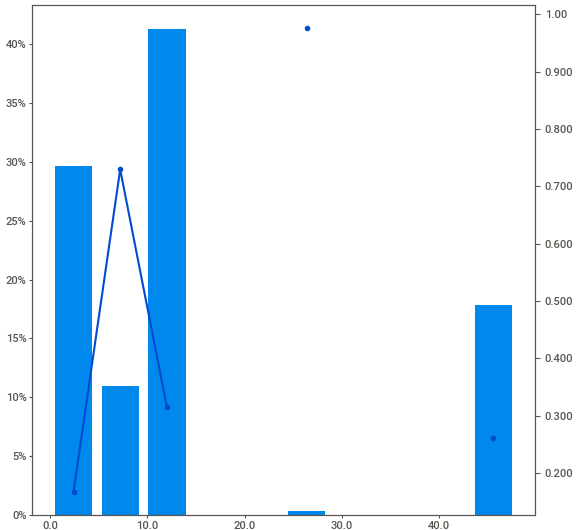
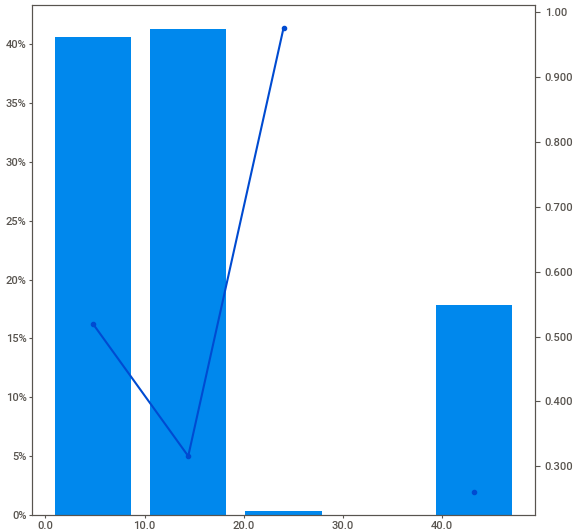
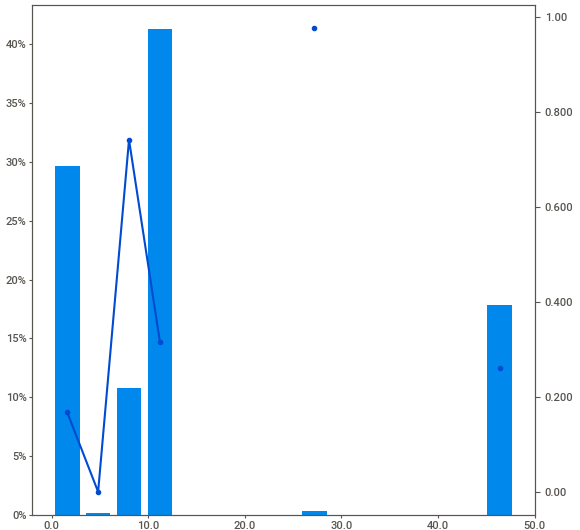
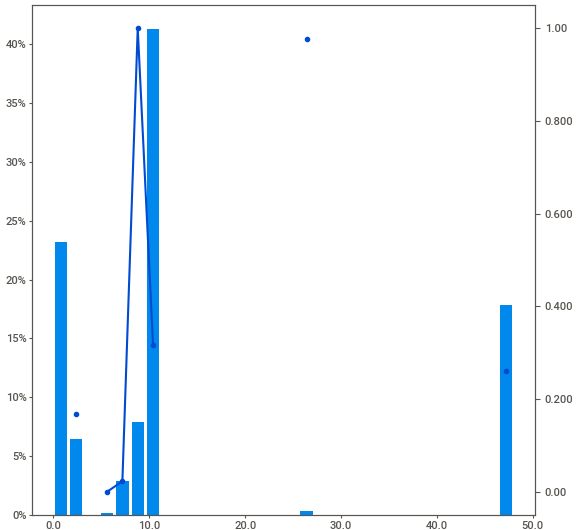
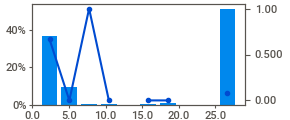
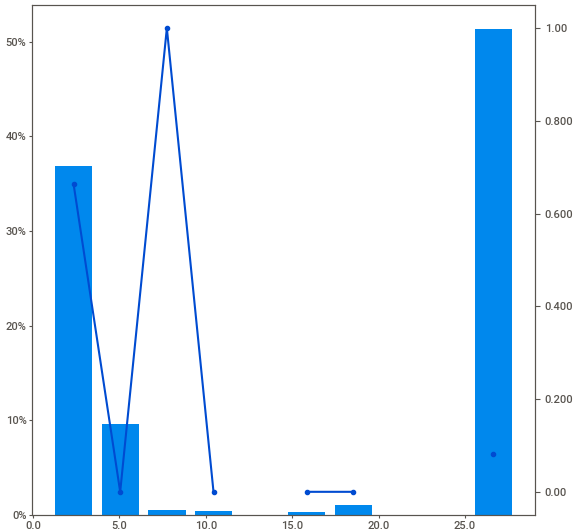
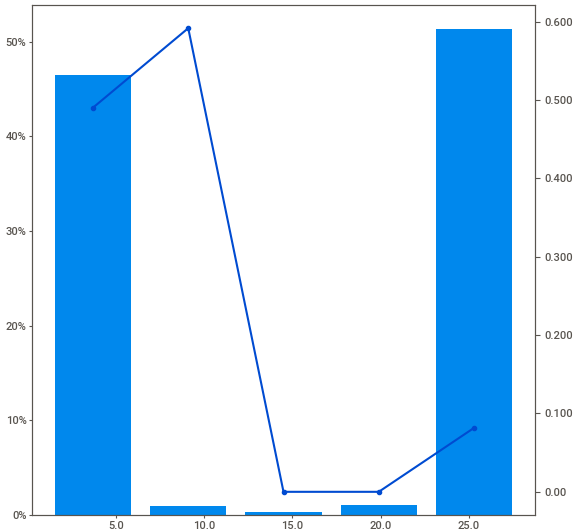
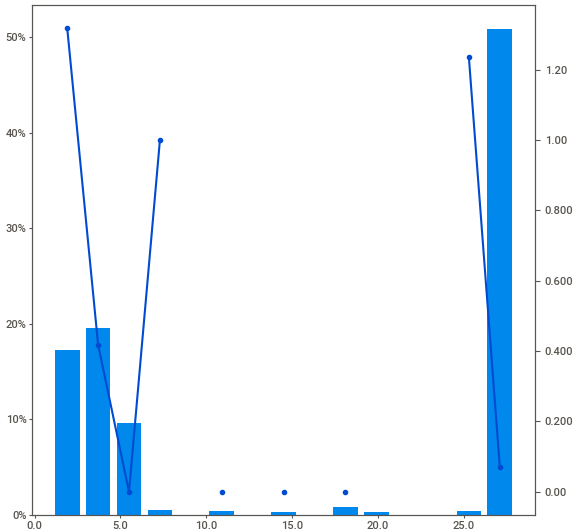
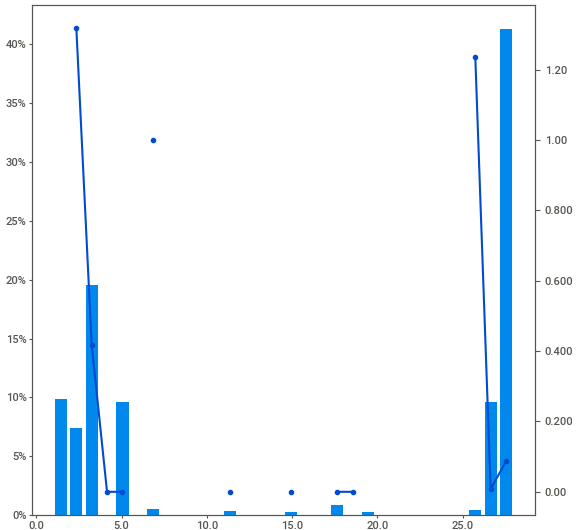
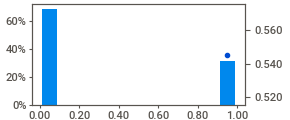
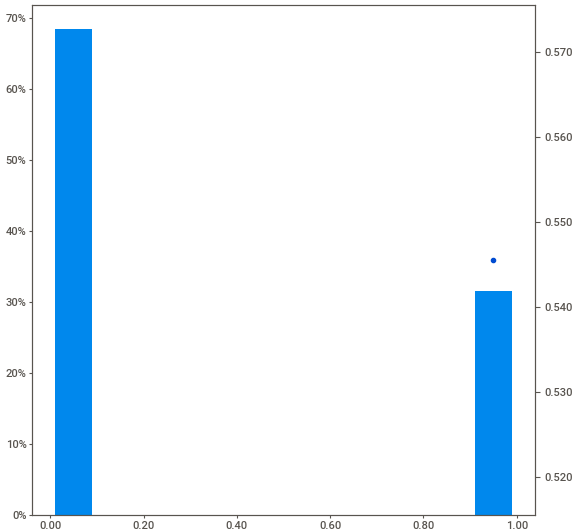
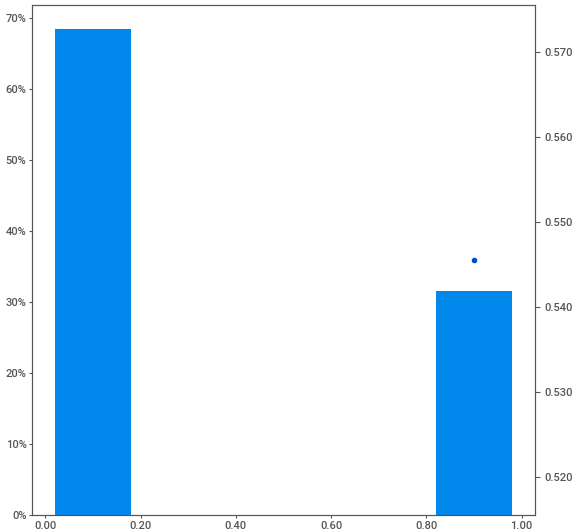
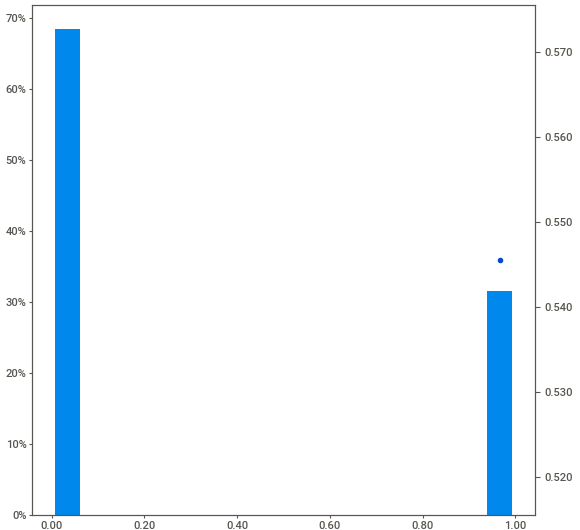
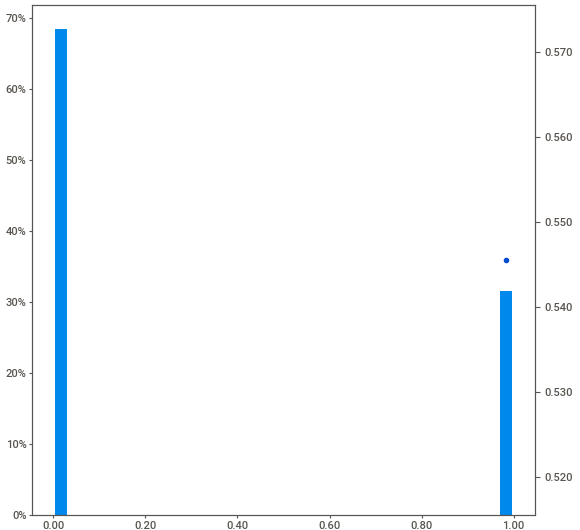
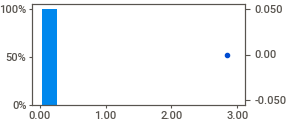
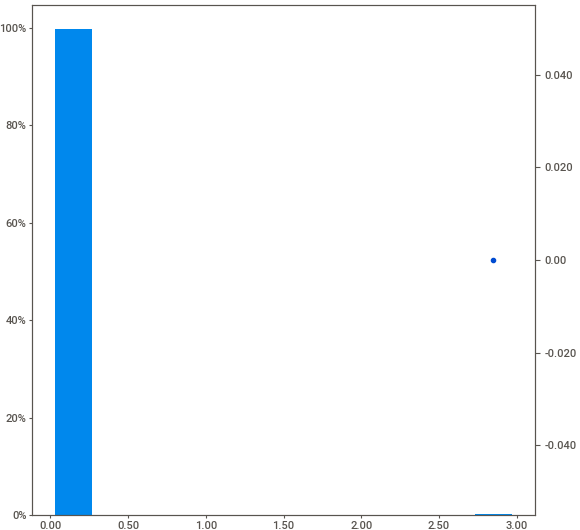
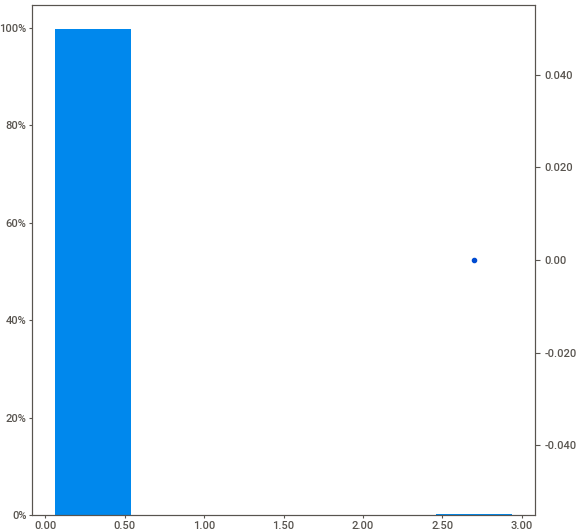
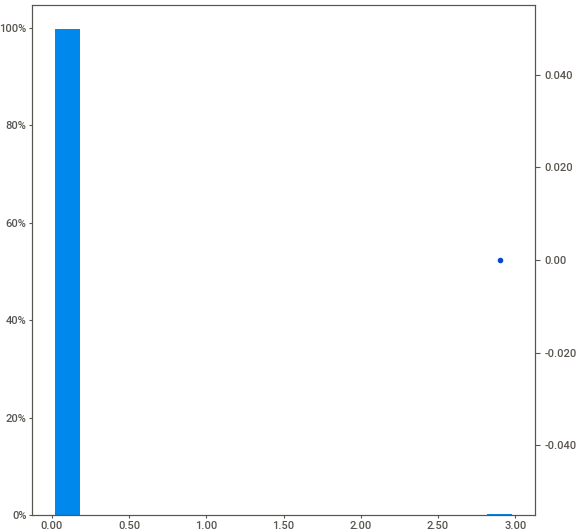
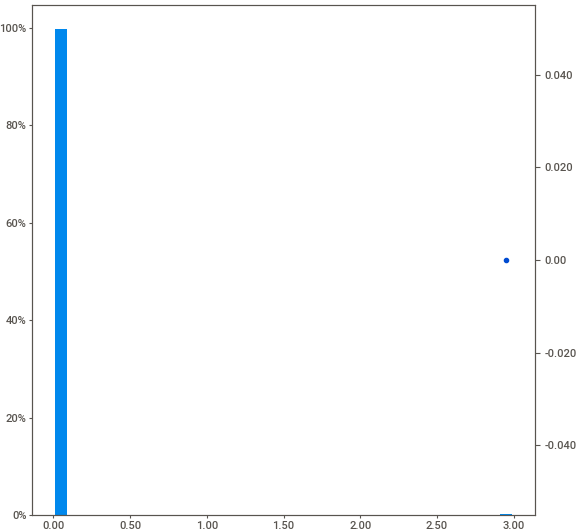
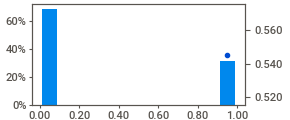
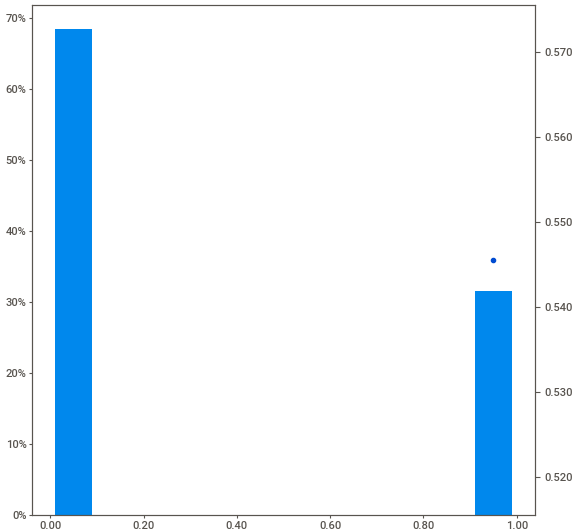
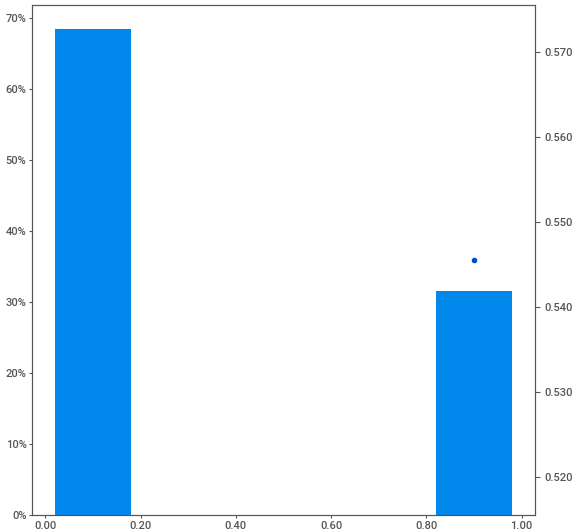
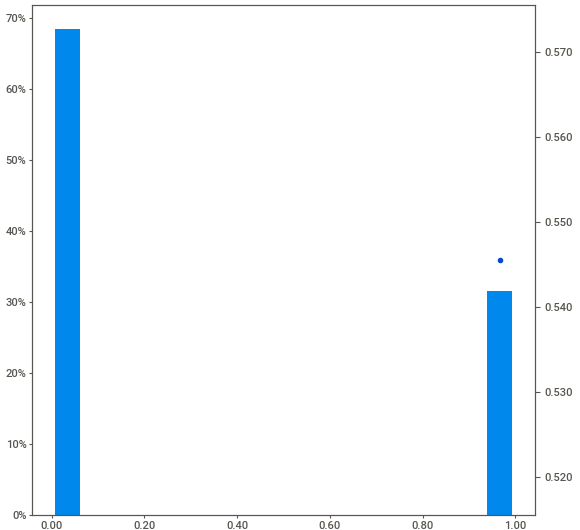
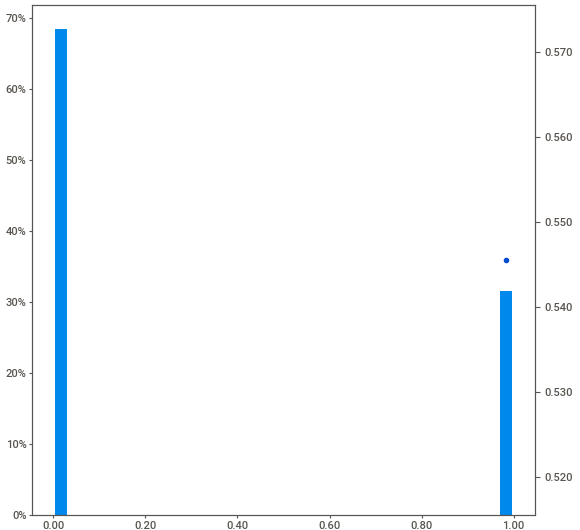
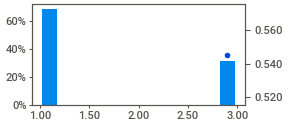
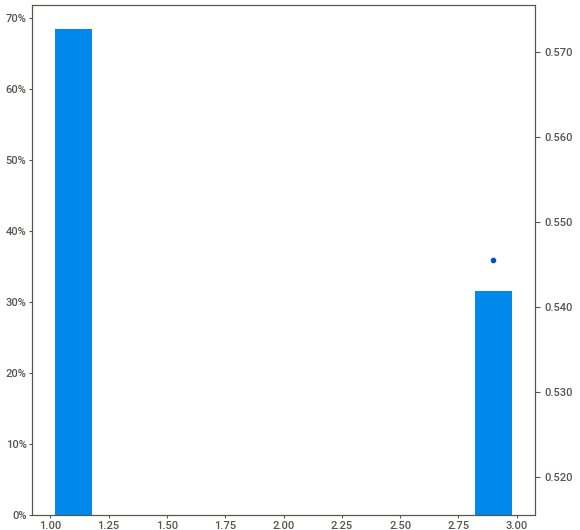
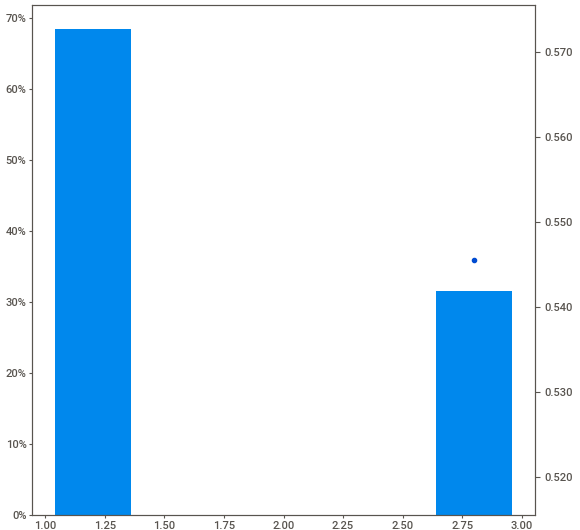
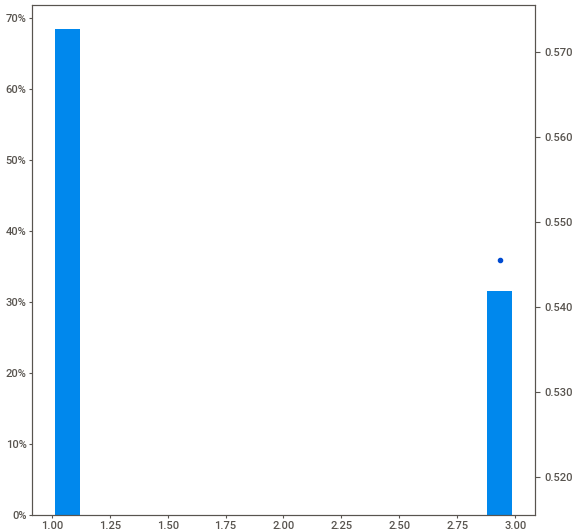
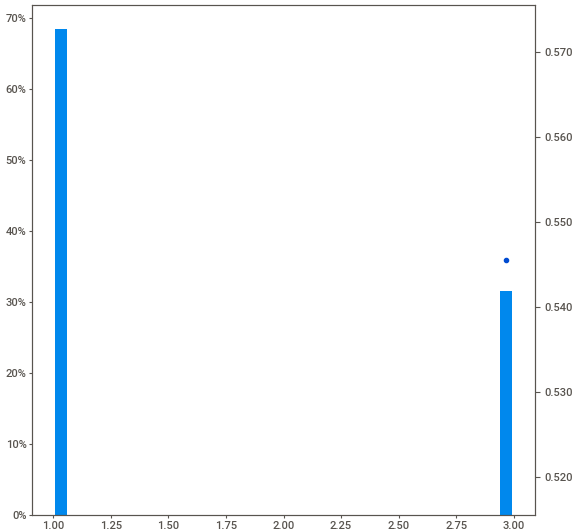
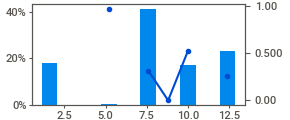
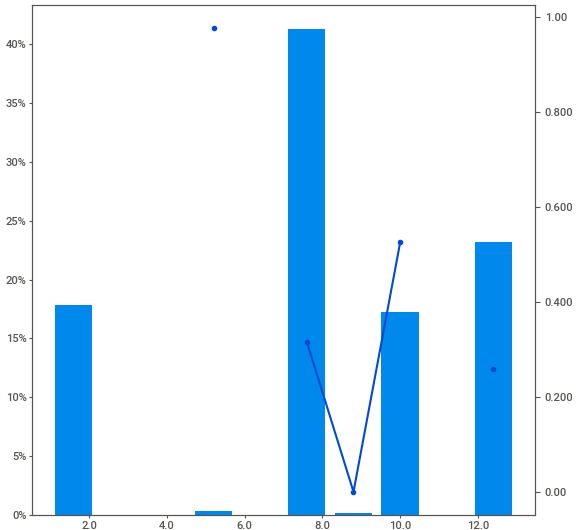
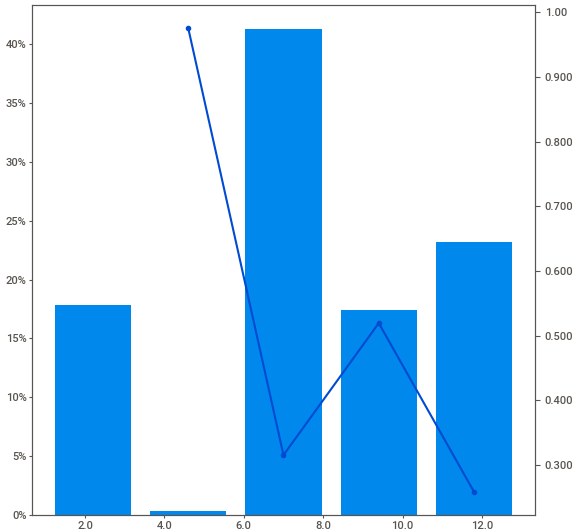
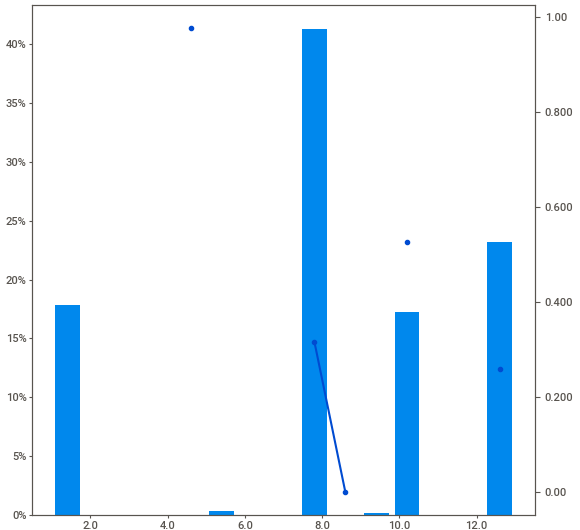
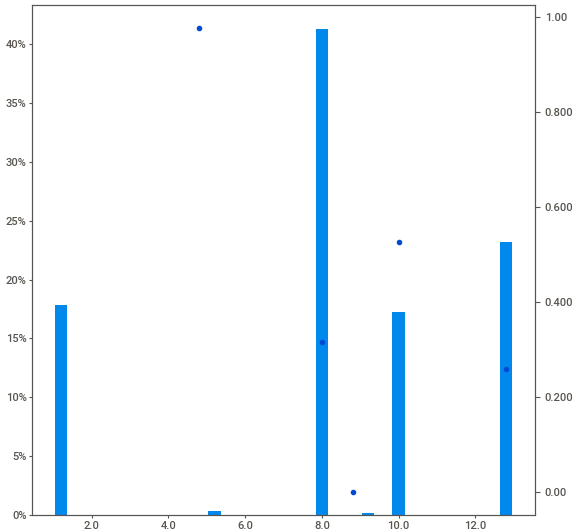
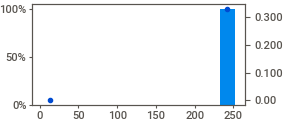
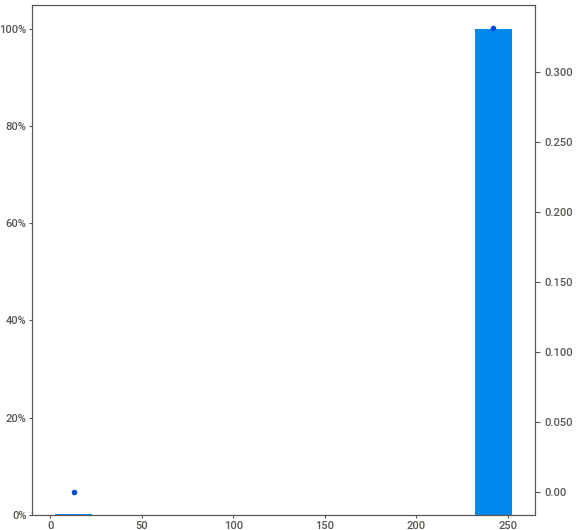
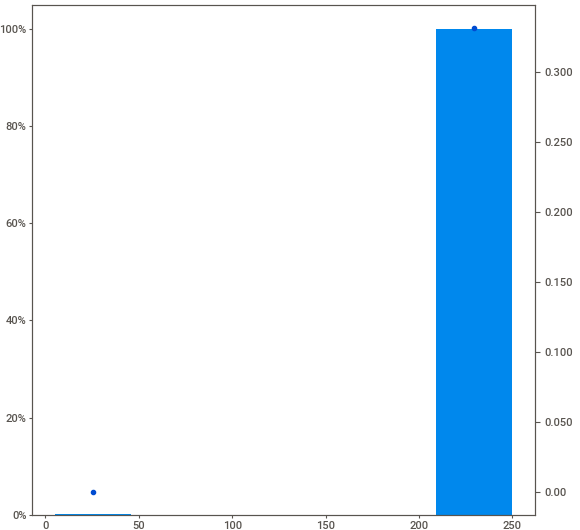
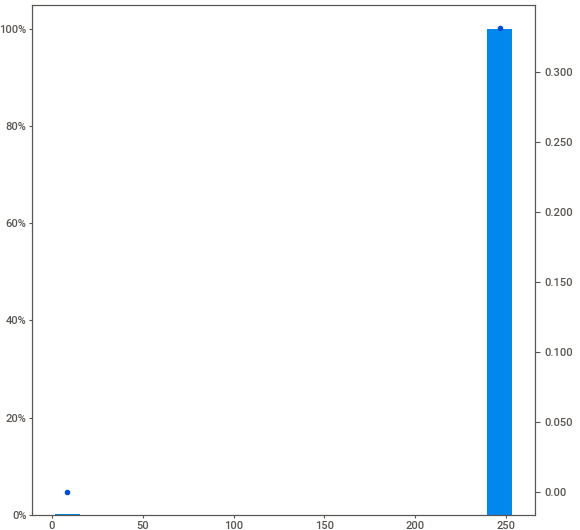
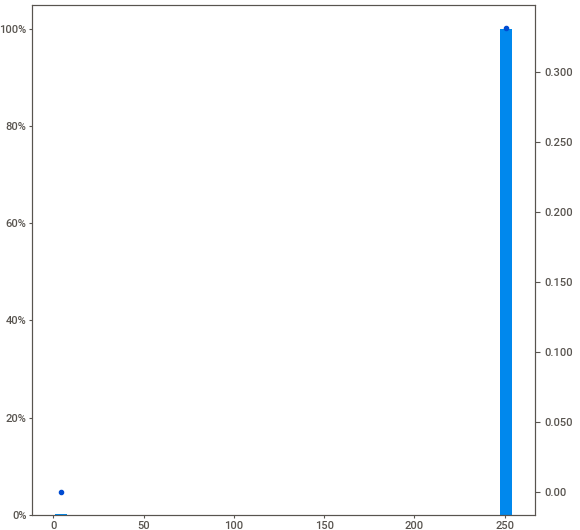
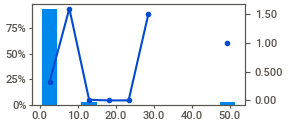
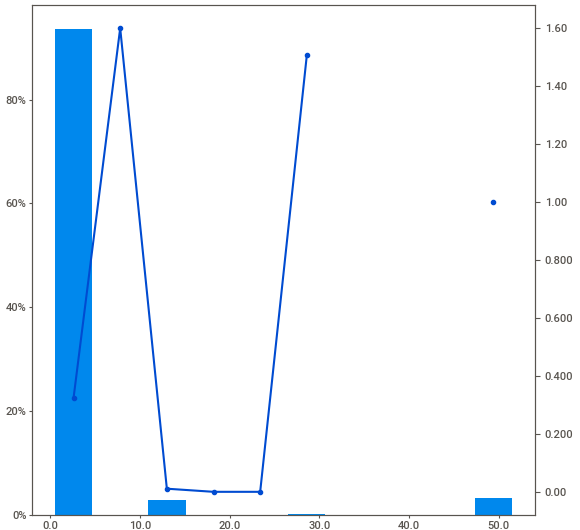
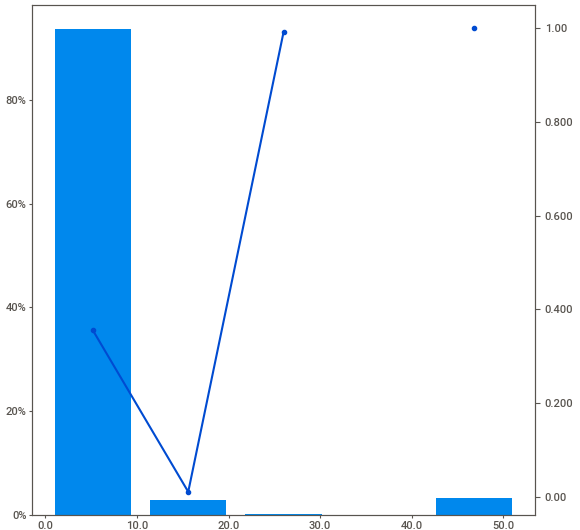
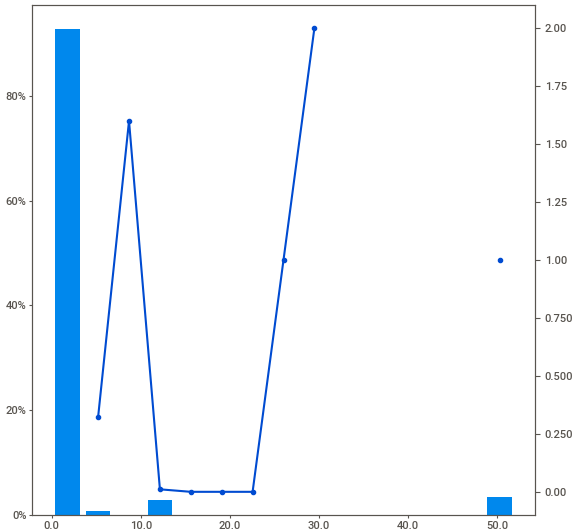
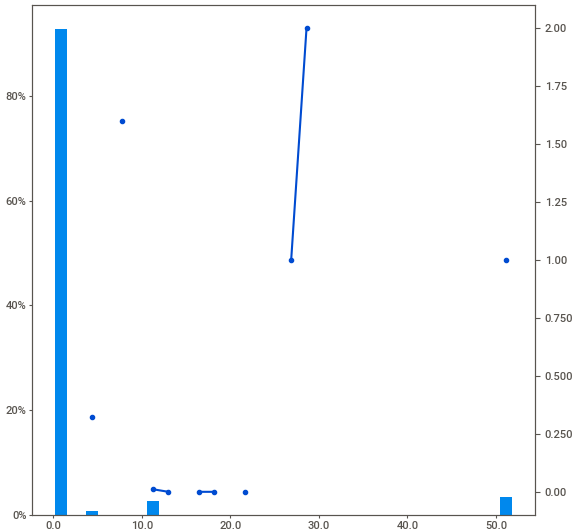
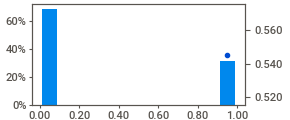
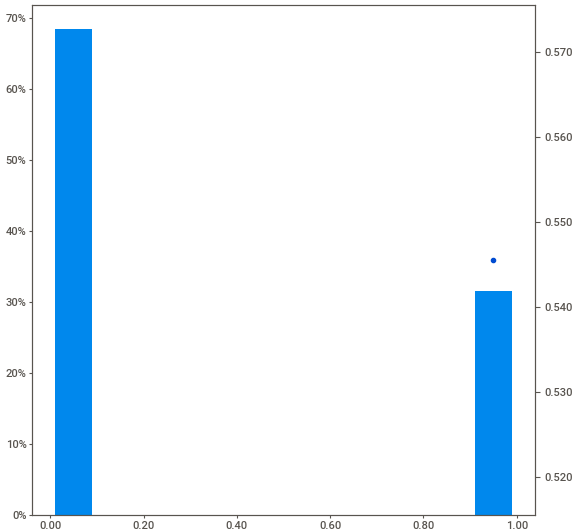
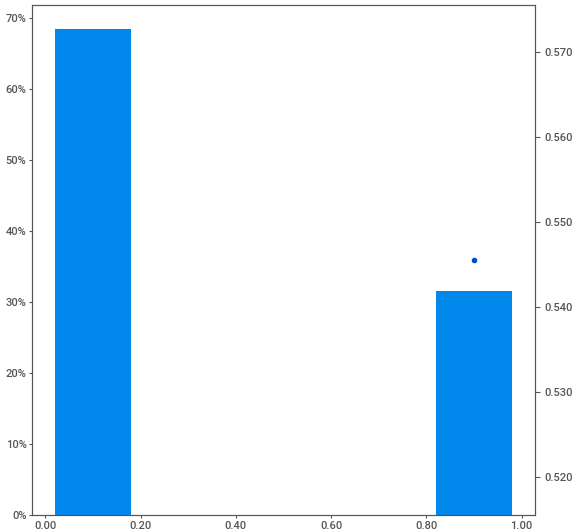
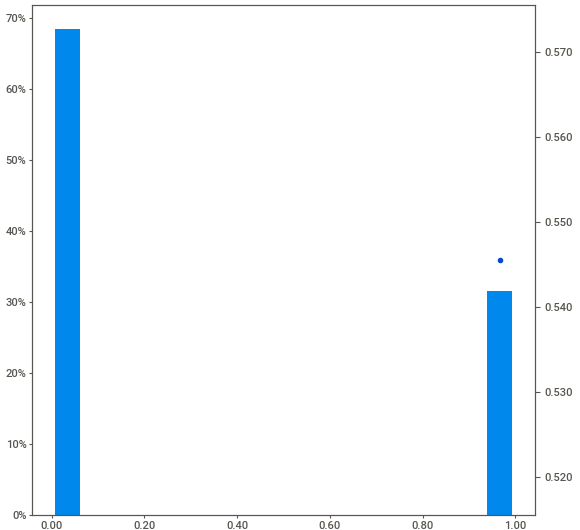
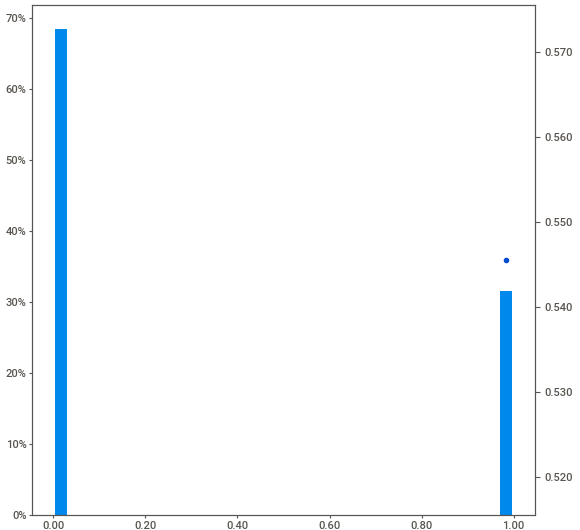
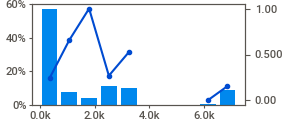
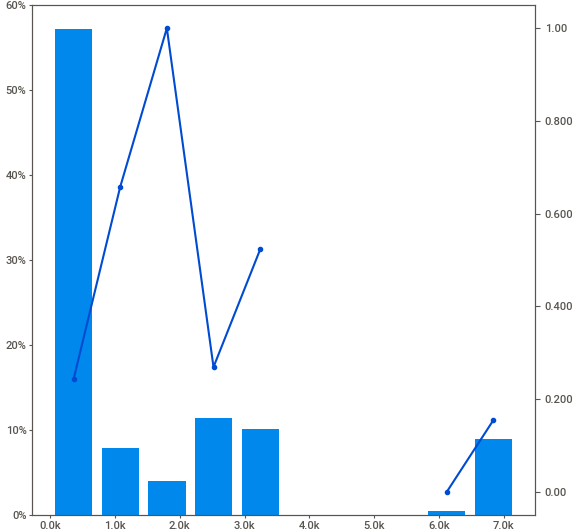
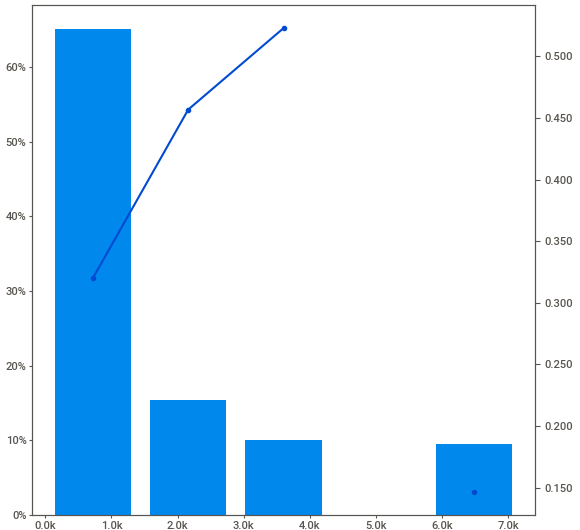
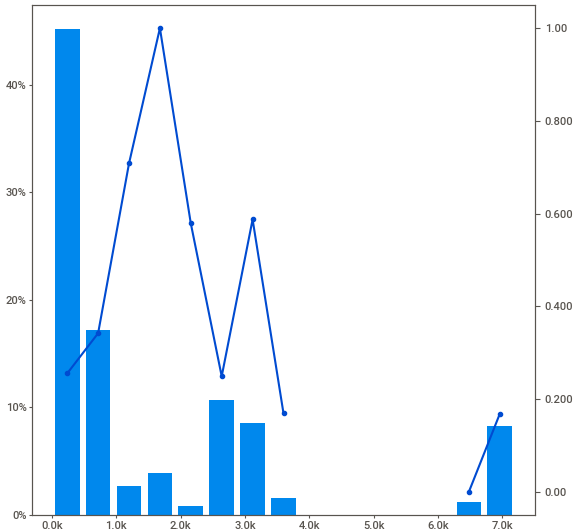
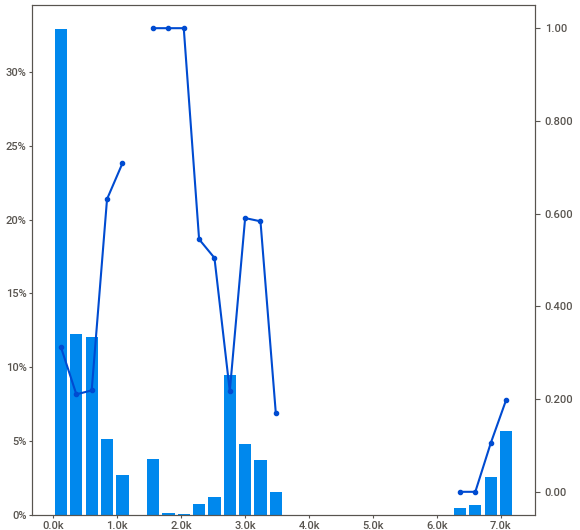
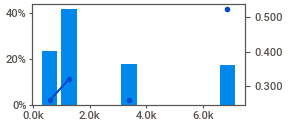
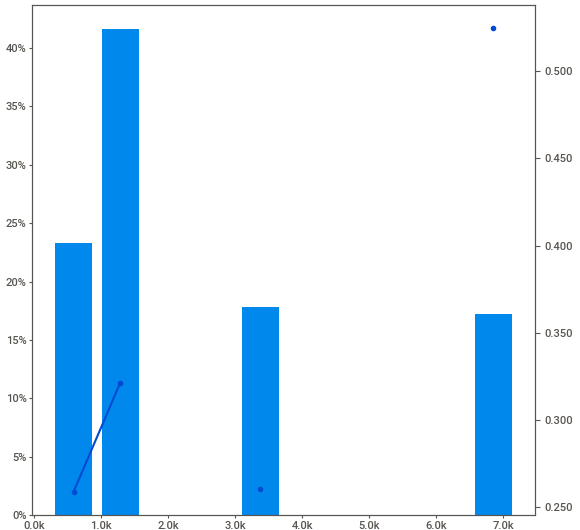
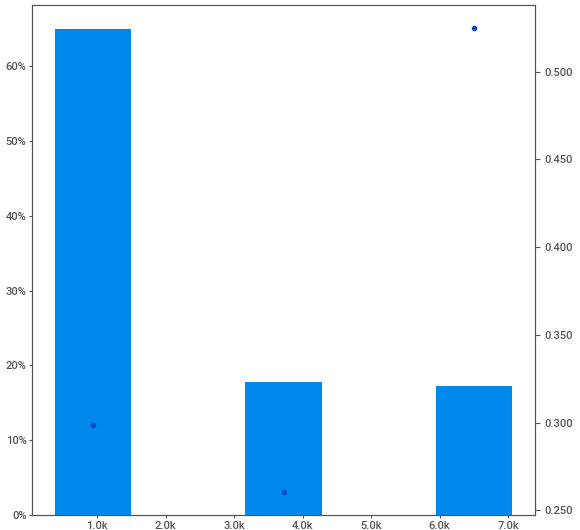
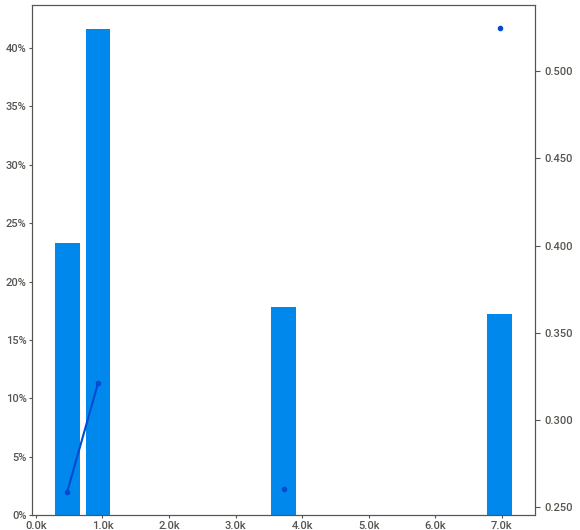
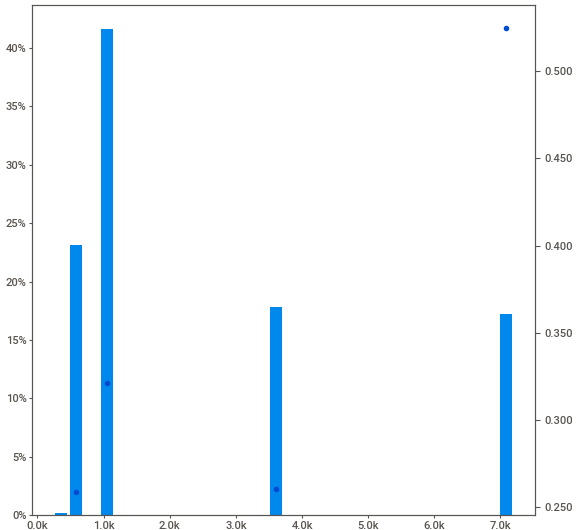
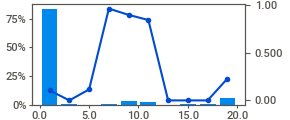
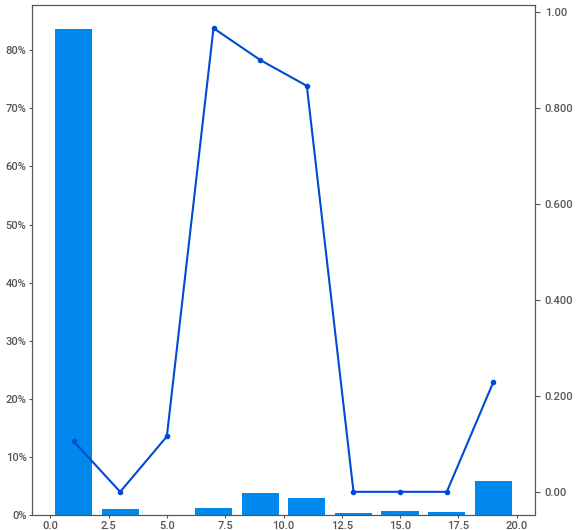
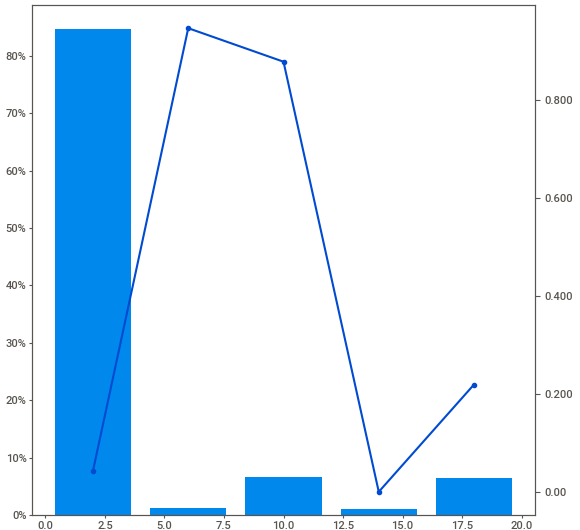
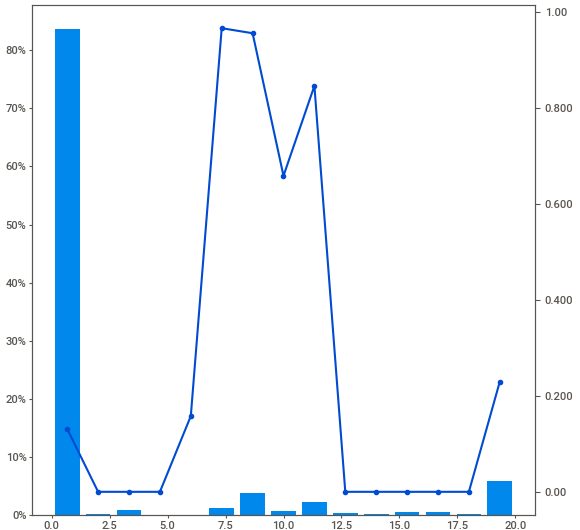
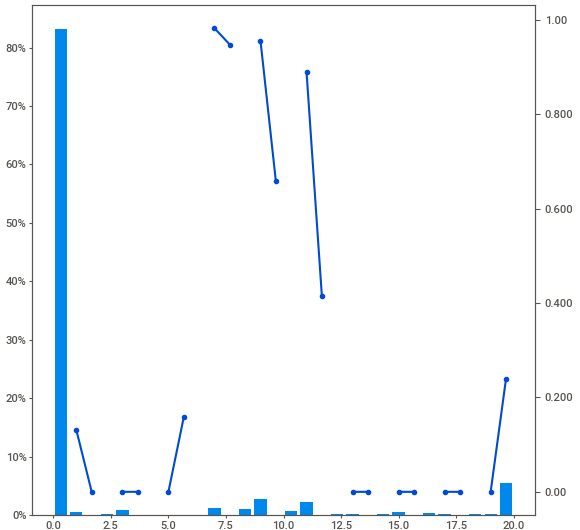
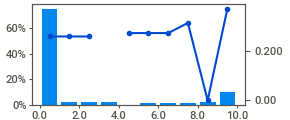
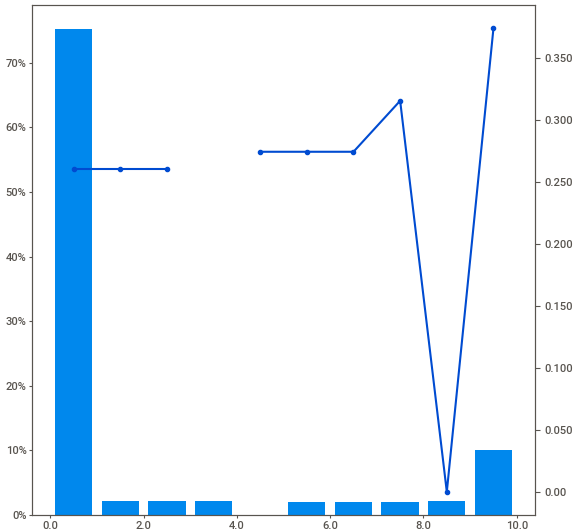
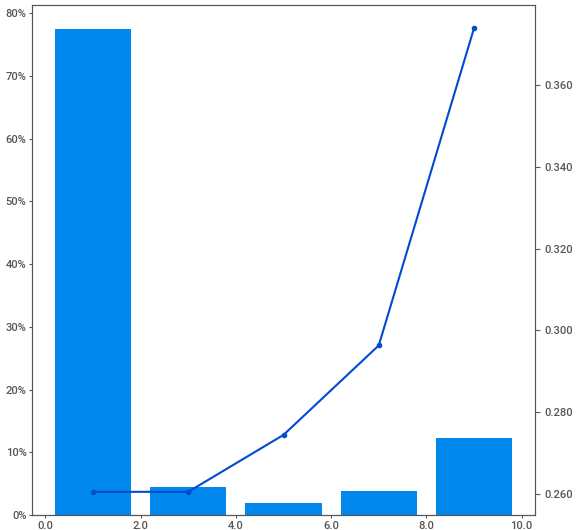
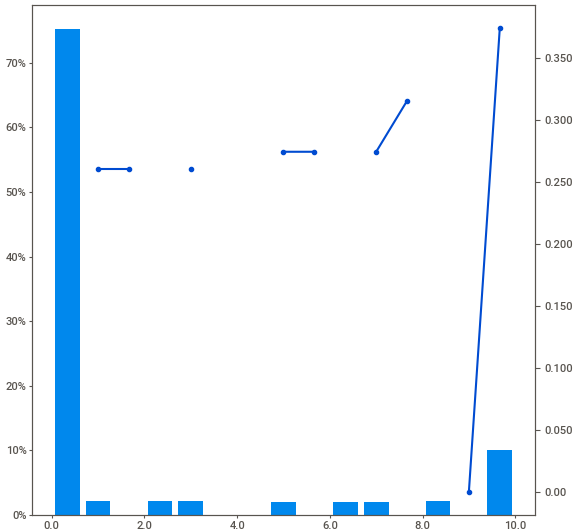
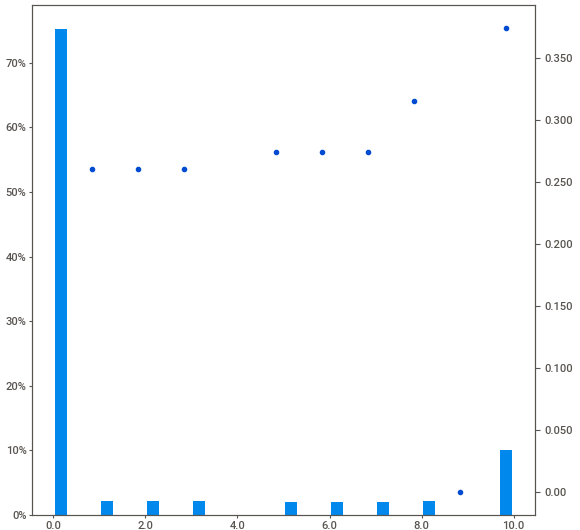
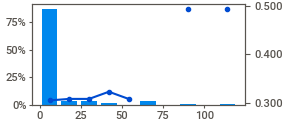
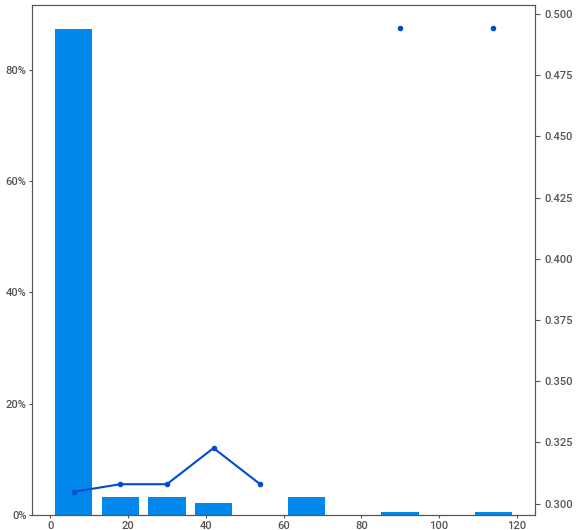
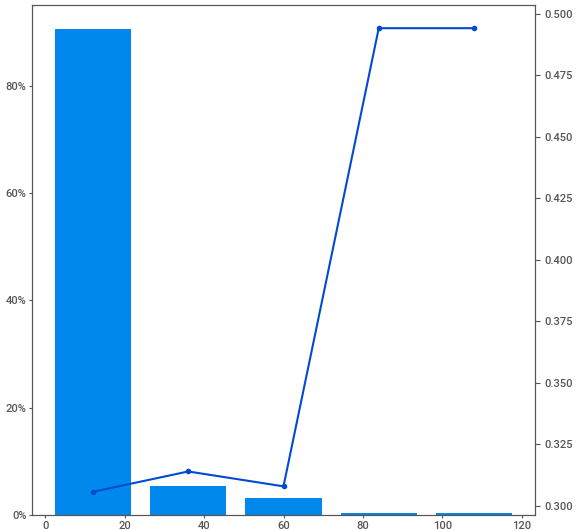
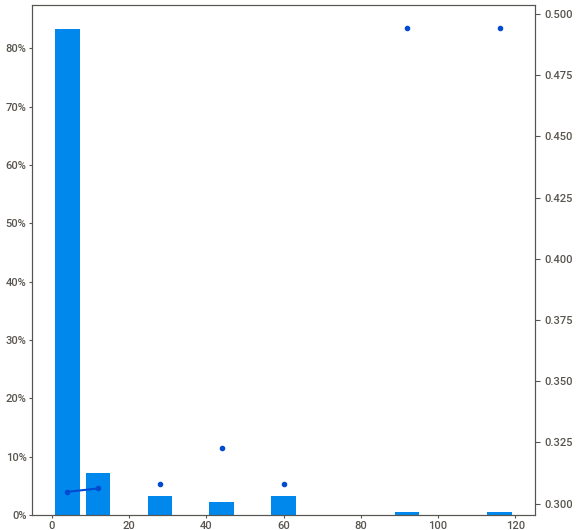
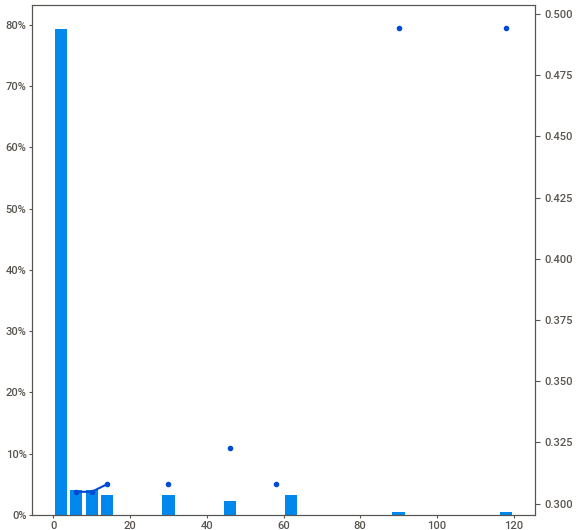
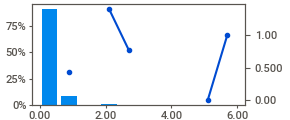
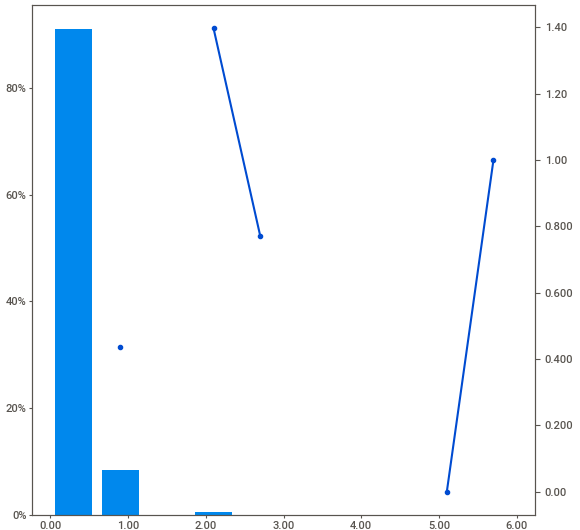
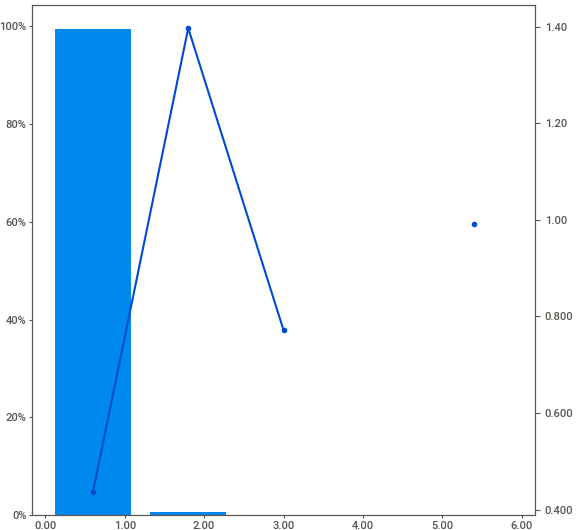
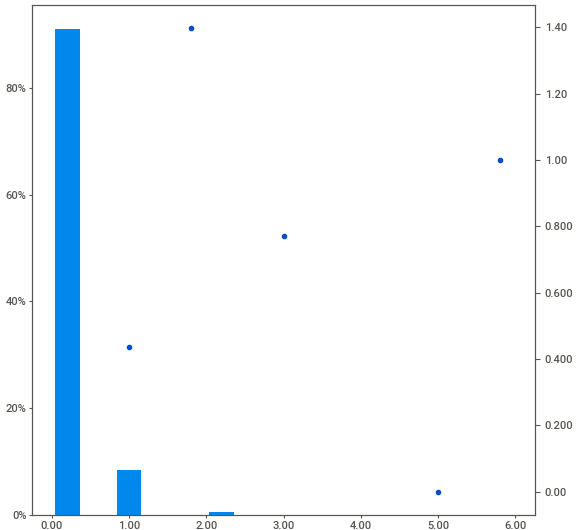
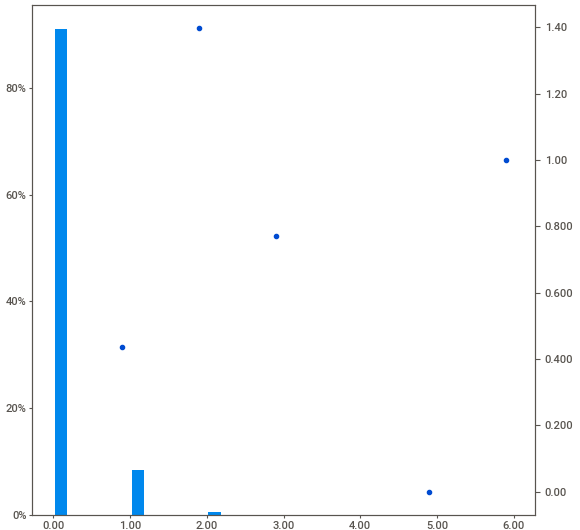
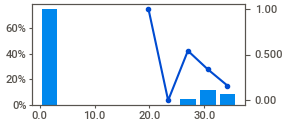
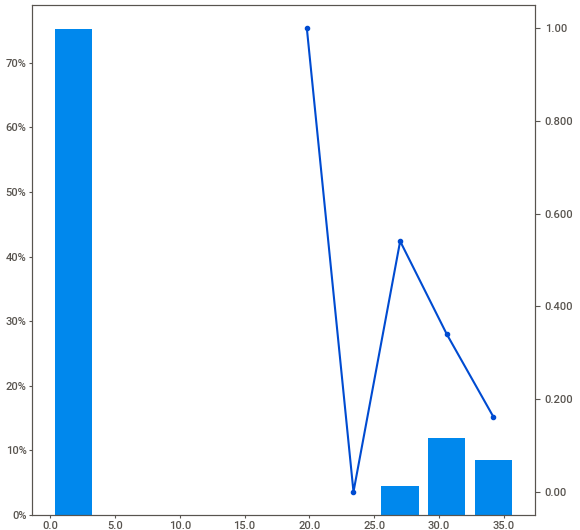
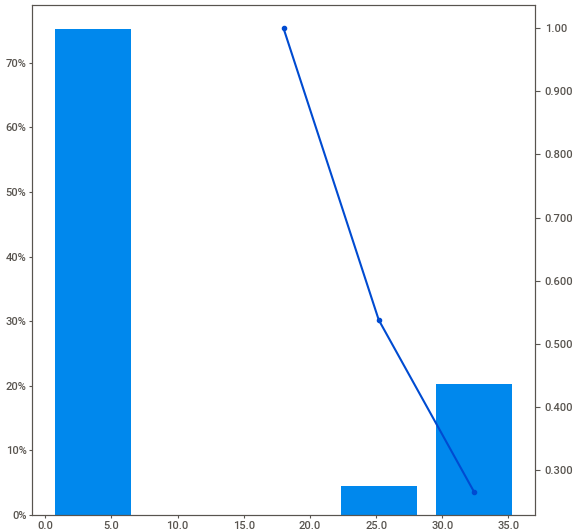
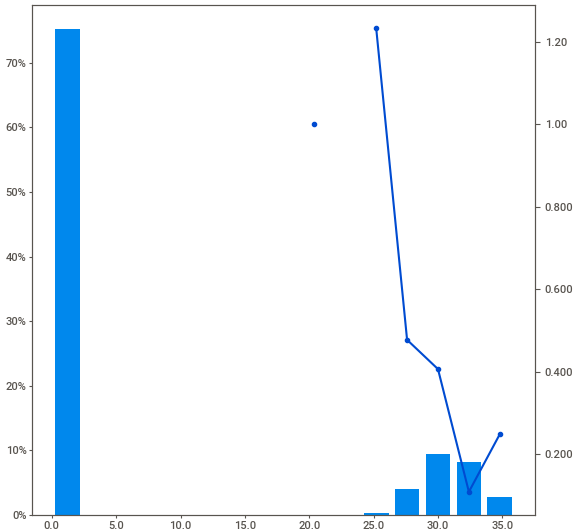
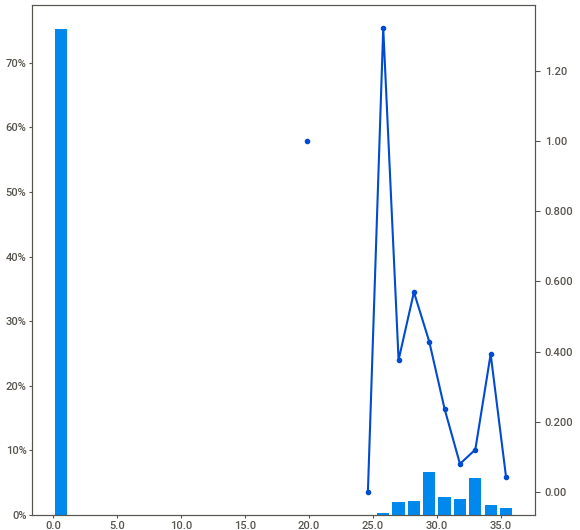
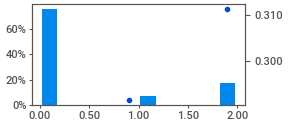
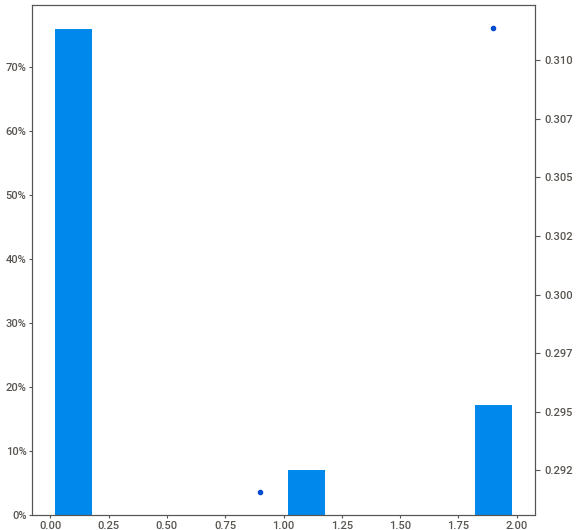
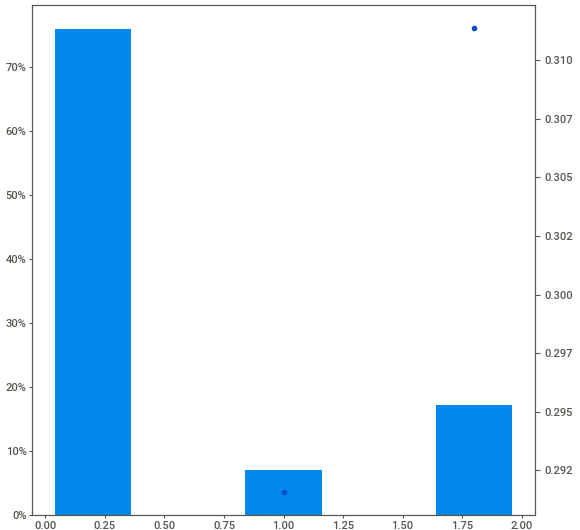
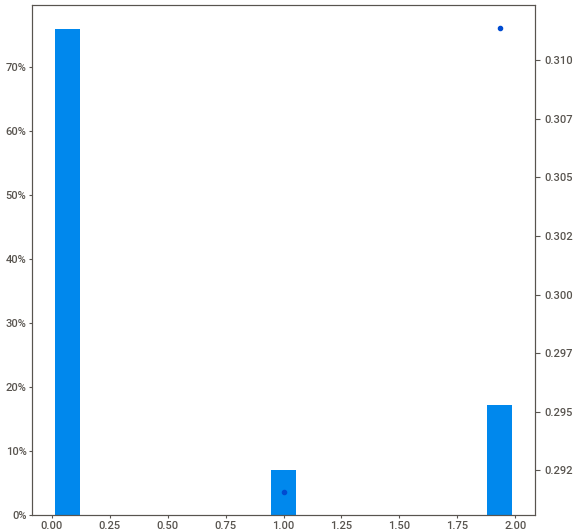
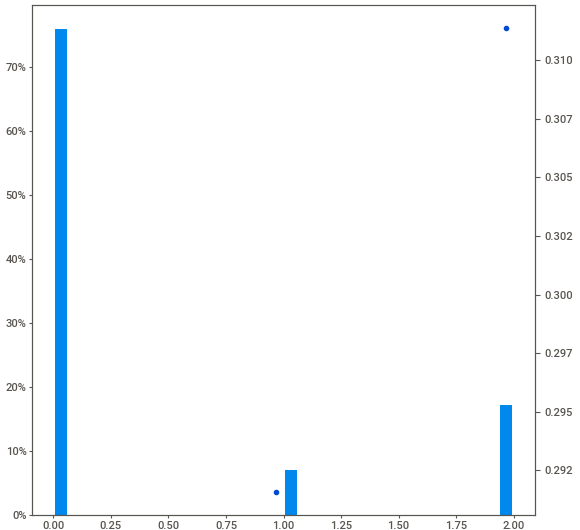
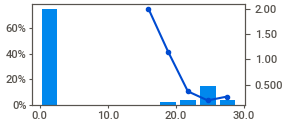
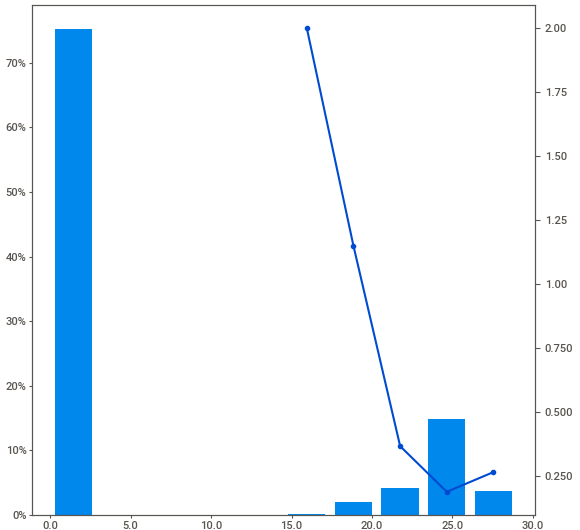
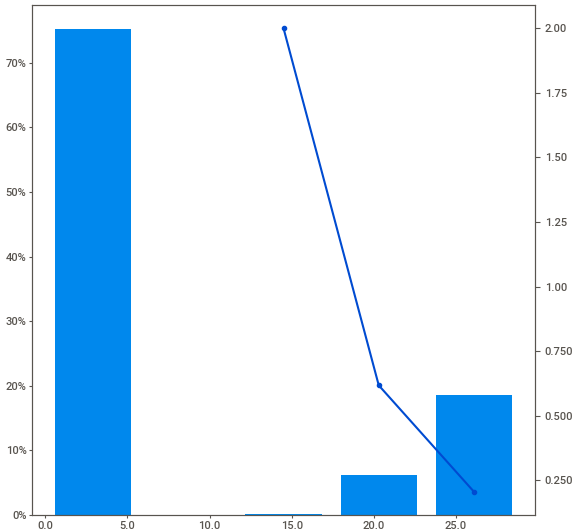
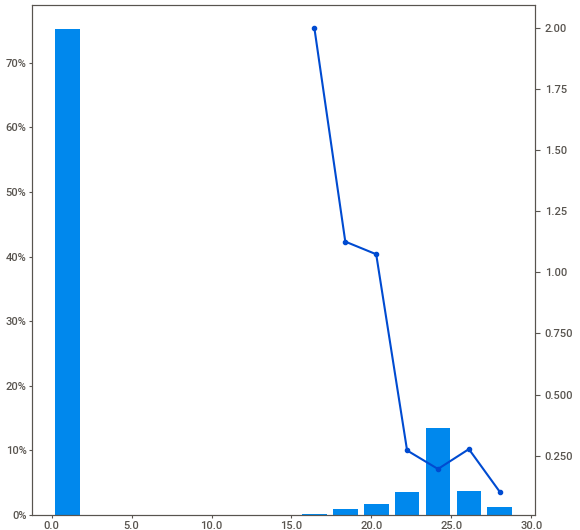
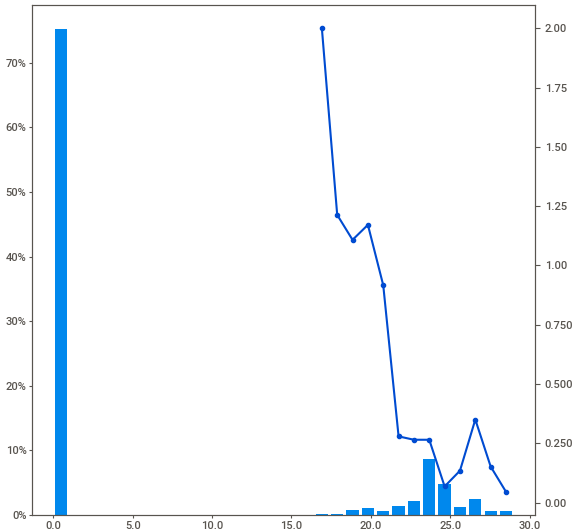
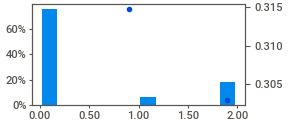
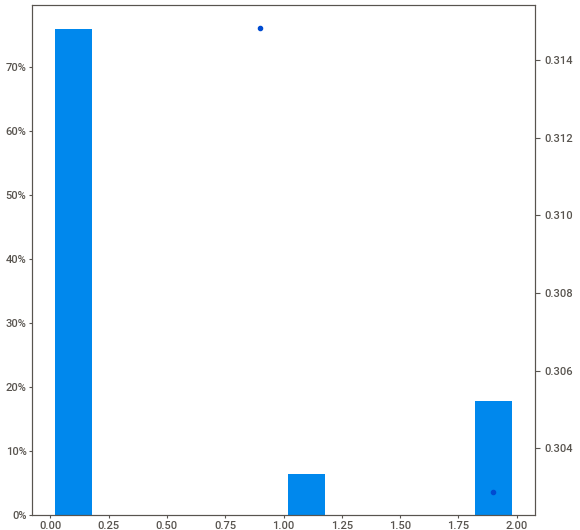
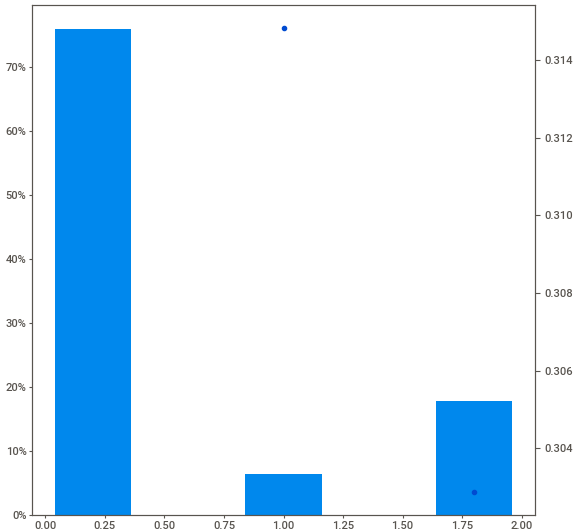
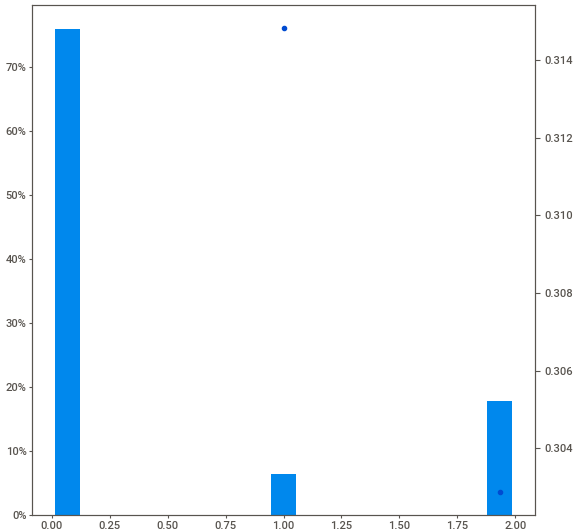
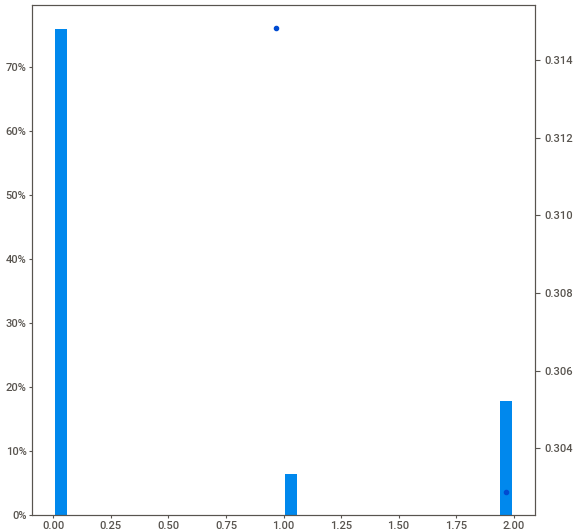
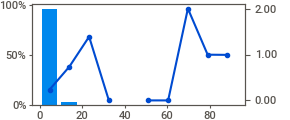
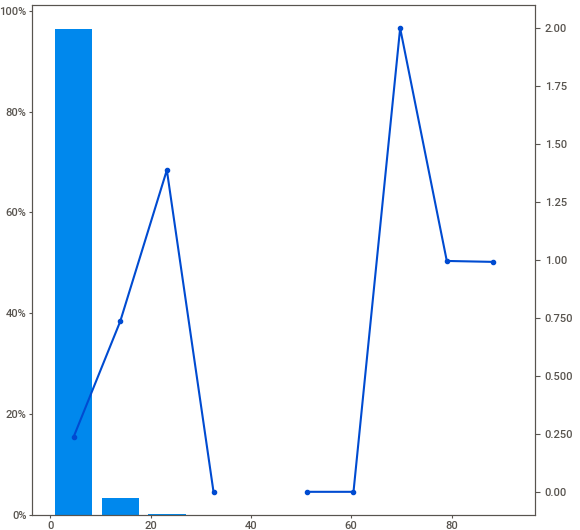
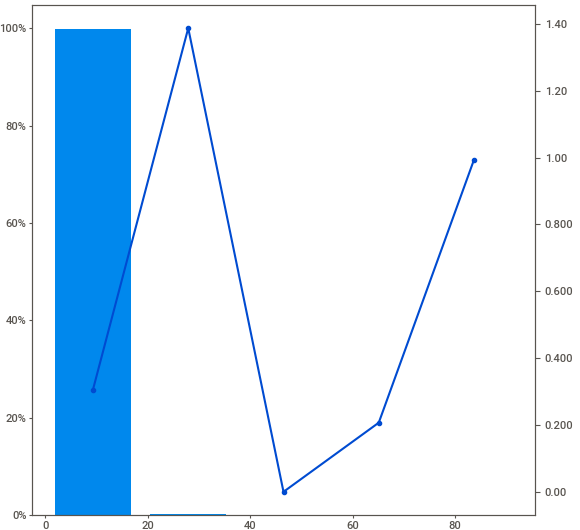
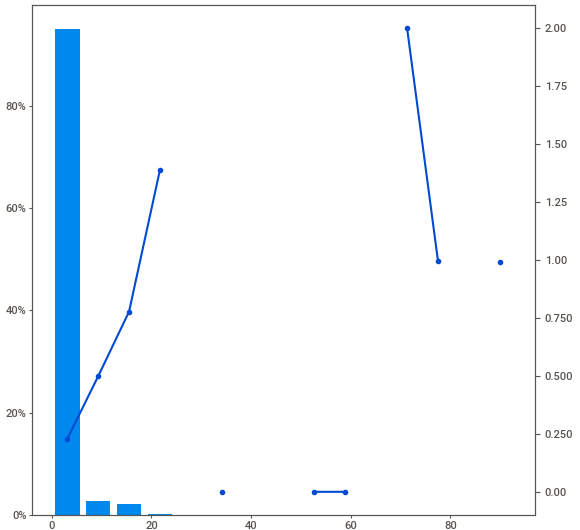
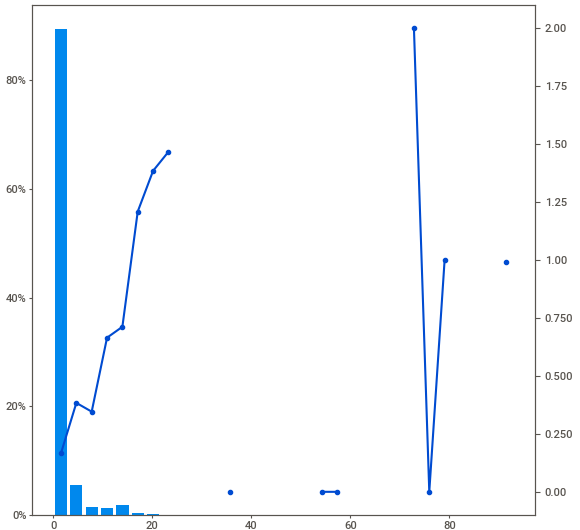
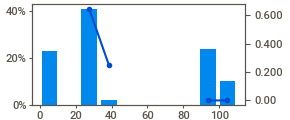
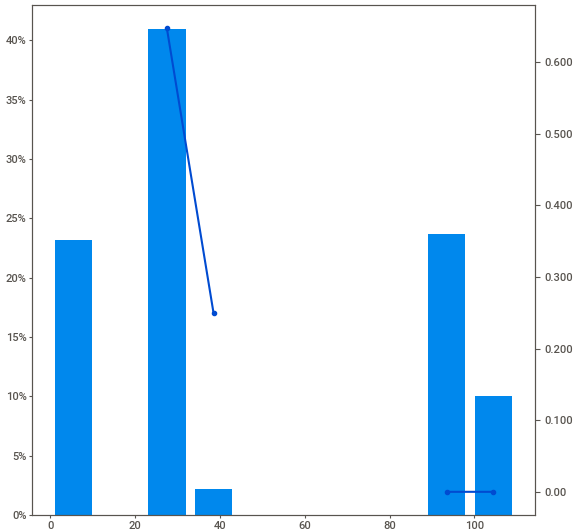
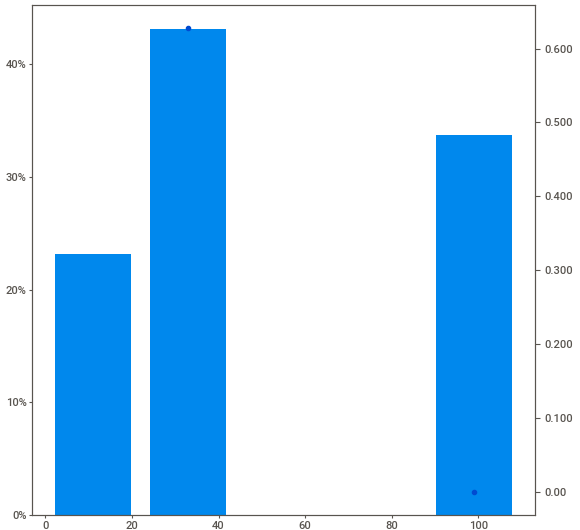
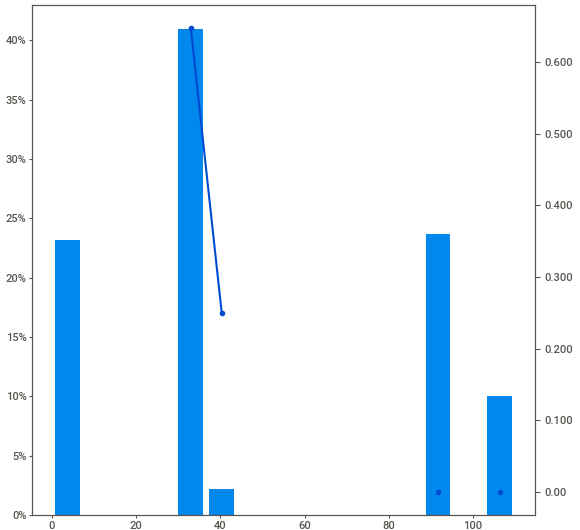
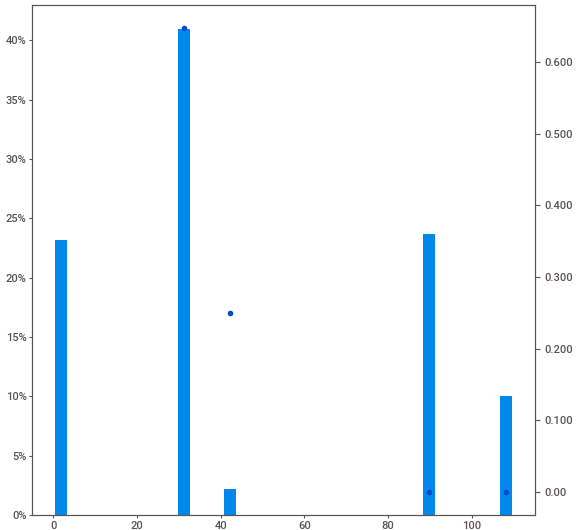
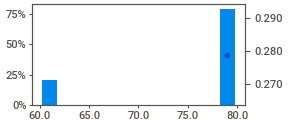
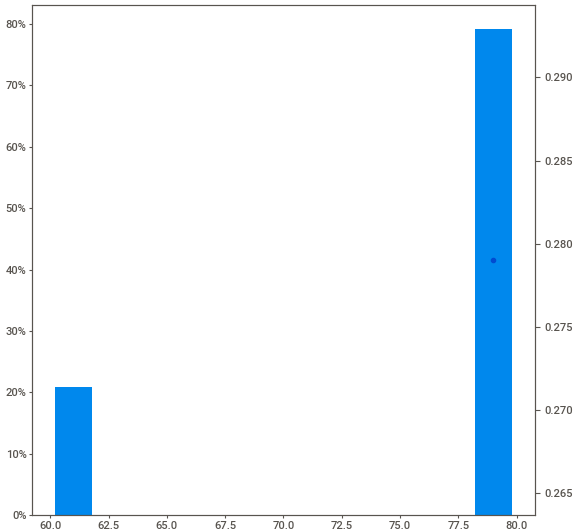
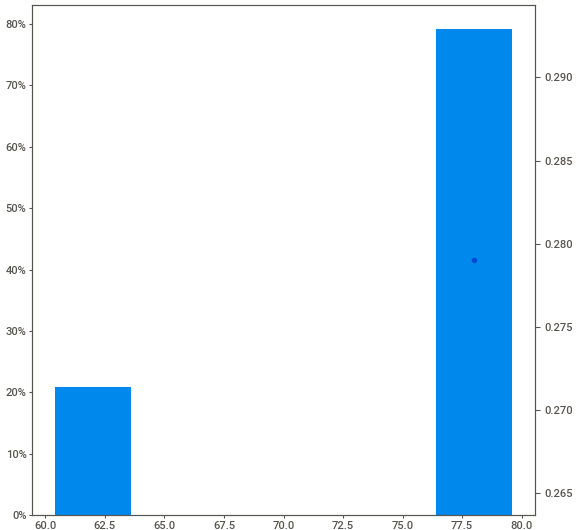
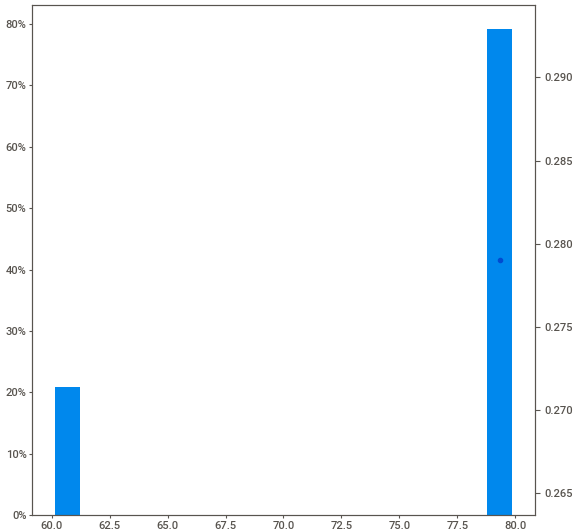
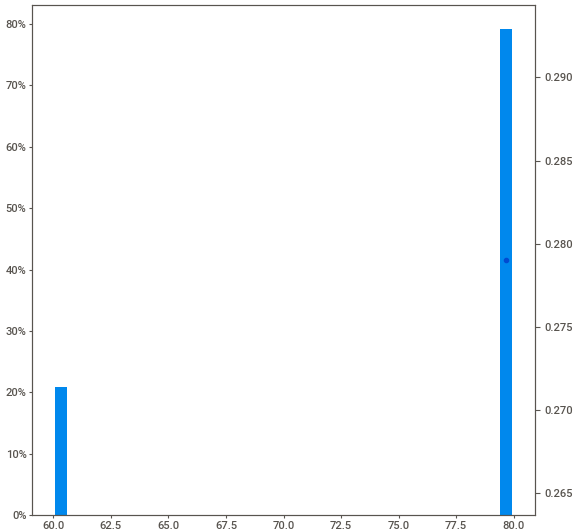
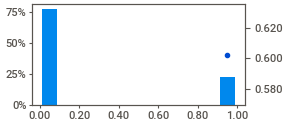
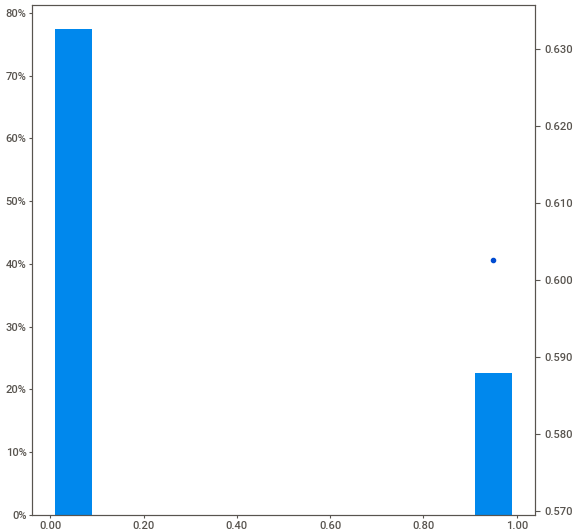
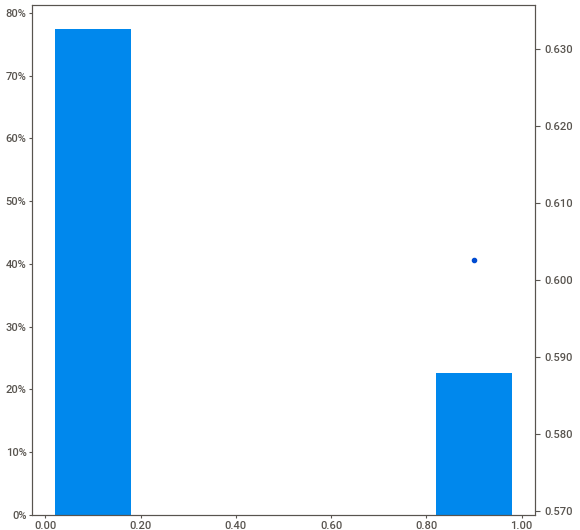
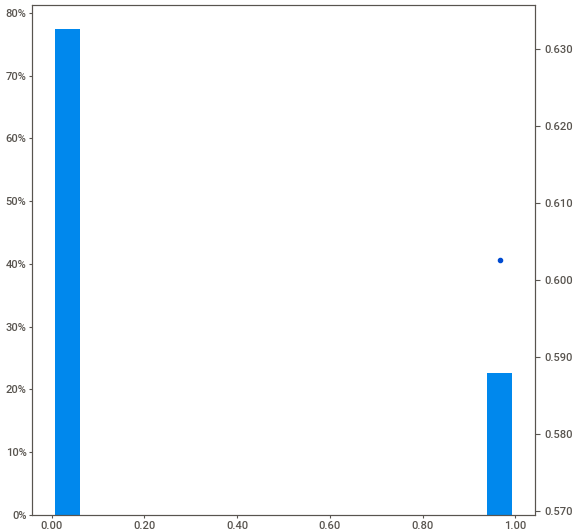
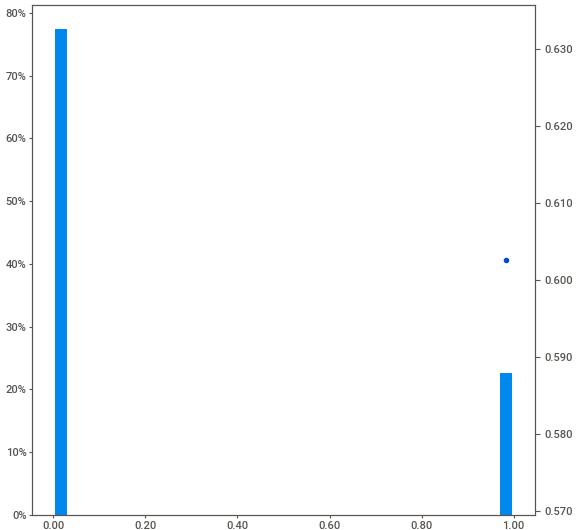
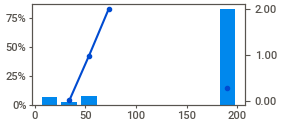
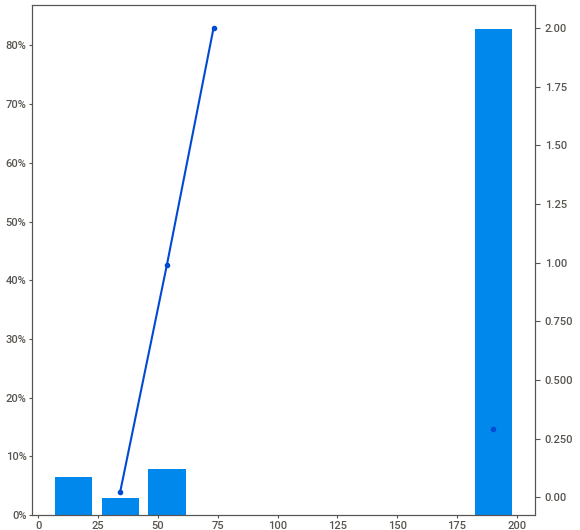
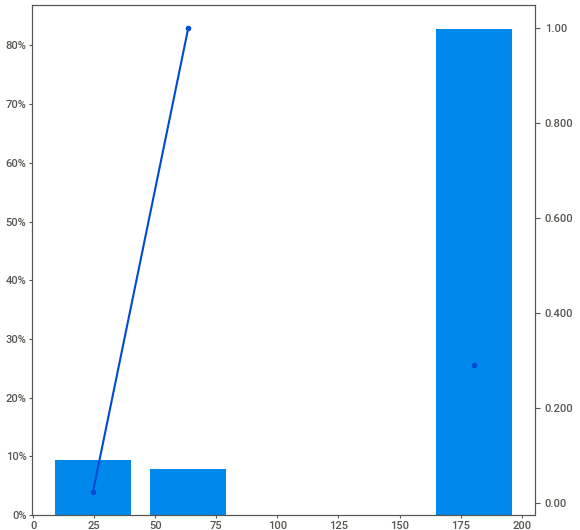
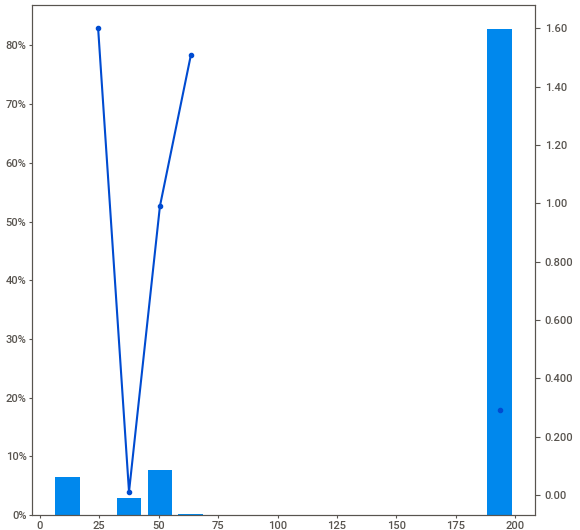
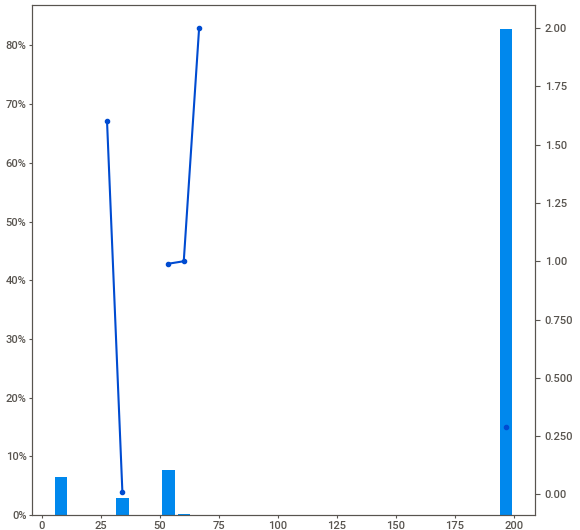
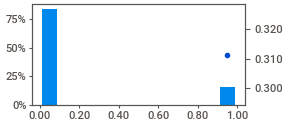
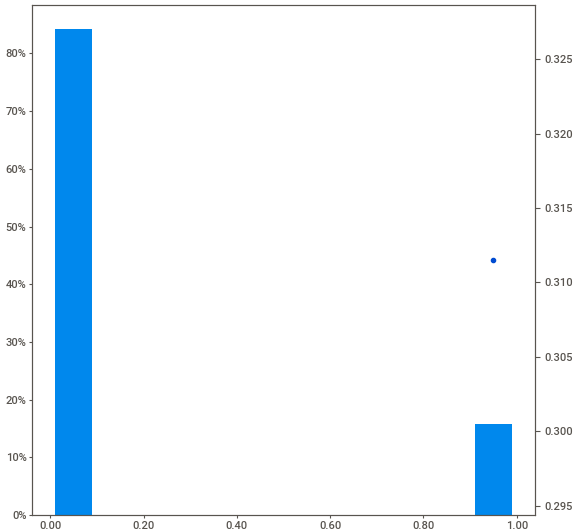
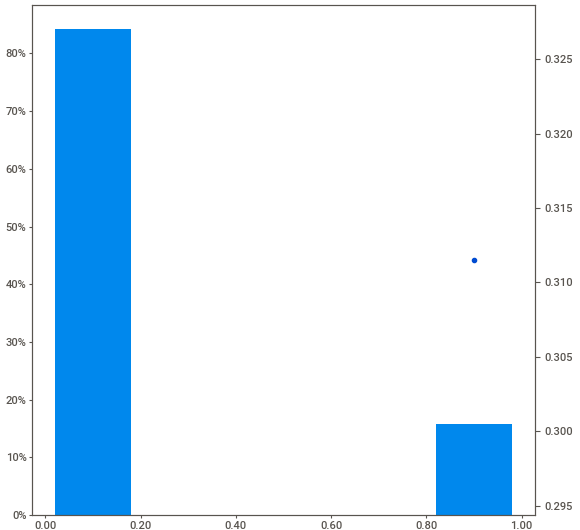
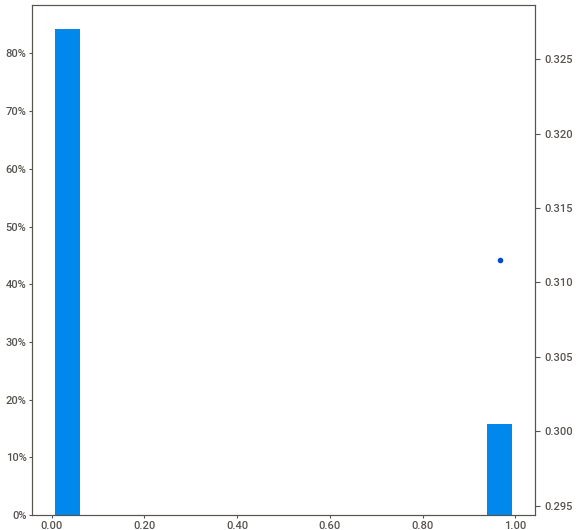
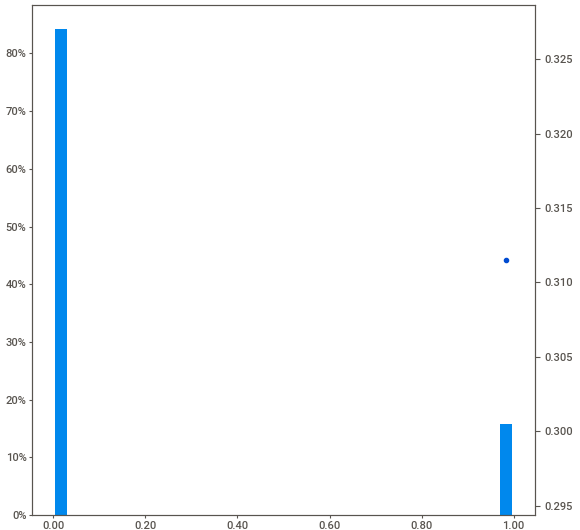
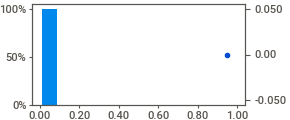
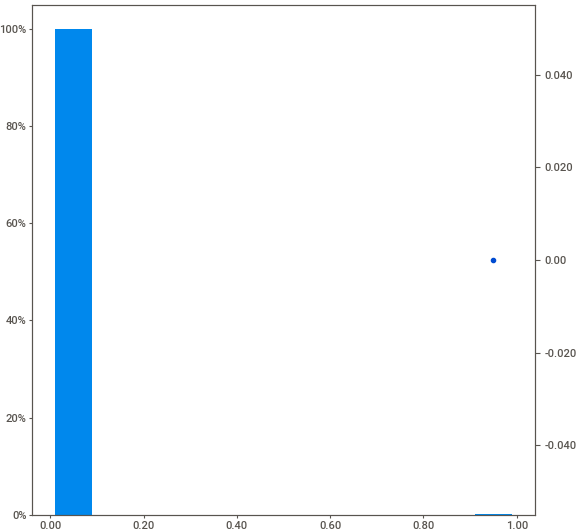
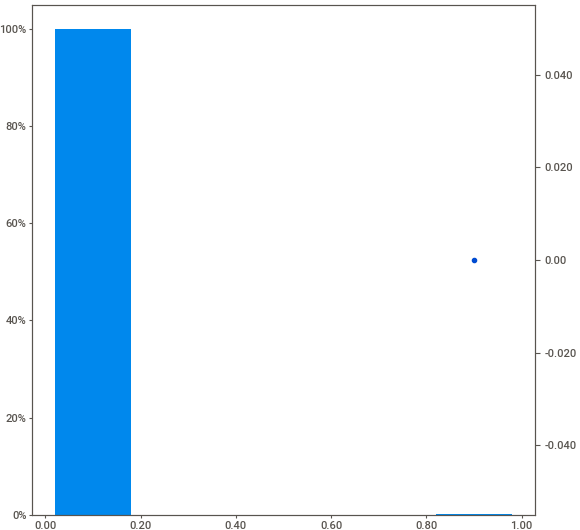
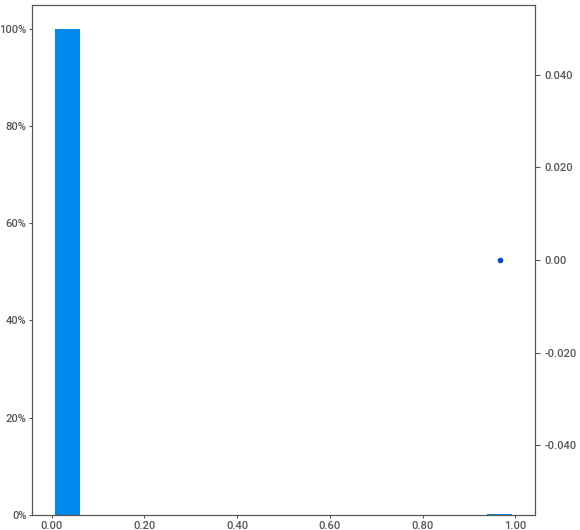
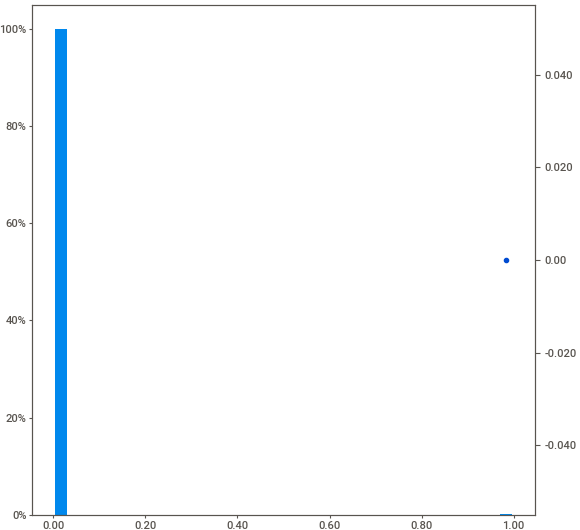
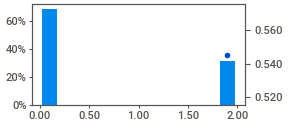
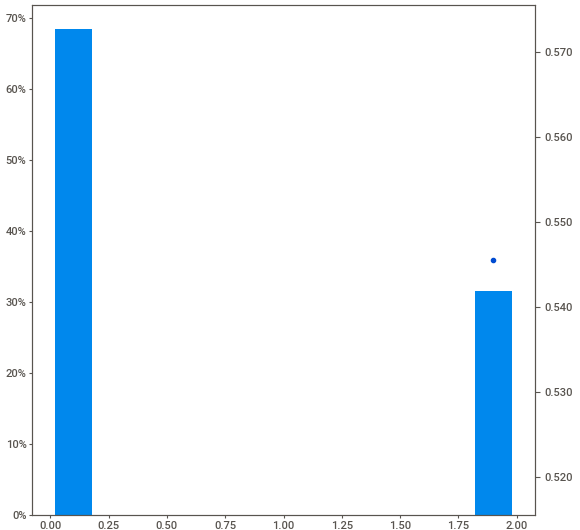
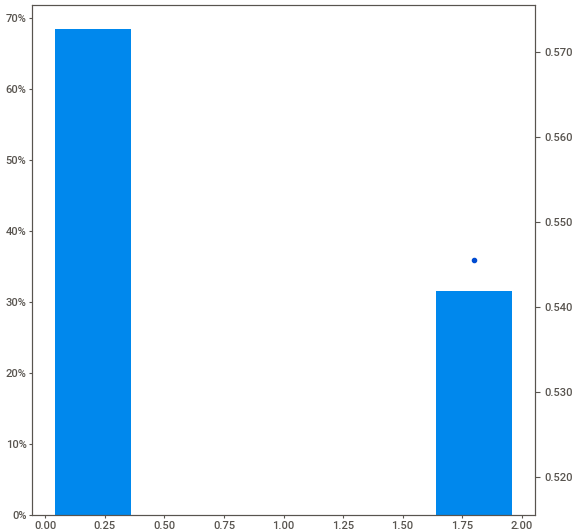
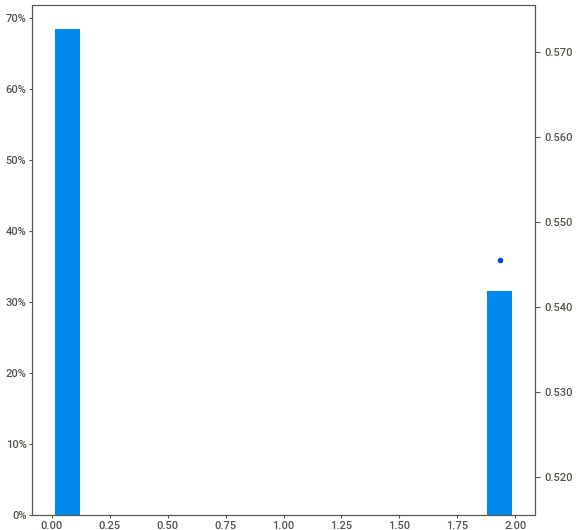
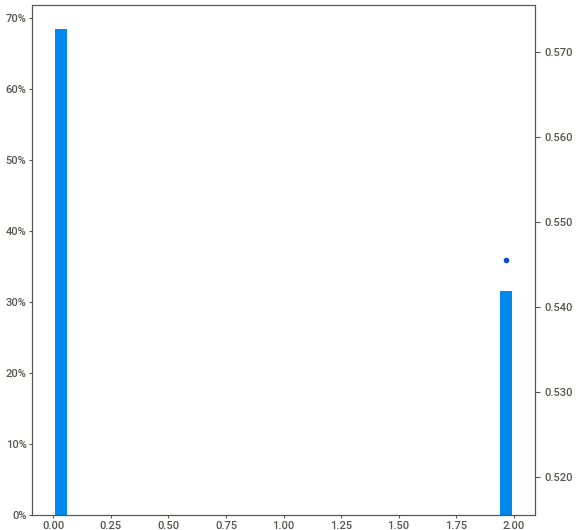
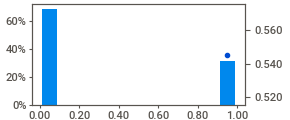
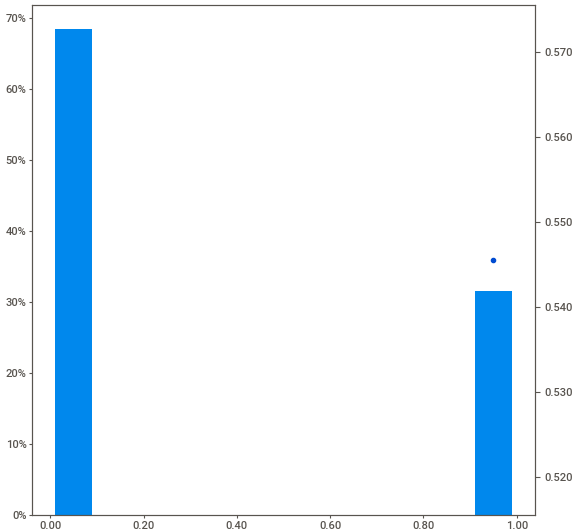
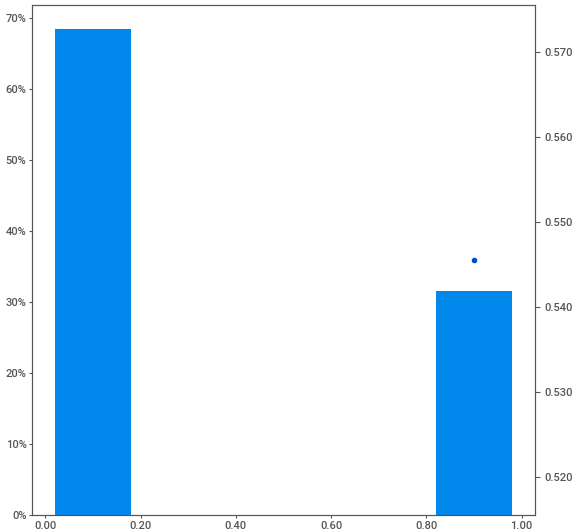
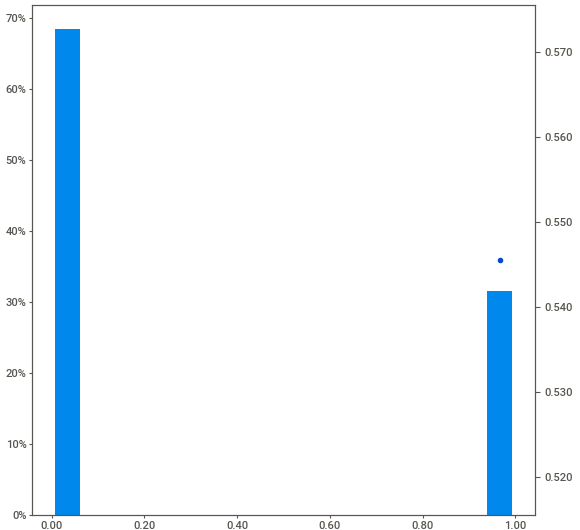
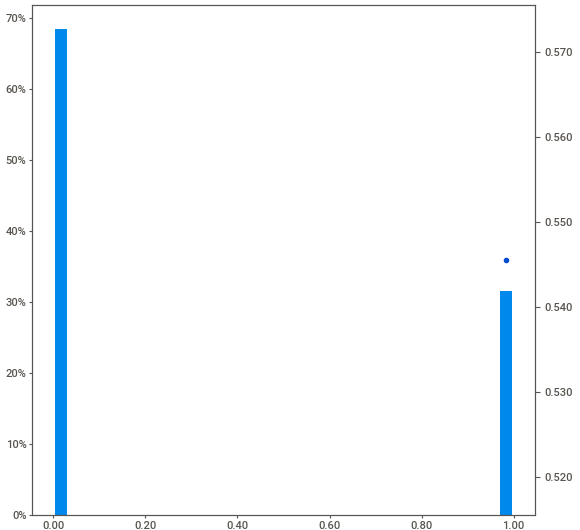
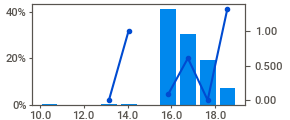
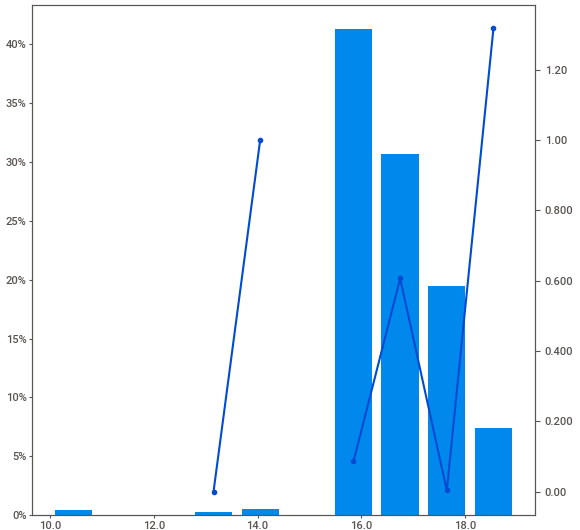
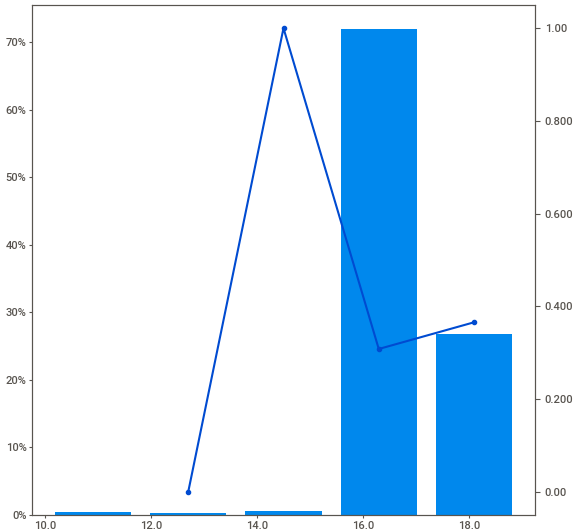
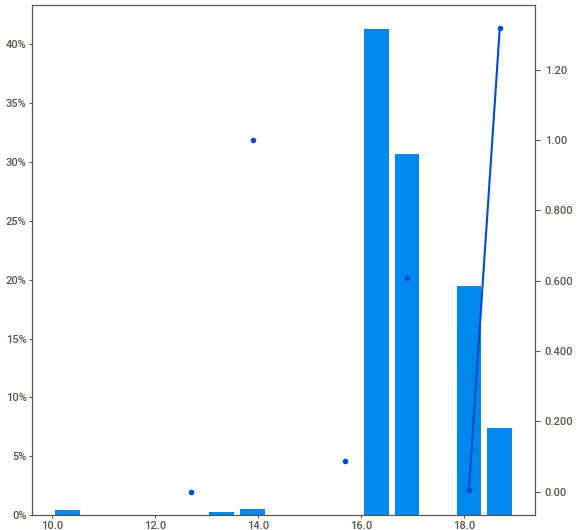
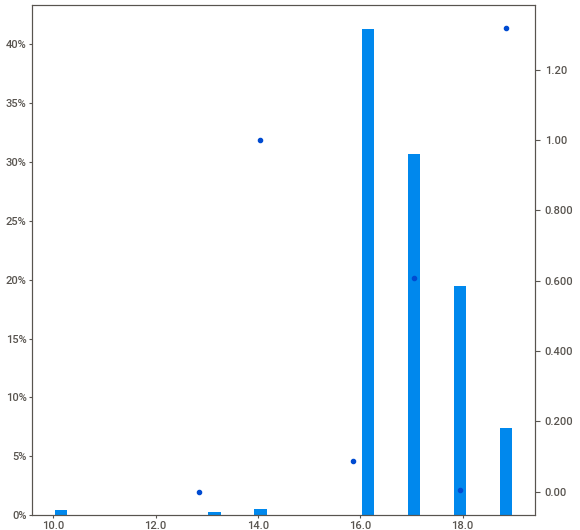
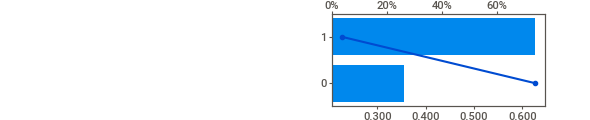
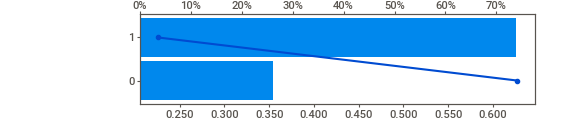
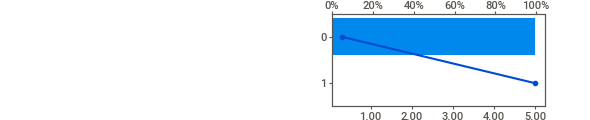
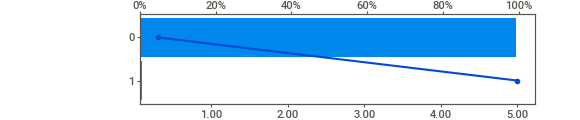
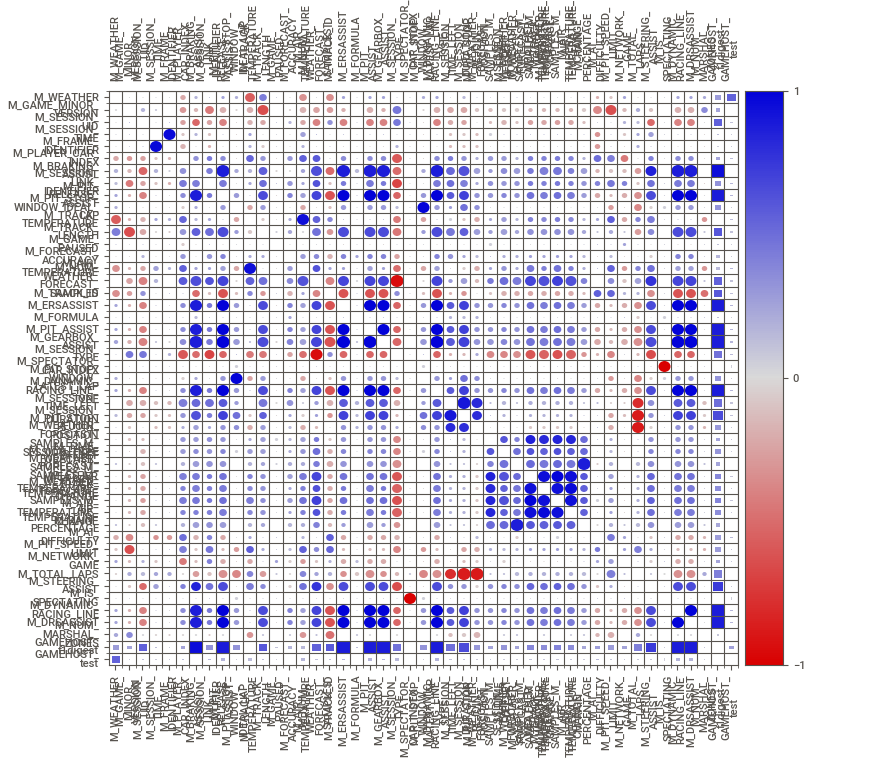
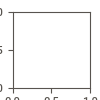

In [43]:
report.show_notebook()

In [30]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero, so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [31]:
mosthighlycorrelated(df, 30)

FirstVariable  \
0                                      M_ERSASSIST   
1                             M_PIT_RELEASE_ASSIST   
2                                     M_PIT_ASSIST   
3                             M_PIT_RELEASE_ASSIST   
4                             M_PIT_RELEASE_ASSIST   
5                             M_PIT_RELEASE_ASSIST   
6                                     M_PIT_ASSIST   
7                                      M_ERSASSIST   
8                                     M_PIT_ASSIST   
9                                      M_ERSASSIST   
10                           M_DYNAMIC_RACING_LINE   
11                                     M_ERSASSIST   
12                      M_DYNAMIC_RACING_LINE_TYPE   
13                      M_DYNAMIC_RACING_LINE_TYPE   
14                            M_PIT_RELEASE_ASSIST   
15                                M_GEARBOX_ASSIST   
16                                M_GEARBOX_ASSIST   
17                                     M_ERSASSIST   
18                            M_PIT_RELEASE_ASSIST   
19                                M_GEARBOX_ASSIST   
20                                    M_PIT_ASSIST   
21                           M_SPECTATOR_CAR_INDEX   
22                     M_PIT_STOP_WINDOW_IDEAL_LAP   
23  M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE   
24                                  M_SESSION_TIME   
25                      M_TRACK_TEMPERATURE_CHANGE   
26                  M_NUM_WEATHER_FORECAST_SAMPLES   
27                                M_BRAKING_ASSIST   
28  M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE   
29    M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE   

                                  SecondVariable  Correlation  
0                                   M_PIT_ASSIST     1.000000  
1                                    M_DRSASSIST     1.000000  
2                     M_DYNAMIC_RACING_LINE_TYPE     1.000000  
3                     M_DYNAMIC_RACING_LINE_TYPE     1.000000  
4                                   M_PIT_ASSIST     1.000000  
5                                    M_ERSASSIST     1.000000  
6                          M_DYNAMIC_RACING_LINE     1.000000  
7                                    M_DRSASSIST     1.000000  
8                                    M_DRSASSIST     1.000000  
9                          M_DYNAMIC_RACING_LINE     1.000000  
10                                   M_DRSASSIST     1.000000  
11                    M_DYNAMIC_RACING_LINE_TYPE     1.000000  
12                         M_DYNAMIC_RACING_LINE     1.000000  
13                                   M_DRSASSIST     1.000000  
14                         M_DYNAMIC_RACING_LINE     1.000000  
15                         M_DYNAMIC_RACING_LINE     1.000000  
16                                   M_DRSASSIST     1.000000  
17                              M_GEARBOX_ASSIST     1.000000  
18                              M_GEARBOX_ASSIST     1.000000  
19                    M_DYNAMIC_RACING_LINE_TYPE     1.000000  
20                              M_GEARBOX_ASSIST     1.000000  
21                               M_IS_SPECTATING    -0.999984  
22                  M_PIT_STOP_WINDOW_LATEST_LAP     0.998627  
23  M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE     0.998315  
24                            M_FRAME_IDENTIFIER     0.974000  
25                      M_AIR_TEMPERATURE_CHANGE     0.968625  
26                                M_SESSION_TYPE    -0.958544  
27                             GAMEHOST_f1digest    -0.953438  
28                      M_AIR_TEMPERATURE_CHANGE     0.947294  
29                      M_AIR_TEMPERATURE_CHANGE     0.945063

Some Visualization might help understand the reasoon for these level of correlation

In [42]:
standardised_df = scale(df)
# standardised_df = pd.DataFrame(standardised_df, index=df.index, columns=df.columns)

KeyError: ('M_GAME_MINOR_VERSION', 'M_SESSION_UID', 'M_SESSION_TIME', 'M_FRAME_IDENTIFIER', 'M_PLAYER_CAR_INDEX', 'M_BRAKING_ASSIST', 'M_SESSION_LINK_IDENTIFIER', 'M_PIT_RELEASE_ASSIST', 'M_PIT_STOP_WINDOW_IDEAL_LAP', 'M_TRACK_TEMPERATURE', 'M_TRACK_LENGTH', 'M_GAME_PAUSED', 'M_FORECAST_ACCURACY', 'M_AIR_TEMPERATURE', 'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_TRACK_ID', 'M_ERSASSIST', 'M_FORMULA', 'M_PIT_ASSIST', 'M_GEARBOX_ASSIST', 'M_SESSION_TYPE', 'M_SPECTATOR_CAR_INDEX', 'M_PIT_STOP_WINDOW_LATEST_LAP', 'M_DYNAMIC_RACING_LINE_TYPE', 'M_SESSION_TIME_LEFT', 'M_SESSION_DURATION', 'M_PIT_STOP_REJOIN_POSITION', 'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET', 'M_WEATHER_FORECAST_SAMPLES_M_WEATHER', 'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE', 'M_TRACK_TEMPERATURE_CHANGE', 'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE', 'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE', 'M_WEATHER', 'M_AI_DIFFICULTY', 'M_PIT_SPEED_LIMIT', 'M_NETWORK_GAME', 'M_TOTAL_LAPS', 'M_STEERING_ASSIST', 'M_IS_SPECTATING', 'M_DYNAMIC_RACING_LINE', 'M_DRSASSIST', 'M_NUM_MARSHAL_ZONES')

Some visualization can help see the effect of the Standardization on the skewedness of the data

In [ ]:
Now lets see this data grouped with Timestamp

In [44]:
de = df.copy()

In [45]:
de=df.groupby('TIMESTAMP').mean()
print(de.shape)
de.tail()

(39878, 47)


M_GAME_MINOR_VERSION  M_SESSION_UID  \
TIMESTAMP                                                            
1970-01-01 00:00:01.644019858                  15.0   8.584917e+18   
1970-01-01 00:00:01.644019859                  15.0   8.584917e+18   
1970-01-01 00:00:01.644019860                  15.0   8.584917e+18   
1970-01-01 00:00:01.644019862                  15.0   8.584917e+18   
1970-01-01 00:00:01.644019864                  15.0   8.584917e+18   

                               M_SESSION_TIME  M_FRAME_IDENTIFIER  \
TIMESTAMP                                                           
1970-01-01 00:00:01.644019858         379.152             10632.0   
1970-01-01 00:00:01.644019859         380.155             10653.0   
1970-01-01 00:00:01.644019860         381.158             10674.0   
1970-01-01 00:00:01.644019862         383.161             10719.0   
1970-01-01 00:00:01.644019864         385.163             10762.0   

                               M_PLAYER_CAR_INDEX  M_BRAKING_ASSIST  \
TIMESTAMP                                                             
1970-01-01 00:00:01.644019858                 0.0               0.0   
1970-01-01 00:00:01.644019859                 0.0               0.0   
1970-01-01 00:00:01.644019860                 0.0               0.0   
1970-01-01 00:00:01.644019862                 0.0               0.0   
1970-01-01 00:00:01.644019864                 0.0               0.0   

                               M_SESSION_LINK_IDENTIFIER  \
TIMESTAMP                                                  
1970-01-01 00:00:01.644019858                        0.0   
1970-01-01 00:00:01.644019859                        0.0   
1970-01-01 00:00:01.644019860                        0.0   
1970-01-01 00:00:01.644019862                        0.0   
1970-01-01 00:00:01.644019864                        0.0   

                               M_PIT_RELEASE_ASSIST  \
TIMESTAMP                                             
1970-01-01 00:00:01.644019858                   0.0   
1970-01-01 00:00:01.644019859                   0.0   
1970-01-01 00:00:01.644019860                   0.0   
1970-01-01 00:00:01.644019862                   0.0   
1970-01-01 00:00:01.644019864                   0.0   

                               M_PIT_STOP_WINDOW_IDEAL_LAP  \
TIMESTAMP                                                    
1970-01-01 00:00:01.644019858                          0.0   
1970-01-01 00:00:01.644019859                          0.0   
1970-01-01 00:00:01.644019860                          0.0   
1970-01-01 00:00:01.644019862                          0.0   
1970-01-01 00:00:01.644019864                          0.0   

                               M_TRACK_TEMPERATURE  M_TRACK_LENGTH  \
TIMESTAMP                                                            
1970-01-01 00:00:01.644019858                 31.0          5815.0   
1970-01-01 00:00:01.644019859                 31.0          5815.0   
1970-01-01 00:00:01.644019860                 31.0          5815.0   
1970-01-01 00:00:01.644019862                 31.0          5815.0   
1970-01-01 00:00:01.644019864                 31.0          5815.0   

                               M_GAME_PAUSED  M_FORECAST_ACCURACY  \
TIMESTAMP                                                           
1970-01-01 00:00:01.644019858            0.0                  0.0   
1970-01-01 00:00:01.644019859            0.0                  0.0   
1970-01-01 00:00:01.644019860            0.0                  0.0   
1970-01-01 00:00:01.644019862            0.0                  0.0   
1970-01-01 00:00:01.644019864            0.0                  0.0   

                               M_AIR_TEMPERATURE  \
TIMESTAMP                                          
1970-01-01 00:00:01.644019858               23.0   
1970-01-01 00:00:01.644019859               23.0   
1970-01-01 00:00:01.644019860               23.0   
1970-01-01 00:00:01.644019862               23.0   
1970-01-01 00:00:01.644019864

## Pincipal Component Analysis

In [ ]:
pca = PCA().fit(standardised_df)

In [ ]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [ ]:
summary = pca_summary(pca, standardised_df)

### To see if the EDA was well done

In [ ]:
summary.sdev
# The total variance explained by the components is the sum of the variances of the components, and that should be equal to the no of standardized variable
np.sum(summary.sdev**2)


### Deciding How Many Principal Components to Retain

In [ ]:
'''using Kaiser’s criterion, we should only retain principal components for which the variance is above 1 (when principal component 
analysis was applied to standardised data)'''

# lets visualize and confirm this with the scree_plot
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardisedX)